In [1]:
#Importing all the necessary and required libraries

In [2]:
import pandas as pd

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import seaborn as sns

In [5]:
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(3)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1

In [8]:
####Exploratory data analysis

In [9]:
# Get the total number of elements in the DataFrame
total_elements = data.size
print(total_elements)

# Get the dimensions of the DataFrame (rows, columns)
dimensions = data.shape
print(dimensions)


61320
(5110, 12)


In [10]:
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [11]:
#####Check for unique values under Gender column

In [12]:
## DataFrame
gender_counts = data['gender'].value_counts()

print(gender_counts)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [13]:
# Drop rows where 'gender' is 'Other'
data_cleaned = data[data['gender'] != 'Other']

# Drop the 'id' column from the cleaned dataset
data_cleaned = data_cleaned.drop(columns=['id'])

# Optionally, reset the index of the cleaned dataset
data_cleaned = data_cleaned.reset_index(drop=True)

# Check the updated counts
gender_counts_cleaned = data_cleaned['gender'].value_counts()
print(gender_counts_cleaned)


Female    2994
Male      2115
Name: gender, dtype: int64


In [14]:
data_cleaned.head(3)

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1

In [15]:
# Count the occurrences of each smoking status
smoking_status_counts = data_cleaned['smoking_status'].value_counts()

# Print the counts
print(smoking_status_counts)

# Count the number of 'Unknown' smoking status
unknown_smoking_status_count = smoking_status_counts.get('Unknown', 0)

print(f"Number of people with unknown smoking status: {unknown_smoking_status_count}")


never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64
Number of people with unknown smoking status: 1544


In [16]:
# Check for missing values
print(data_cleaned.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [17]:
###############################Handling missing  BMI values########################################################

In [18]:
#######################IMPUTING MISSING BMI VALUES BY PREDICTING THEM USING DECICION TREES REGRESSOR ################

In [20]:
# Impute missing BMI values using DecisionTreeRegressor
bmi_imputer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [21]:
# Selecting relevant features and replacing gender values
features = data_cleaned[['age', 'gender', 'bmi']].copy()
features['gender'] = features['gender'].replace({'Male': 0, 'Female': 1}).astype(np.uint8)

In [22]:
missing_bmi = features[features['bmi'].isna()]
features = features[~features['bmi'].isna()]
bmi_target = features.pop('bmi')
bmi_imputer.fit(features, bmi_target)
predicted_bmi = pd.Series(bmi_imputer.predict(missing_bmi[['age', 'gender']]), index=missing_bmi.index)
data_cleaned.loc[missing_bmi.index, 'bmi'] = predicted_bmi

In [24]:
print('Missing values after imputation: ', data_cleaned.isnull().sum().sum())

Missing values after imputation:  0


In [25]:
#####################################DATA VISUALIZATION OF VARIABLE ######################################################

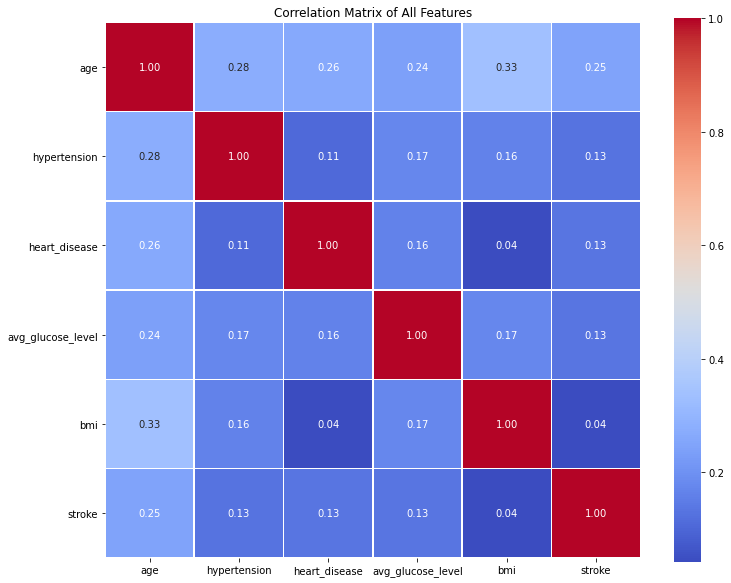

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all features
corr_matrix = data_cleaned.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()

In [27]:
# Variables for plotting
plot_vars = [var for var in data_cleaned.columns if var not in ['id', 'stroke']]
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

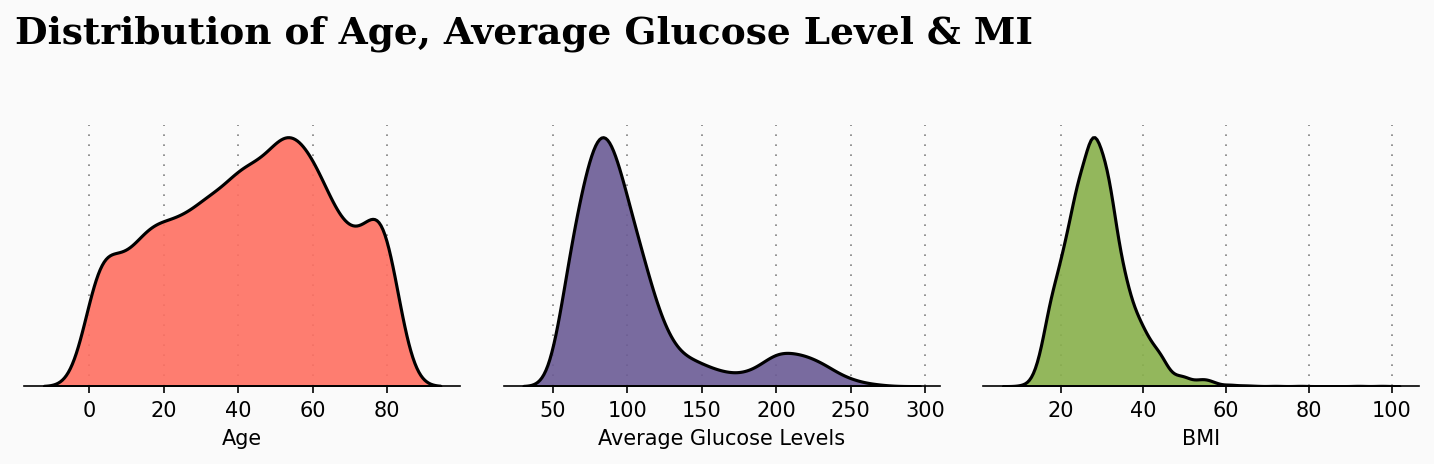

In [28]:
# Setting up the figure and grid for subplots
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"
plot_colors = ['#ff6f61', '#6b5b95', '#88b04b']

plot_idx = 0
for row in range(0, 1):
    for col in range(0, 3):
        ax = fig.add_subplot(gs[row, col])
        ax.set_facecolor(background_color)
        ax.tick_params(axis='y', left=False)
        ax.get_yaxis().set_visible(False)
        for spine in ["top", "right", "left"]:
            ax.spines[spine].set_visible(False)
        locals()["ax" + str(plot_idx)] = ax
        plot_idx += 1

plot_idx = 0
for variable in continuous_vars:
    sns.kdeplot(data_cleaned[variable], ax=locals()["ax" + str(plot_idx)], color=plot_colors[plot_idx], shade=True, linewidth=1.5, edgecolor='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax" + str(plot_idx)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot_idx += 1

# Adding x-axis labels
ax0.set_xlabel('Age')
ax1.set_xlabel('Average Glucose Levels')
ax2.set_xlabel('BMI')

# Adding annotations
ax0.text(-20, 0.022, 'Distribution of Age, Average Glucose Level & MI', fontsize=18, fontweight='bold', fontfamily='serif')


plt.show()

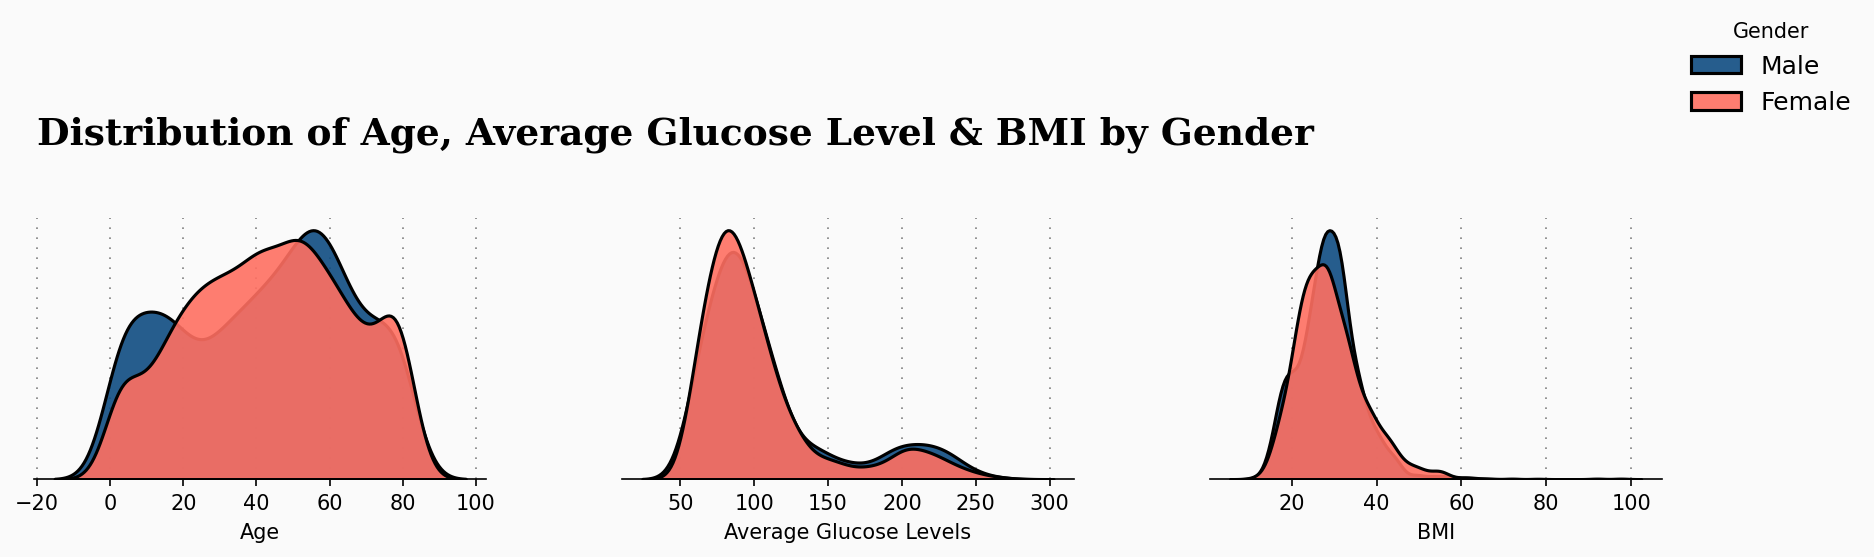

In [29]:
#Distribution of Age, Average Glucose Level & BMI by Gender
# Setting up the figure and grid for subplots
fig = plt.figure(figsize=(14, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.3, hspace=0.4)

background_color = "#fafafa"

# Define colors for each gender
plot_colors = {
    'Male': '#0f4c81',  # Color for males
    'Female': '#ff6f61' # Color for females
}

# Initialize plot index
plot_idx = 0
for row in range(0, 1):
    for col in range(0, 3):
        ax = fig.add_subplot(gs[row, col])
        ax.set_facecolor(background_color)
        ax.tick_params(axis='y', left=False)
        ax.get_yaxis().set_visible(False)
        for spine in ["top", "right", "left"]:
            ax.spines[spine].set_visible(False)
        locals()["ax" + str(plot_idx)] = ax
        plot_idx += 1

# Plot distributions by gender
plot_idx = 0
for variable in continuous_vars:
    for gender in plot_colors.keys():
        sns.kdeplot(data_cleaned[data_cleaned['gender'] == gender][variable], ax=locals()["ax" + str(plot_idx)], 
                    color=plot_colors[gender], shade=True, linewidth=1.5, edgecolor='black', alpha=0.9, zorder=3, legend=False)
    
    locals()["ax" + str(plot_idx)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot_idx += 1

# Adding x-axis labels
ax0.set_xlabel('Age')
ax1.set_xlabel('Average Glucose Levels')
ax2.set_xlabel('BMI')

# Adding annotations
ax0.text(-20, 0.022, 'Distribution of Age, Average Glucose Level & BMI by Gender', fontsize=18, fontweight='bold', fontfamily='serif')

# Adding legend
fig.legend(['Male', 'Female'], loc='upper right', frameon=False, fontsize=12, markerscale=2, title="Gender")

plt.show()

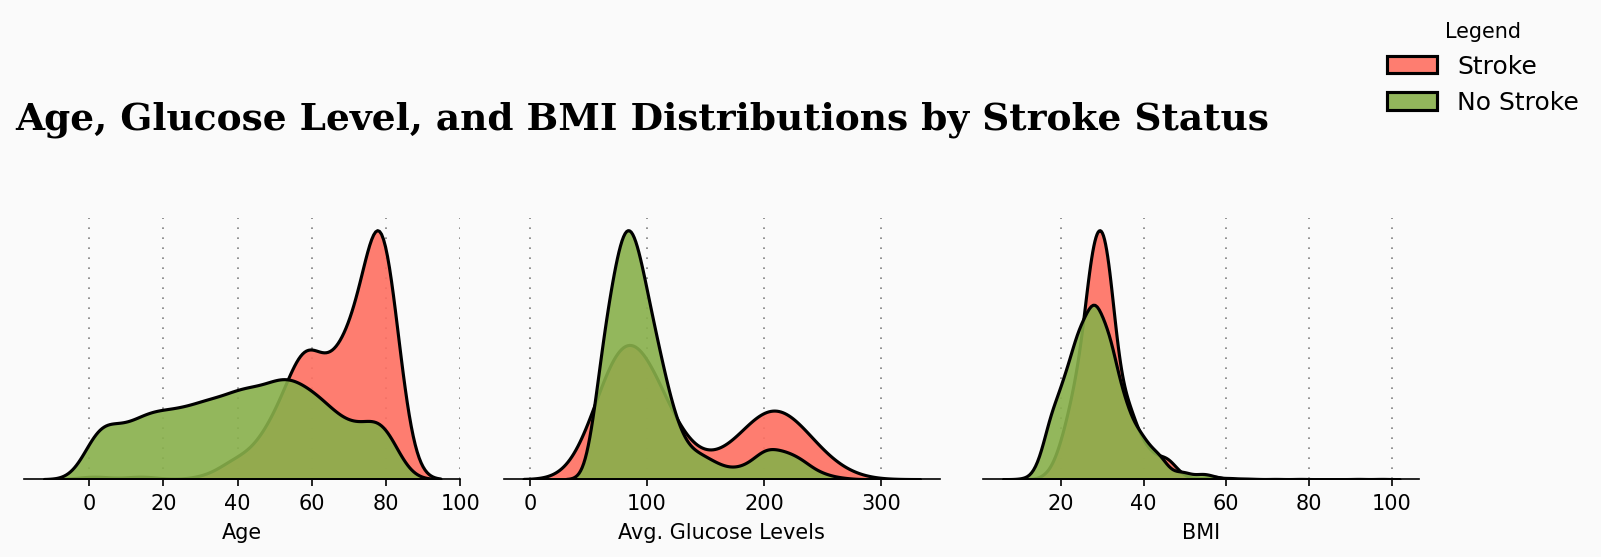

In [31]:
#Age, Glucose Level, and BMI Distributions by Stroke Status
# Subsetting the data based on the stroke variable
s = data_cleaned[data_cleaned['stroke'] == 1]
ns = data_cleaned[data_cleaned['stroke'] == 0]

# Setting up the figure and grid for subplots
background_color = "#fafafa"
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

color_stroke = '#ff6f61'
color_no_stroke = '#88b04b'

plot_idx = 0
for row in range(0, 1):
    for col in range(0, 3):
        ax = fig.add_subplot(gs[row, col])
        ax.set_facecolor(background_color)
        ax.tick_params(axis='y', left=False)
        ax.get_yaxis().set_visible(False)
        for spine in ["top", "right", "left"]:
            ax.spines[spine].set_visible(False)
        locals()["ax" + str(plot_idx)] = ax
        plot_idx += 1

plot_idx = 0
for feature in continuous_vars:
    sns.kdeplot(s[feature], ax=locals()["ax" + str(plot_idx)], color=color_stroke, shade=True, linewidth=1.5, edgecolor='black', alpha=0.9, zorder=3, legend=False)
    sns.kdeplot(ns[feature], ax=locals()["ax" + str(plot_idx)], color=color_no_stroke, shade=True, linewidth=1.5, edgecolor='black', alpha=0.9, zorder=3, legend=False)
    locals()["ax" + str(plot_idx)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))
    plot_idx += 1

# Adding x-axis labels
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

# Adding annotations
ax0.text(-20, 0.056, 'Age, Glucose Level, and BMI Distributions by Stroke Status', fontsize=18, fontweight='bold', fontfamily='serif')


# Adding legend
fig.legend(['Stroke', 'No Stroke'], loc='upper right', frameon=False, fontsize=12, markerscale=2, title="Legend")

plt.show()

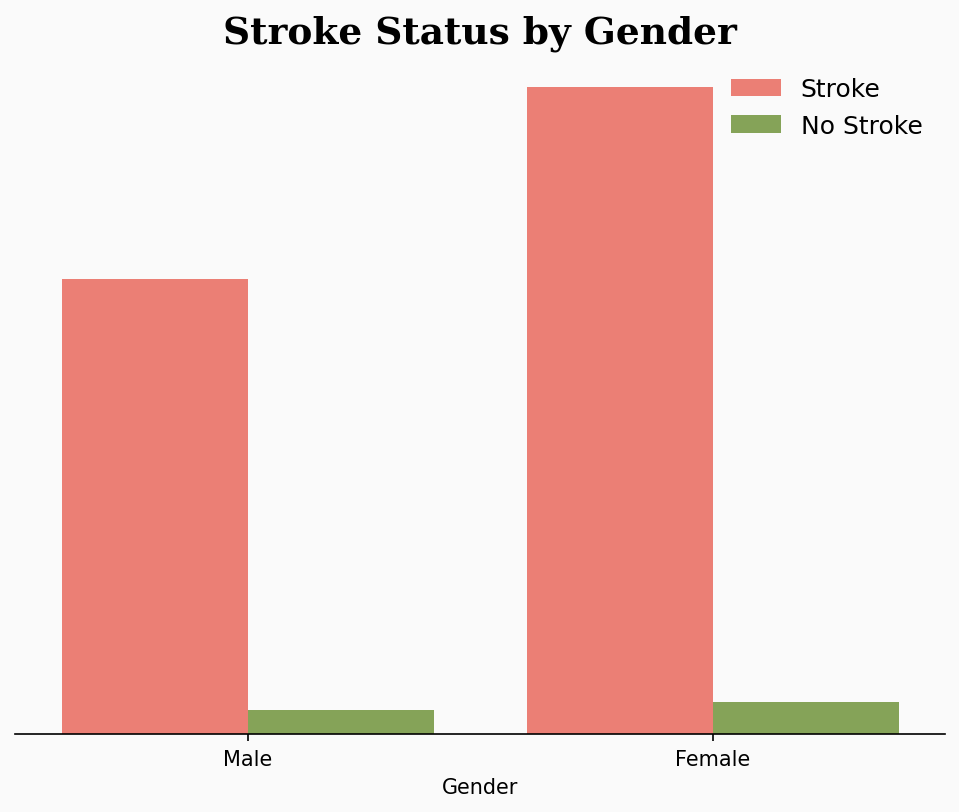

In [32]:
#Stroke Status by Gender
# Setting up the figure and grid for subplots
background_color = "#fafafa"
fig = plt.figure(figsize=(8, 6), dpi=150, facecolor=background_color)

# Creating subplots for gender distribution by stroke status
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', left=False)
ax.get_yaxis().set_visible(False)
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Subsetting the data based on the stroke variable
s = data_cleaned[data_cleaned['stroke'] == 1]
ns = data_cleaned[data_cleaned['stroke'] == 0]

# Plotting stroke status by gender
sns.countplot(data=data_cleaned, x='gender', hue='stroke', palette={1: '#88b04b', 0: '#ff6f61'}, ax=ax)

# Adding x-axis and y-axis labels
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Adding annotations
ax.set_title('Stroke Status by Gender', fontsize=18, fontweight='bold', fontfamily='serif')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Stroke', 'No Stroke'], loc='upper right', frameon=False, fontsize=12)

plt.show()

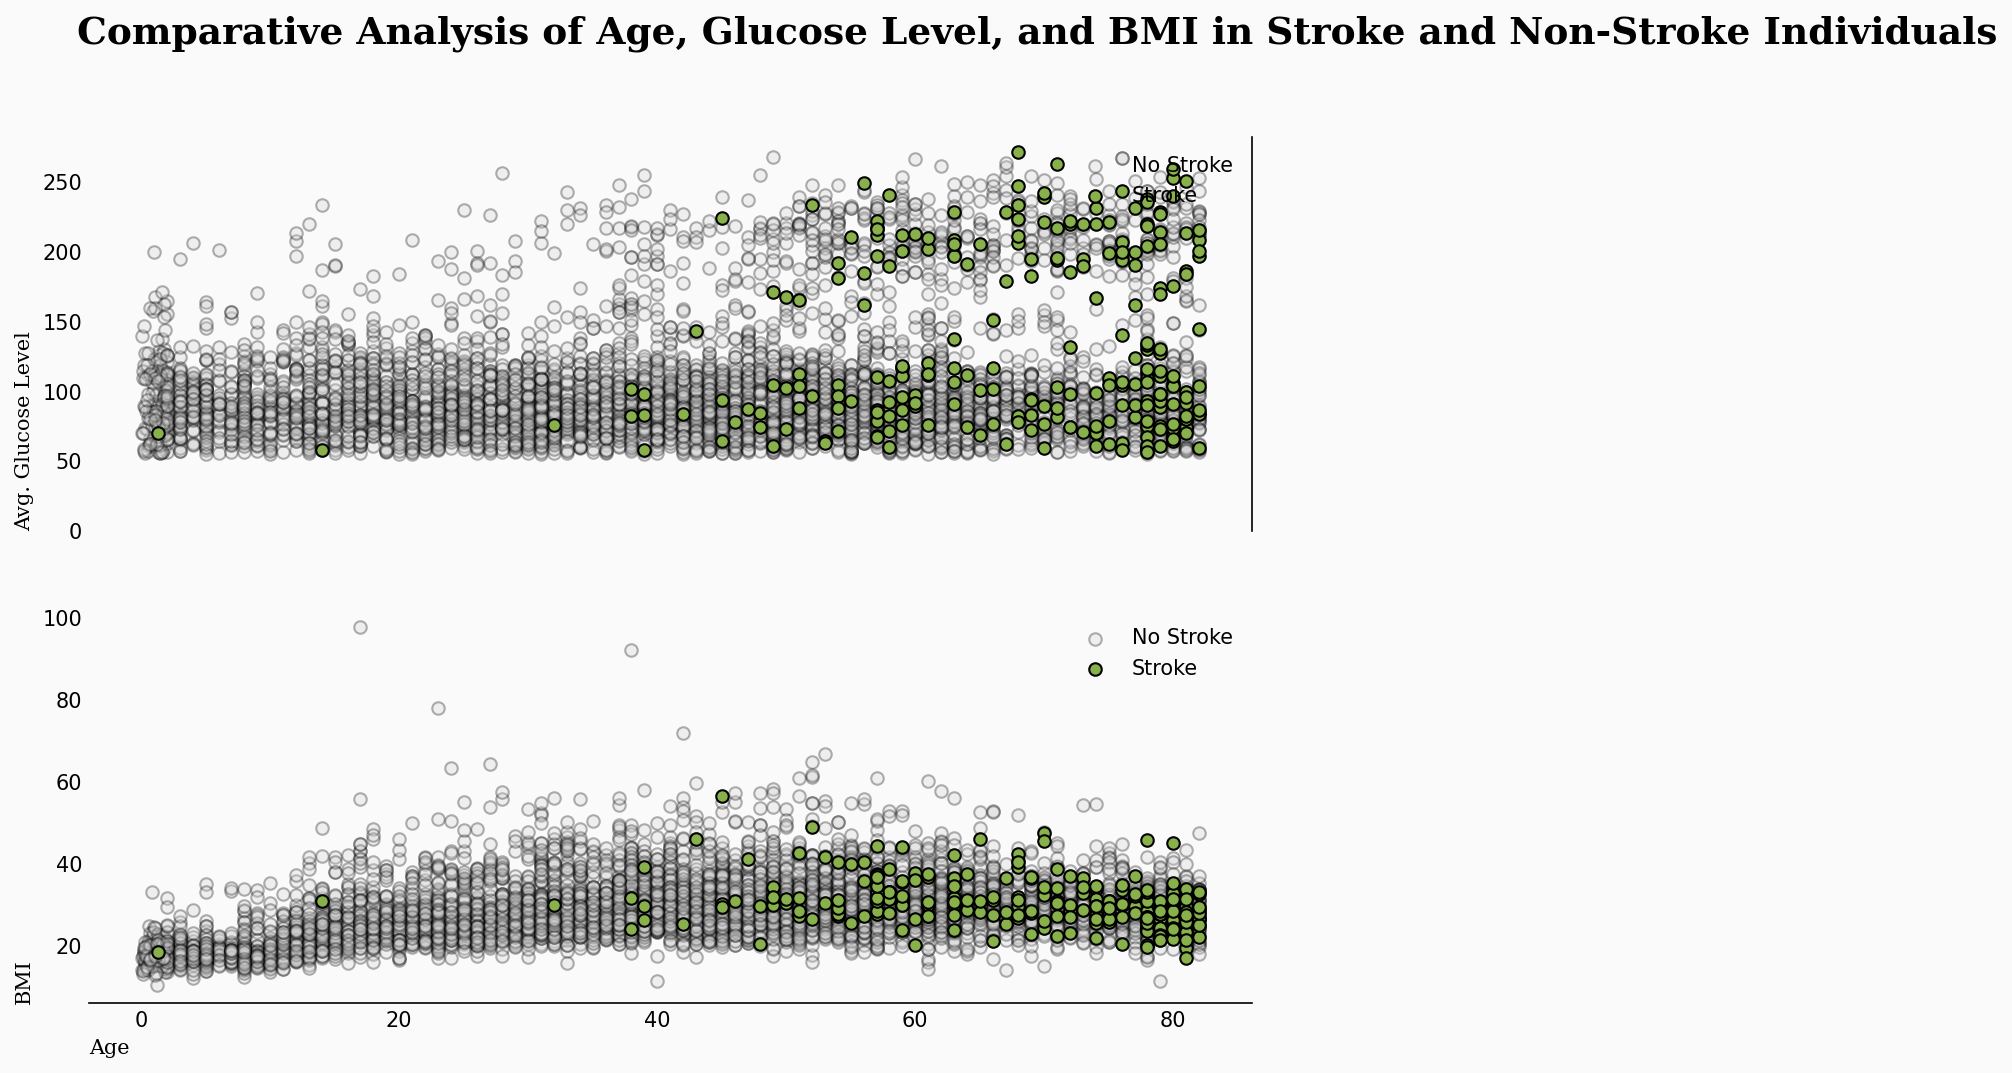

In [33]:
#Comparative Analysis of Age, Glucose Level, and BMI in Stroke and Non-Stroke Individuals
# Creating subsets of the data based on stroke status
str_only = data_cleaned[data_cleaned['stroke'] == 1]
no_str_only = data_cleaned[data_cleaned['stroke'] == 0]

# Setting up figure and axes
background_color = "#fafafa"
fig = plt.figure(figsize=(10, 16), dpi=150, facecolor=background_color) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Plotting Average Glucose Level by Age as scatter plots
ax0.scatter(no_str_only['age'], no_str_only['avg_glucose_level'], color='lightgray', label='No Stroke', edgecolors='k', alpha=0.3)
ax0.scatter(str_only['age'], str_only['avg_glucose_level'], color='#88b04b', label='Stroke', edgecolors='k', alpha=1.0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ", fontsize=12, fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level", fontsize=10, fontfamily='serif', loc='bottom')
ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)

# Plotting BMI by Age as scatter plots
ax1.scatter(no_str_only['age'], no_str_only['bmi'], color='lightgray', label='No Stroke', edgecolors='k', alpha=0.3)
ax1.scatter(str_only['age'], str_only['bmi'], color='#88b04b', label='Stroke', edgecolors='k', alpha=1.0)

ax1.set_xlabel("Age", fontsize=10, fontfamily='serif', loc='left')
ax1.set_ylabel("BMI", fontsize=10, fontfamily='serif', loc='bottom')

for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

# Adding titles and subtitles
ax0.text(-5, 350, 'Comparative Analysis of Age, Glucose Level, and BMI in Stroke and Non-Stroke Individuals', fontsize=18, fontfamily='serif', fontweight='bold')

# Adding legends
ax0.legend(loc='upper right', frameon=False)
ax1.legend(loc='upper right', frameon=False)

# Hiding tick marks
ax0.tick_params(axis='both', which='both', length=0)
ax1.tick_params(axis='both', which='both', length=0)

plt.show()


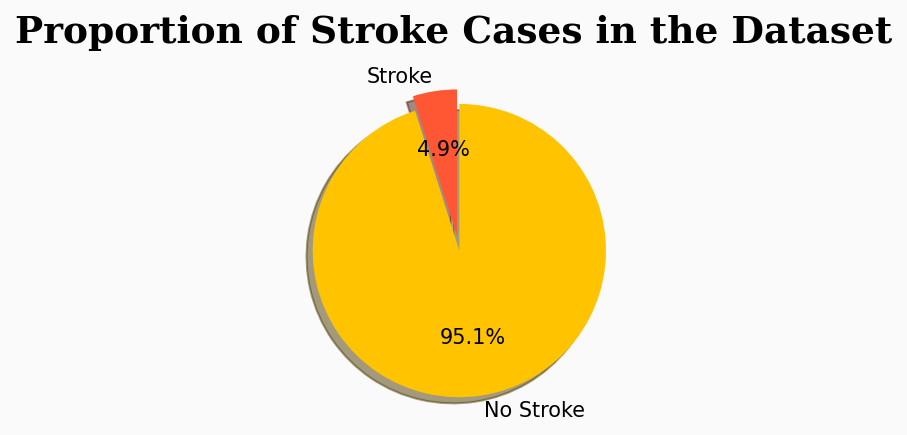

In [34]:
#Proportion of Stroke Cases in the Dataset

import matplotlib.pyplot as plt

# Creating a pie chart for stroke and no stroke cases
labels = ['Stroke', 'No Stroke']
sizes = [data_cleaned['stroke'].sum(), len(data_cleaned) - data_cleaned['stroke'].sum()]
colors = ['#FF5733', '#FFC300']  # brighter colors for stroke and no stroke
explode = (0.1, 0)  # explode the 'Stroke' slice

fig1, ax1 = plt.subplots(figsize=(3, 3), dpi=150, facecolor="#fafafa")
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title and styling
fig1.text(0.5, 0.95, 'Proportion of Stroke Cases in the Dataset', ha='center', fontsize=18, fontfamily='serif', fontweight='bold')


plt.show()

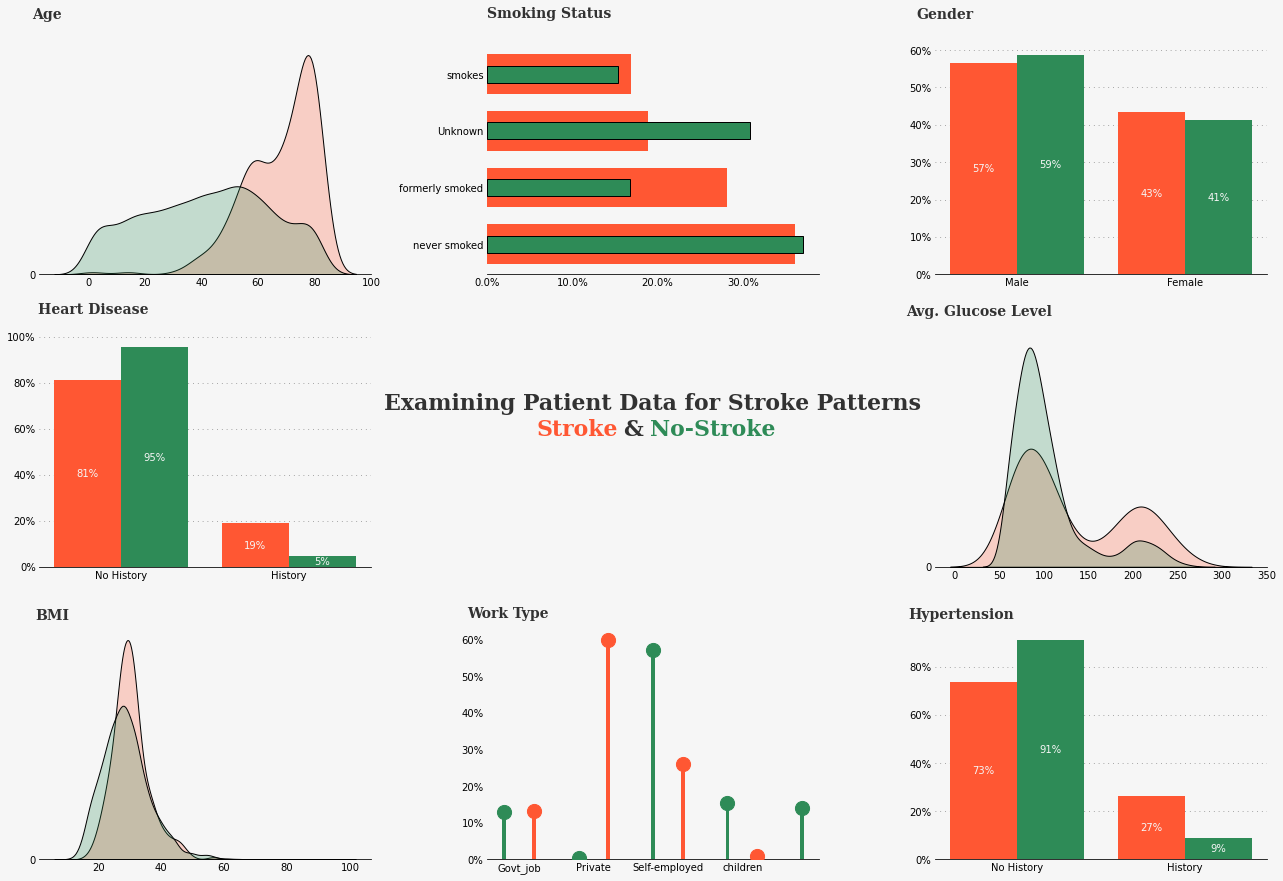

In [35]:
#Examining Patient Data for Stroke Patterns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color

# Define colors for stroke and no stroke
stroke_color = "#FF5733"   # Redish color for stroke
no_stroke_color = "#2E8B57"  # Greenish color for no stroke

# Plots

## Age
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
positive = pd.DataFrame(str_only["age"])
negative = pd.DataFrame(no_str_only["age"])
sns.kdeplot(positive["age"], ax=ax0, color=stroke_color, shade=True, ec='black', label="Stroke")
sns.kdeplot(negative["age"], ax=ax0, color=no_stroke_color, shade=True, ec='black', label="No Stroke")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# Smoking
positive = pd.DataFrame(str_only["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x / sum(positive["smoking_status"]) * 100)
negative = pd.DataFrame(no_str_only["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x / sum(negative["smoking_status"]) * 100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color=stroke_color, zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color=no_stroke_color, zorder=3, ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

# Gender
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x / sum(positive["gender"]) * 100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x / sum(negative["gender"]) * 100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color=stroke_color, width=0.4)
ax2.bar(x + 0.4, height=negative["Percentage"], zorder=3, color=no_stroke_color, width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male', 'Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i, j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%', xy=(i, j / 2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i, j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%', xy=(i + 0.4, j / 2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# Heart Disease
positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x / sum(positive["heart_disease"]) * 100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x / sum(negative["heart_disease"]) * 100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color=stroke_color, width=0.4)
ax3.bar(x + 0.4, height=negative["Percentage"], zorder=3, color=no_stroke_color, width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History', 'History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i, j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%', xy=(i, j / 2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i, j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%', xy=(i + 0.4, j / 2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

## AX4 - TITLE
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Examining Patient Data for Stroke Patterns\n\n', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.15, 0.57, "Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color=stroke_color)
ax4.text(0.41, 0.57, "&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49, 0.57, "No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color=no_stroke_color)

# Glucose
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
positive = pd.DataFrame(str_only["avg_glucose_level"])
negative = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5, color=stroke_color, ec='black', shade=True, label="Stroke")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color=no_stroke_color, ec='black', shade=True, label="No Stroke")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')

# BMI
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
positive = pd.DataFrame(str_only["bmi"])
negative = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6, color=stroke_color, ec='black', shade=True, label="Stroke")
sns.kdeplot(negative["bmi"], ax=ax6, color=no_stroke_color, ec='black', shade=True, label="No Stroke")
ax6.text(-0.06, 0.09, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')

# Work Type
positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x / sum(positive["work_type"]) * 100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x / sum(negative["work_type"]) * 100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color=no_stroke_color, width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3, s=200, color=no_stroke_color)
ax7.bar(np.arange(len(positive.index)) + 0.4, height=positive["Percentage"], zorder=3, color=stroke_color, width=0.05)
ax7.scatter(np.arange(len(positive.index)) + 0.4, positive["Percentage"], zorder=3, s=200, color=stroke_color)

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index)) + 0.4 / 2)
ax7.set_xticklabels(list(positive.index), rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

# Hypertension
positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x / sum(positive["hypertension"]) * 100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x / sum(negative["hypertension"]) * 100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color=stroke_color, width=0.4)
ax8.bar(x + 0.4, height=negative["Percentage"], zorder=3, color=no_stroke_color, width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History', 'History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i, j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%', xy=(i, j / 2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i, j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%', xy=(i + 0.4, j / 2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# Tidy up
for s in ["top", "right", "left"]:
    for i in range(0, 9):
        locals()["ax" + str(i)].spines[s].set_visible(False)

for i in range(0, 9):
    locals()["ax" + str(i)].set_facecolor(background_color)
    locals()["ax" + str(i)].tick_params(axis=u'both', which=u'both', length=0)

plt.show()


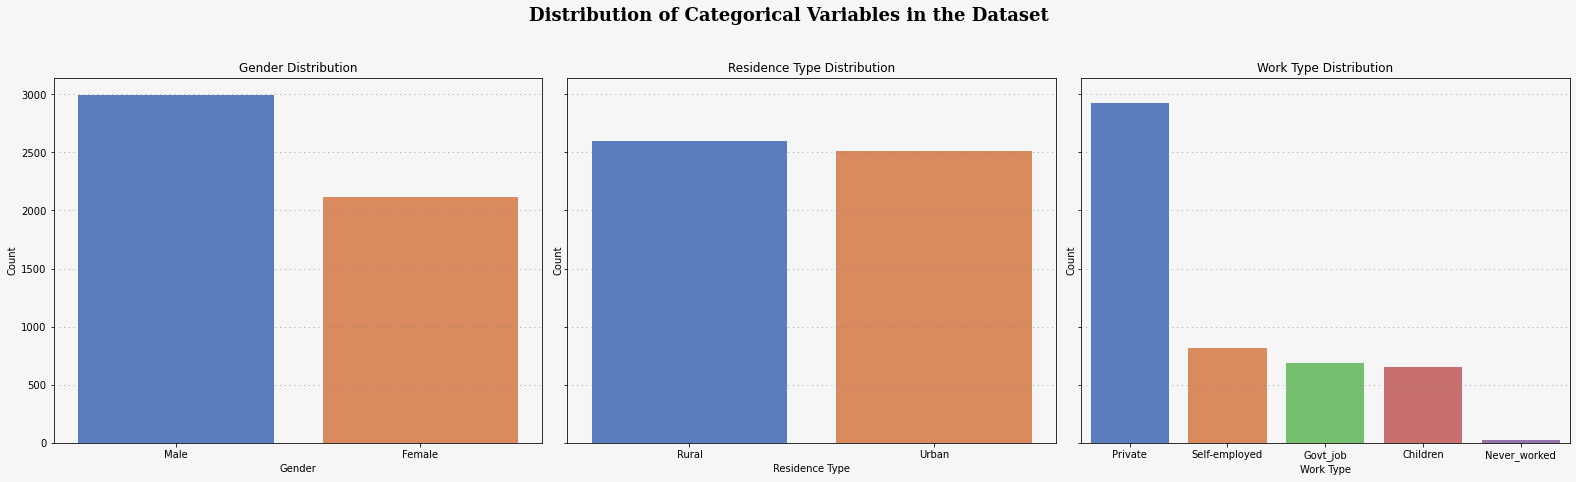

In [36]:
#Distribution of Categorical Variables in the Dataset

# Assuming data_cleaned is your cleaned dataset
df = data_cleaned.copy()

# Count values for each categorical variable
gender_counts = df['gender'].value_counts()
residence_type_counts = df['Residence_type'].value_counts()
work_type_counts = df['work_type'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(22, 7), sharey=True)

# Gender Distribution
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax[0], palette="muted")
ax[0].set_title('Gender Distribution')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Male', 'Female'], rotation=0)

# Residence Type Distribution
sns.barplot(x=residence_type_counts.index, y=residence_type_counts.values, ax=ax[1], palette="muted")
ax[1].set_title('Residence Type Distribution')
ax[1].set_xlabel('Residence Type')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Rural', 'Urban'], rotation=0)

# Work Type Distribution
sns.barplot(x=work_type_counts.index, y=work_type_counts.values, ax=ax[2], palette="muted")
ax[2].set_title('Work Type Distribution')
ax[2].set_xlabel('Work Type')
ax[2].set_ylabel('Count')
ax[2].set_xticklabels(['Private', 'Self-employed', 'Govt_job', 'Children', 'Never_worked'], rotation=0)

# Set background color
fig.patch.set_facecolor('#f6f6f6')
for a in ax:
    a.set_facecolor('#f6f6f6')
    a.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

# Title for the entire figure
fig.suptitle('Distribution of Categorical Variables in the Dataset', 
             fontsize=18, fontfamily='serif', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()


In [37]:
##########################MODEL PREPARATION #############################################################

In [38]:
####Lets Prepare our Data

In [39]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [40]:
# Example encoding for categorical columns

# Encoding 'gender' (assuming 'Male' and 'Female' are the only values)
data_cleaned['gender'] = data_cleaned['gender'].replace({'Male': 0, 'Female': 1}).astype(np.uint8)

# Encoding 'Residence_type' (assuming 'Rural' and 'Urban' are the only values)
data_cleaned['Residence_type'] = data_cleaned['Residence_type'].replace({'Rural': 0, 'Urban': 1}).astype(np.uint8)

# Encoding 'work_type' (assuming 'Private', 'Self-employed', 'Govt_job', 'children', and 'Never_worked' are the values)
data_cleaned['work_type'] = data_cleaned['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}).astype(np.uint8)

# Encoding 'ever_married'
data_cleaned['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(np.uint8)

# Encoding 'smoking_status'
data_cleaned['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 0, 
    'smokes': 1, 
    'formerly smoked': 2, 
    'Unknown': -1  # Assuming 'Unknown' is used for missing data or uncertain cases
}).astype(np.uint8)

# Ensure no non-numeric values remain
print(data_cleaned.dtypes)
print(data_cleaned.head())


gender                 uint8
age                  float64
hypertension           int64
heart_disease          int64
ever_married           uint8
work_type              uint8
Residence_type         uint8
avg_glucose_level    float64
bmi                  float64
smoking_status         uint8
stroke                 int64
dtype: object
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          0   
1       1  61.0             0              0             1          1   
2       0  80.0             0              1             1          0   
3       1  49.0             0              0             1          0   
4       1  79.0             1              0             1          1   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               2       1  
1               0             202.21  29.879487               0       1  
2     

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [44]:
# Separate features and target variable
X = data_cleaned.drop(columns=['stroke'])  # Features
y = data_cleaned['stroke']  # Target

In [45]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [47]:
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

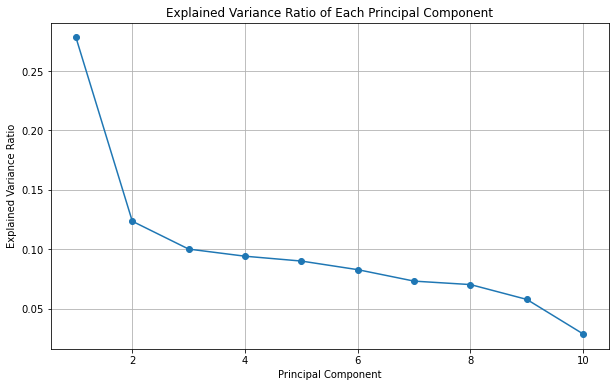

In [48]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [49]:
# Create a DataFrame with component loadings
components_df = pd.DataFrame(pca.components_, columns=X.columns)

# Display the component loadings
print(components_df)

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0  0.029754  0.499425      0.229224       0.170383      0.460118  -0.385473   
1 -0.483853  0.070129      0.329294       0.519190     -0.074761   0.312780   
2 -0.052430 -0.045684      0.044766      -0.068805     -0.032004  -0.044267   
3  0.710762 -0.035587      0.532992      -0.156782     -0.114600   0.230434   
4 -0.483499 -0.169817      0.310330      -0.677323     -0.080546  -0.009732   
5 -0.127475  0.105703      0.630929       0.037827      0.058547   0.070466   
6  0.013824 -0.350164      0.109504       0.317596     -0.585031  -0.240692   
7  0.079105 -0.099787      0.071279       0.295754     -0.095630  -0.082573   
8  0.015714  0.016270     -0.172036       0.050644      0.156230   0.788601   
9 -0.018794  0.754623     -0.109057      -0.144903     -0.618720   0.082563   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0        0.001347           0.212925  0.359811       -0.364712  


In [50]:
### Lets Train the models 

In [51]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [53]:
#Compute Feature Importances

importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [54]:
# Print feature importances
print(importances_df)

             Feature  Importance
7  avg_glucose_level    0.291471
8                bmi    0.236569
1                age    0.231084
9     smoking_status    0.063757
5          work_type    0.047824
6     Residence_type    0.034227
0             gender    0.032373
2       hypertension    0.024246
3      heart_disease    0.021097
4       ever_married    0.017352


In [55]:
################################## FEATURE IMPORTANCES ON UNBALANCED DATA ######################################

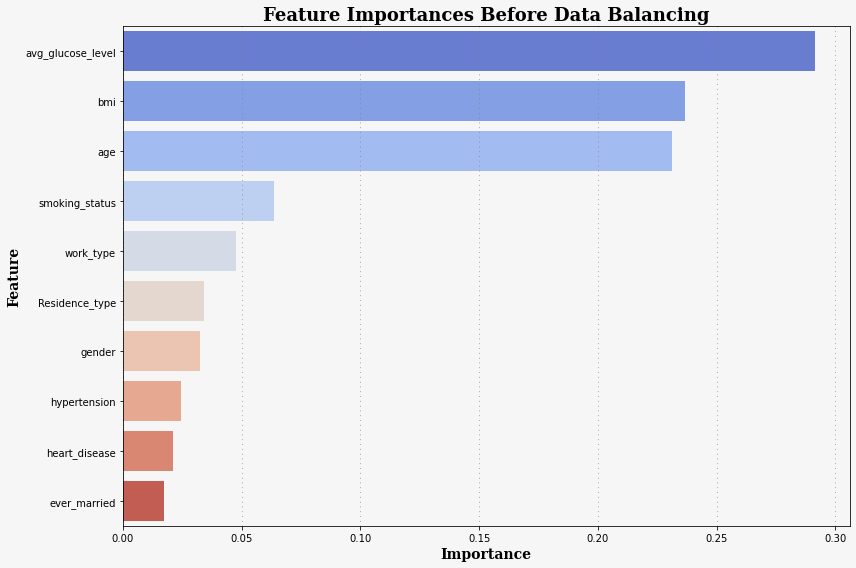

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm')

# Add title and labels
plt.title('Feature Importances Before Data Balancing', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')

# Set background color
plt.gcf().patch.set_facecolor('#f6f6f6')
plt.gca().set_facecolor('#f6f6f6')
plt.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout()
plt.show()

In [57]:
########################LET US CONSIDER BALANCING THIS DATASET###########################################

In [58]:
####################### MODELLING APPROACH OF BALANCING THE DATASET ###########################################

In [59]:
# Calculate the number of stroke and no stroke cases
num_stroke = data_cleaned['stroke'].sum()
num_no_stroke = len(data_cleaned) - num_stroke
# Print the numbers
print(f'Number of Stroke Cases: {num_stroke}')
print(f'Number of No Stroke Cases: {num_no_stroke}')

Number of Stroke Cases: 249
Number of No Stroke Cases: 4860


In [60]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4860))
print('Null Accuracy: ',4860/(4860+249))

Inverse of Null Accuracy:  0.04873752201996477
Null Accuracy:  0.9512624779800353


In [61]:
####################################### SMOTE BALANCING TECHNIQUES ################################################

In [62]:
X  = data_cleaned[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','smoking_status','Residence_type','ever_married']]
y = data_cleaned['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [63]:
# Our data is biased, we can fix this with SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

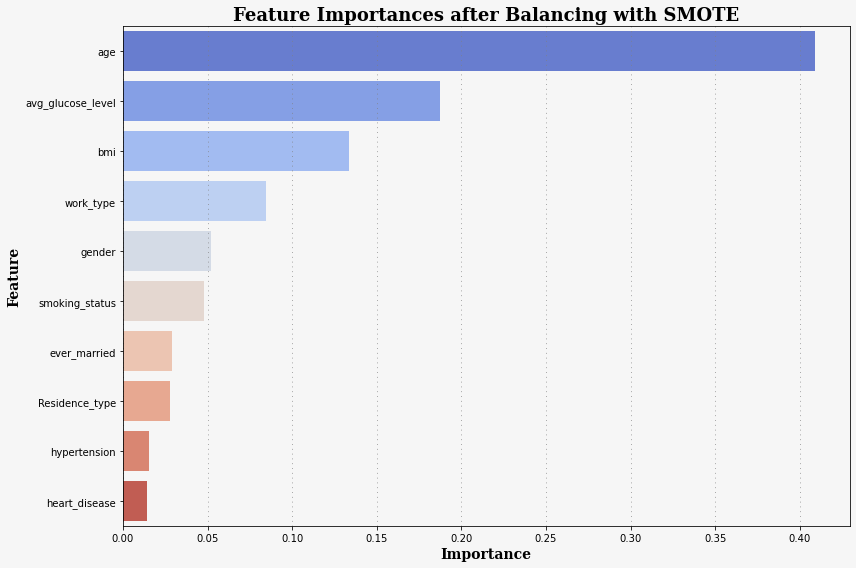

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Assuming 'data_cleaned' is already loaded with your data
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Residence_type', 'ever_married']]
y = data_cleaned['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Balance the data using SMOTE
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resh, y_train_resh)

# Extract feature importances
importances = model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm')

# Add title and labels
plt.title('Feature Importances after Balancing with SMOTE', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')

# Set background color
plt.gcf().patch.set_facecolor('#f6f6f6')
plt.gca().set_facecolor('#f6f6f6')
plt.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout()
plt.show()


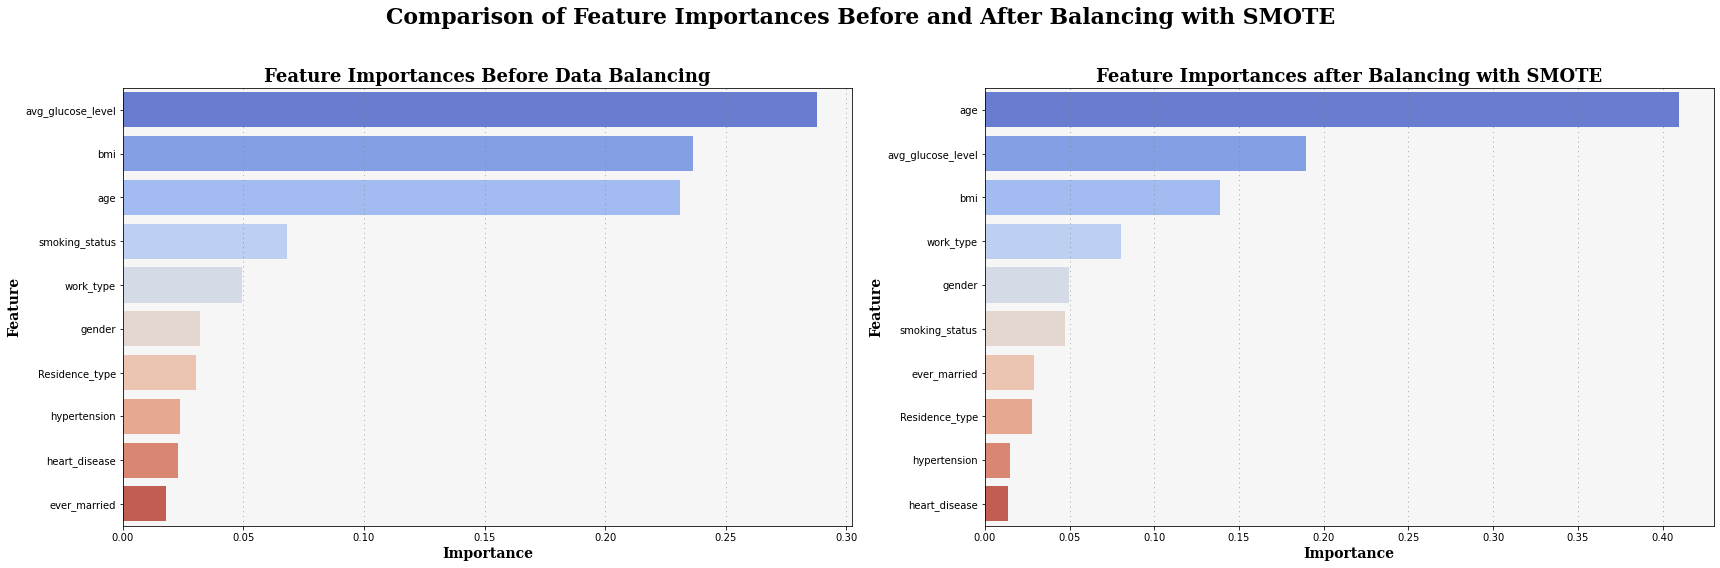

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Assuming 'data_cleaned' is already loaded with your data
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Residence_type', 'ever_married']]
y = data_cleaned['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Train a Random Forest classifier on the original data
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)

# Extract feature importances before SMOTE
importances_before = model_before.feature_importances_
importances_df_before = pd.DataFrame({'Feature': X.columns, 'Importance': importances_before}).sort_values(by='Importance', ascending=False)

# Balance the data using SMOTE
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Train a Random Forest classifier on the resampled data
model_after = RandomForestClassifier(random_state=42)
model_after.fit(X_train_resh, y_train_resh)

# Extract feature importances after SMOTE
importances_after = model_after.feature_importances_
importances_df_after = pd.DataFrame({'Feature': X.columns, 'Importance': importances_after}).sort_values(by='Importance', ascending=False)

# Plotting feature importances side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Add a top title for both plots
fig.suptitle('Comparison of Feature Importances Before and After Balancing with SMOTE', fontsize=22, fontweight='bold', fontfamily='serif')

# Plot feature importances before balancing
sns.barplot(x='Importance', y='Feature', data=importances_df_before, palette='coolwarm', ax=axes[0])
axes[0].set_title('Feature Importances Before Data Balancing', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0].set_facecolor('#f6f6f6')
axes[0].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after balancing
sns.barplot(x='Importance', y='Feature', data=importances_df_after, palette='coolwarm', ax=axes[1])
axes[1].set_title('Feature Importances after Balancing with SMOTE', fontsize=18, fontweight='bold', fontfamily='serif')
axes[1].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1].set_facecolor('#f6f6f6')
axes[1].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()


In [65]:
######################################LET US START EXPLORING THE MODELS PERFORMANCE ###############################

In [66]:
############################### MODELS PERFOMANCES ON SMOTE BALANCED DATASET######################################

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               93.59%  83.95%              80.33%            86.50%
accuracy         93.51%  83.28%              79.74%            86.22%
recall           95.51%  87.74%              82.87%            88.90%
precision        91.87%  80.58%              78.02%            84.40%
roc_auc          98.54%  90.48%              88.18%            93.84%


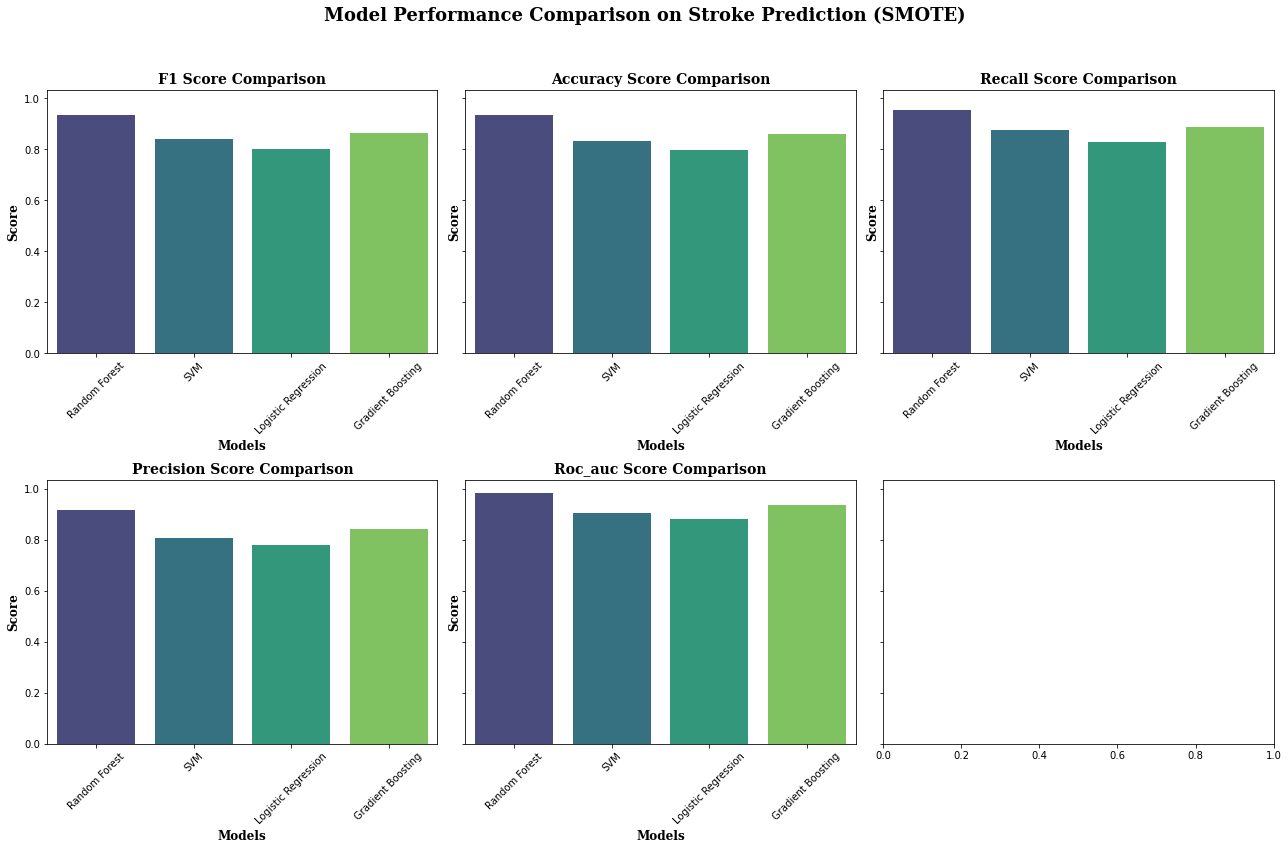

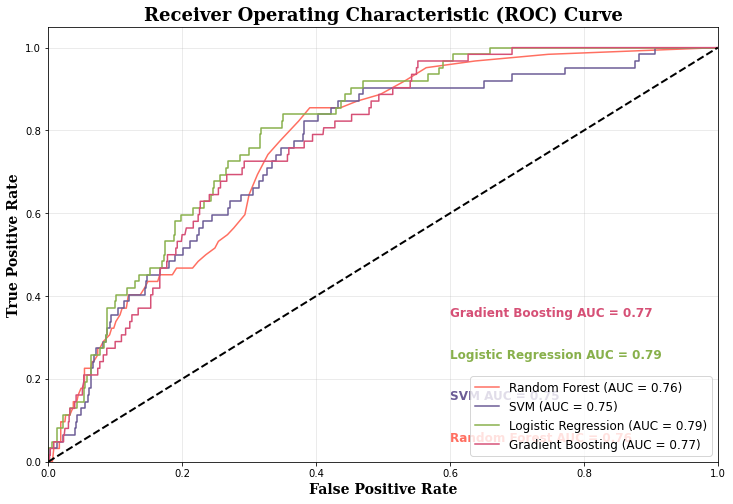

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Oversampling with SMOTE
oversample = SMOTE(random_state=42)
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_display = df_models_smote.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_display)

# Plotting bar plots for other metrics
metrics = df_models_smote.index
models = df_models_smote.columns

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x=df_models_smote.columns, y=df_models_smote.loc[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} Score Comparison', fontsize=14, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Models', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

fig.suptitle('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Fit the models on the SMOTE-balanced dataset
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

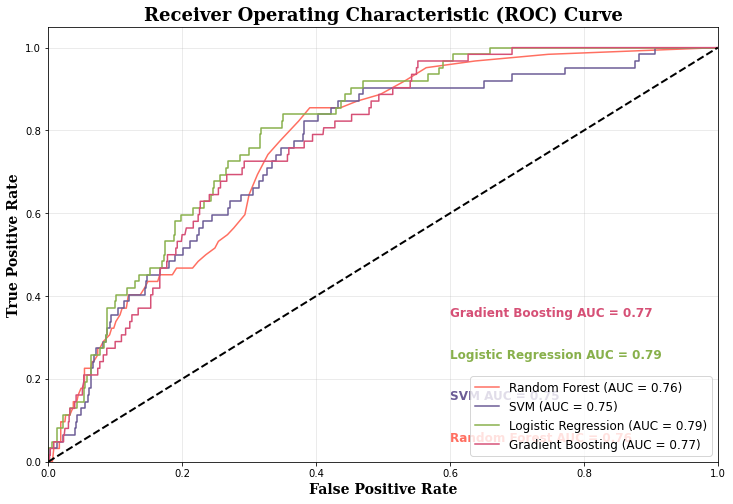

In [62]:
# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

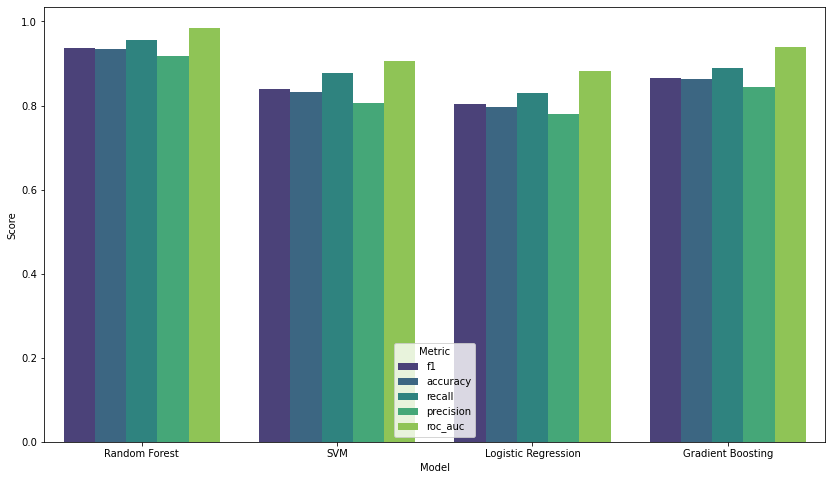

In [68]:
# Plotting bar plots for evaluation metrics
metrics_df = df_models_smote.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')
metrics_df = metrics_df.rename(columns={'index': 'Metric'})

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=metrics_df, x='Model', y='Score', hue='Metric', palette='viridis')

# Adding the numbers on top of the bars
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.2f', fontsize=10, padding=3, color='black')

# Formatting
plt.title('Model Evaluation Metrics Comparison', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Models', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Score', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

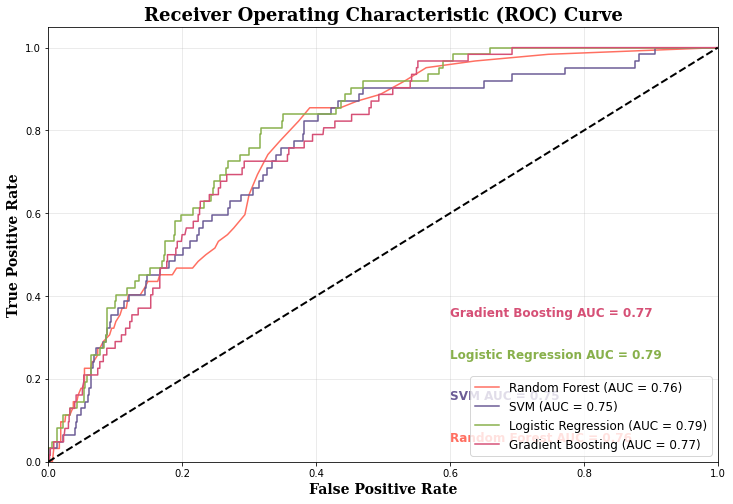

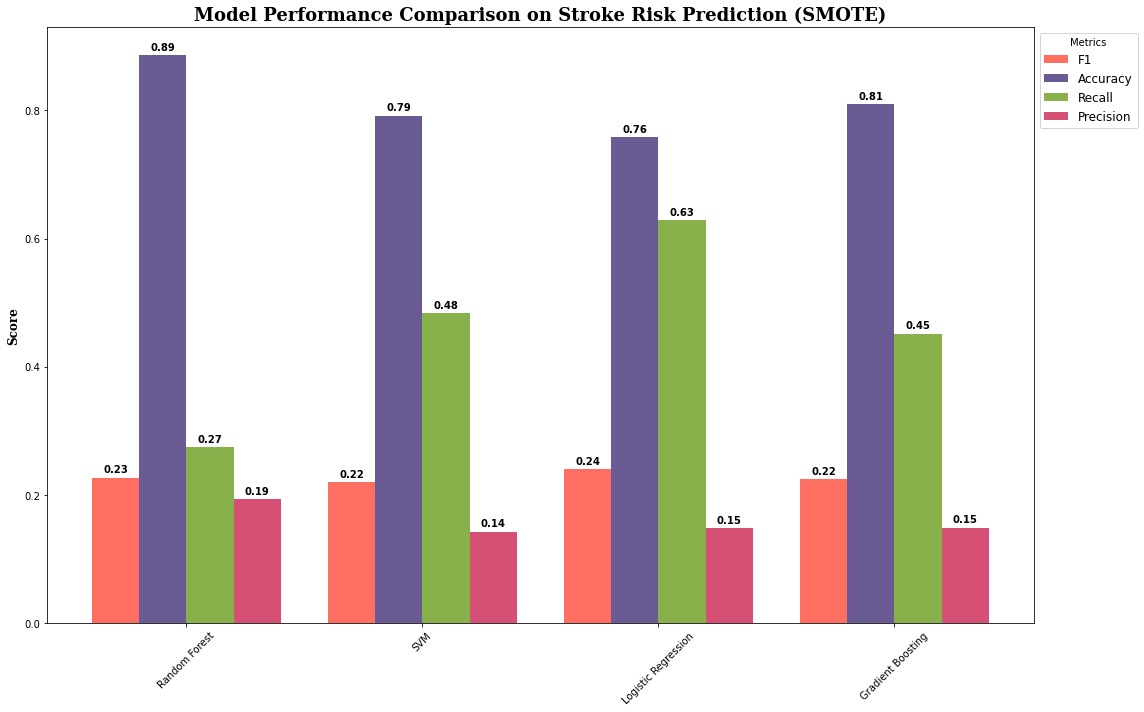

In [82]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define pipelines for each model with necessary preprocessing
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True, random_state=42))
])

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42))
])

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Fit the models
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Compute other metrics
results = {}
models = ["Random Forest", "SVM", "Logistic Regression", "Gradient Boosting"]
probabilities = [rf_probs, svm_probs, logreg_probs, gb_probs]

for i, (name, probs) in enumerate(zip(models, probabilities)):
    y_pred = (probs >= 0.5).astype(int)
    results[name] = {
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }

# Create a DataFrame for visualization
df_models_smote = pd.DataFrame(results).T

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_smote[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Risk Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

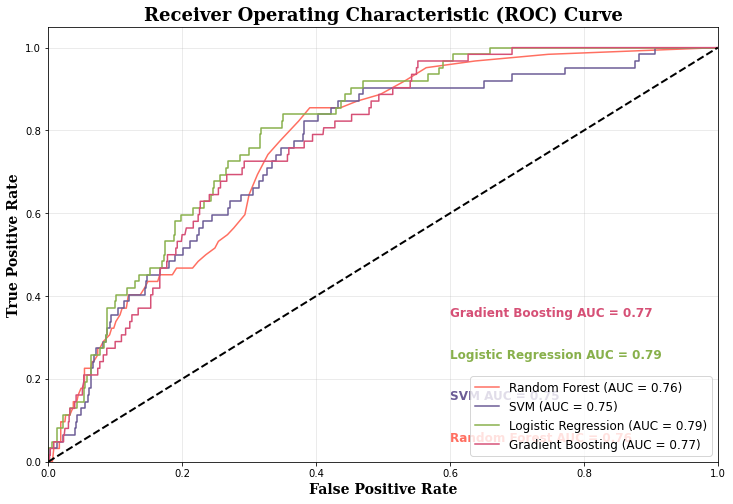

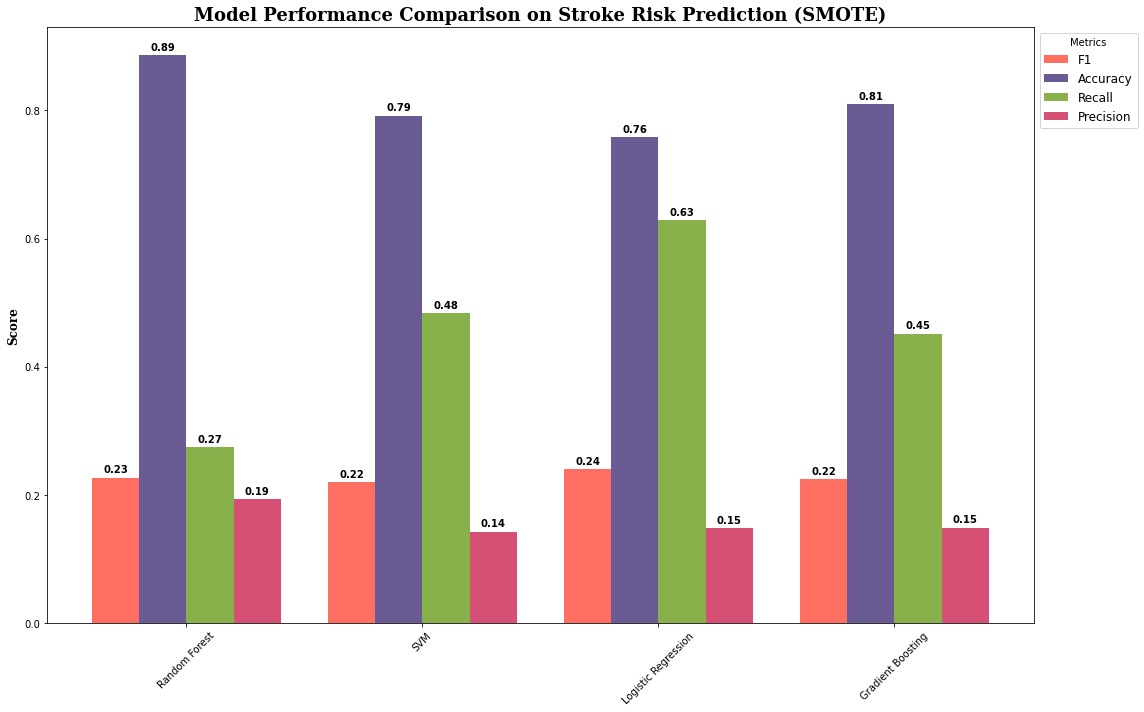

In [79]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fit the models
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Compute other metrics
results = {}
models = ["Random Forest", "SVM", "Logistic Regression", "Gradient Boosting"]
probabilities = [rf_probs, svm_probs, logreg_probs, gb_probs]

for i, (name, probs) in enumerate(zip(models, probabilities)):
    y_pred = (probs >= 0.5).astype(int)
    results[name] = {
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }

# Create a DataFrame for visualization
df_models_smote = pd.DataFrame(results).T

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_smote[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Risk Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


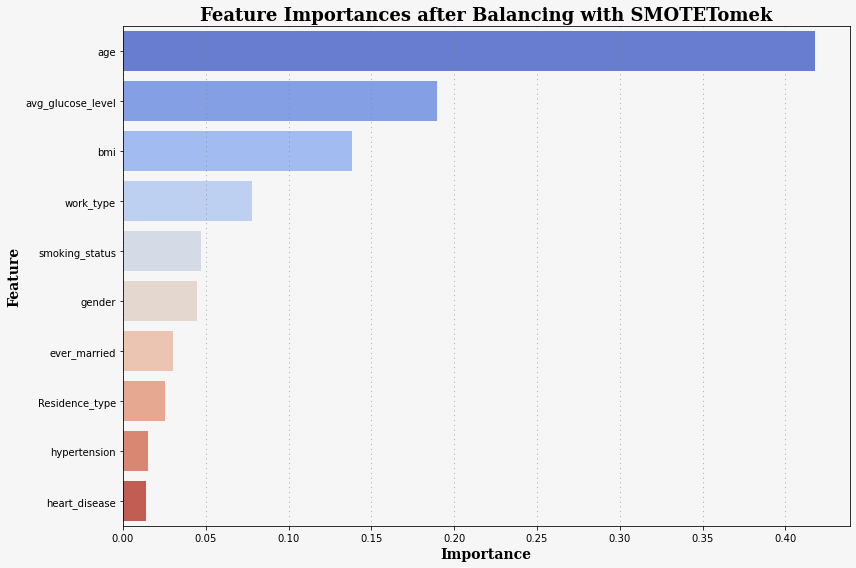

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek

# Assuming 'data_cleaned' is already loaded with your data
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Residence_type', 'ever_married']]
y = data_cleaned['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Balance the data using SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resh, y_train_resh = smote_tomek.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resh, y_train_resh)

# Extract feature importances
importances = model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances after balancing with SMOTETomek
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm')

# Add title and labels
plt.title('Feature Importances after Balancing with SMOTETomek', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')

# Set background color
plt.gcf().patch.set_facecolor('#f6f6f6')
plt.gca().set_facecolor('#f6f6f6')
plt.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout()
plt.show()

In [69]:
################################# RANDOM OVER SAMPLING AND RANDOM UNDER SAMPLING ########################################

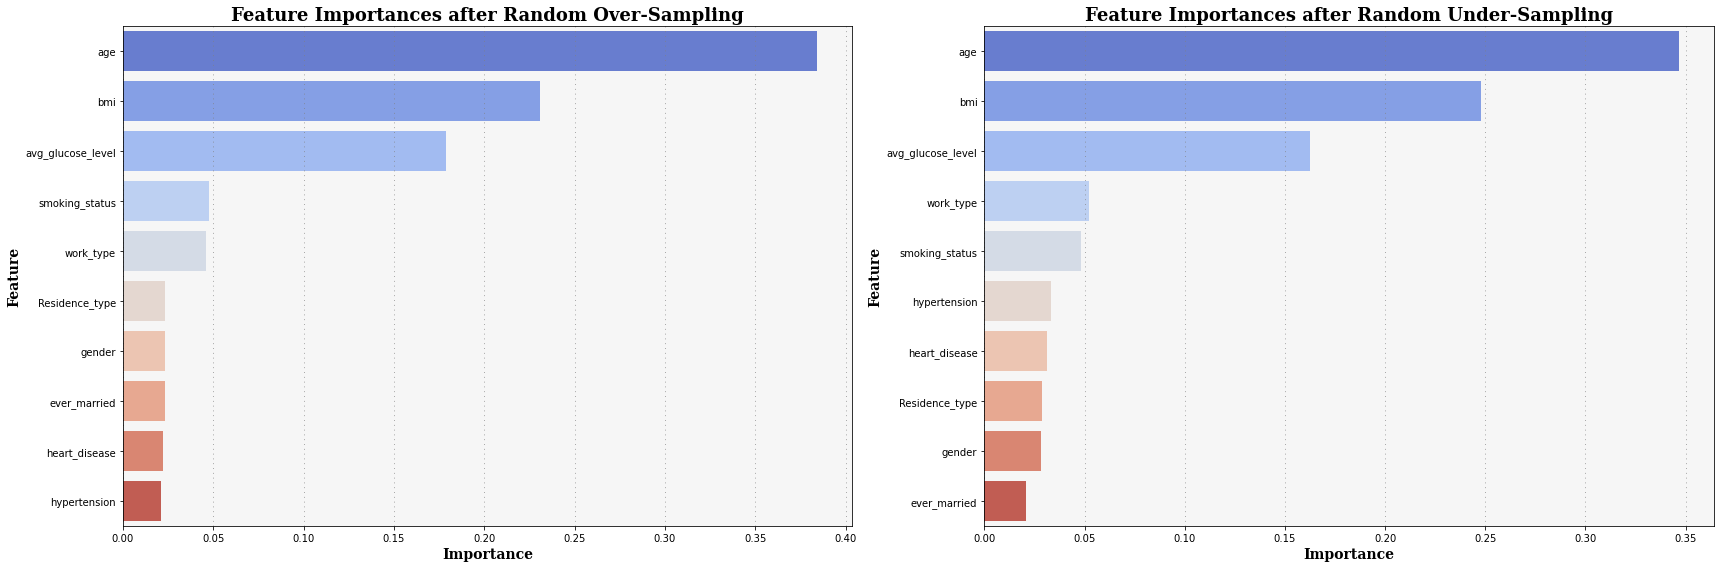

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'data_cleaned' is already loaded with your data
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Residence_type', 'ever_married']]
y = data_cleaned['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the oversampled data
model_ros = RandomForestClassifier(random_state=42)
model_ros.fit(X_train_ros, y_train_ros)

# Extract feature importances for the oversampled data
importances_ros = model_ros.feature_importances_
importances_df_ros = pd.DataFrame({'Feature': X.columns, 'Importance': importances_ros}).sort_values(by='Importance', ascending=False)

# Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the undersampled data
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)

# Extract feature importances for the undersampled data
importances_rus = model_rus.feature_importances_
importances_df_rus = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rus}).sort_values(by='Importance', ascending=False)

# Plotting feature importances side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Plot feature importances after Random Over-Sampling
sns.barplot(x='Importance', y='Feature', data=importances_df_ros, palette='coolwarm', ax=axes[0])
axes[0].set_title('Feature Importances after Random Over-Sampling', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0].set_facecolor('#f6f6f6')
axes[0].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Random Under-Sampling
sns.barplot(x='Importance', y='Feature', data=importances_df_rus, palette='coolwarm', ax=axes[1])
axes[1].set_title('Feature Importances after Random Under-Sampling', fontsize=18, fontweight='bold', fontfamily='serif')
axes[1].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1].set_facecolor('#f6f6f6')
axes[1].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout()
plt.show()


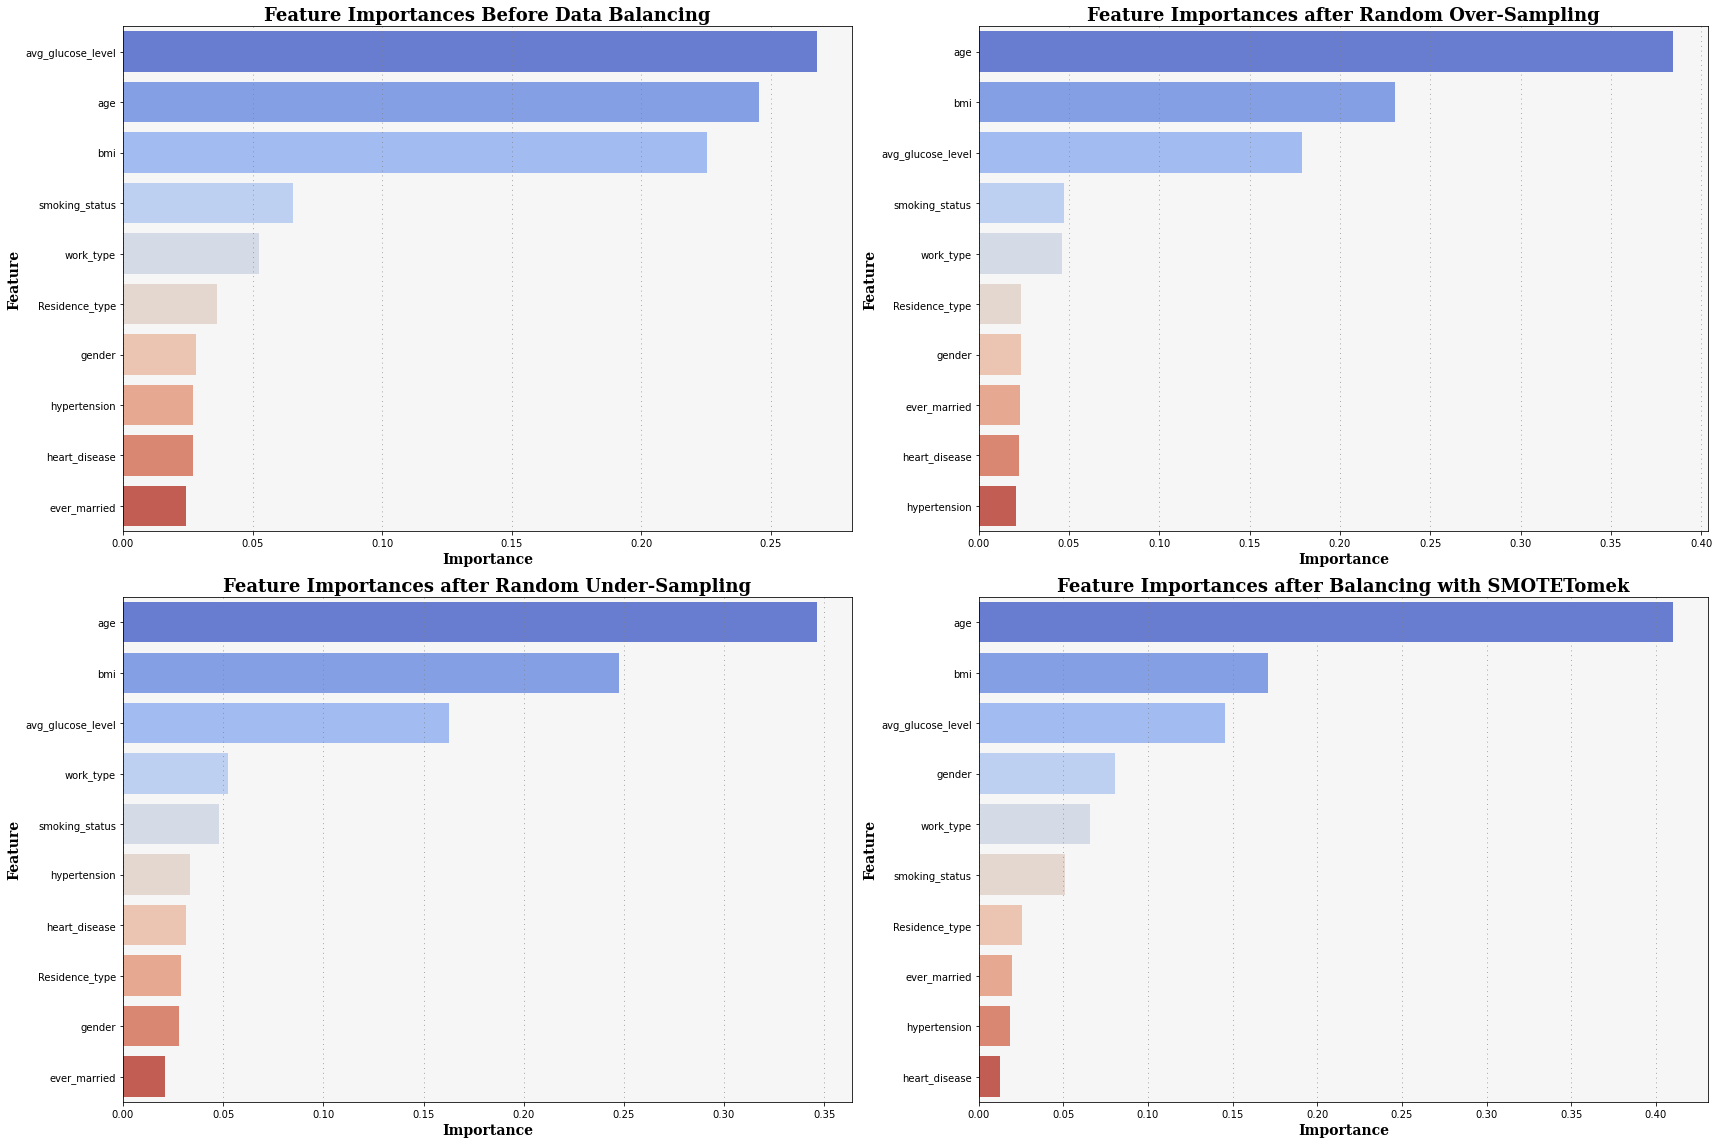

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Assuming 'data_cleaned' is already loaded with your data
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Residence_type', 'ever_married']]
y = data_cleaned['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# 1. Feature Importances Before Data Balancing
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
importances_before = model_before.feature_importances_
importances_df_before = pd.DataFrame({'Feature': X.columns, 'Importance': importances_before}).sort_values(by='Importance', ascending=False)

# 2. Feature Importances after Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
model_ros = RandomForestClassifier(random_state=42)
model_ros.fit(X_train_ros, y_train_ros)
importances_ros = model_ros.feature_importances_
importances_df_ros = pd.DataFrame({'Feature': X.columns, 'Importance': importances_ros}).sort_values(by='Importance', ascending=False)

# 3. Feature Importances after Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)
importances_rus = model_rus.feature_importances_
importances_df_rus = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rus}).sort_values(by='Importance', ascending=False)

# 4. Feature Importances after Balancing with SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resh, y_train_resh = smote_tomek.fit_resample(X_train, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resh, y_train_resh)
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importances in a single figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# Plot feature importances before balancing
sns.barplot(x='Importance', y='Feature', data=importances_df_before, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Feature Importances Before Data Balancing', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0, 0].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 0].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 0].set_facecolor('#f6f6f6')
axes[0, 0].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Random Over-Sampling
sns.barplot(x='Importance', y='Feature', data=importances_df_ros, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Feature Importances after Random Over-Sampling', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0, 1].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 1].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 1].set_facecolor('#f6f6f6')
axes[0, 1].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Random Under-Sampling
sns.barplot(x='Importance', y='Feature', data=importances_df_rus, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importances after Random Under-Sampling', fontsize=18, fontweight='bold', fontfamily='serif')
axes[1, 0].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 0].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 0].set_facecolor('#f6f6f6')
axes[1, 0].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Balancing with SMOTETomek
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Importances after Balancing with SMOTETomek', fontsize=18, fontweight='bold', fontfamily='serif')
axes[1, 1].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 1].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 1].set_facecolor('#f6f6f6')
axes[1, 1].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout()
plt.show()

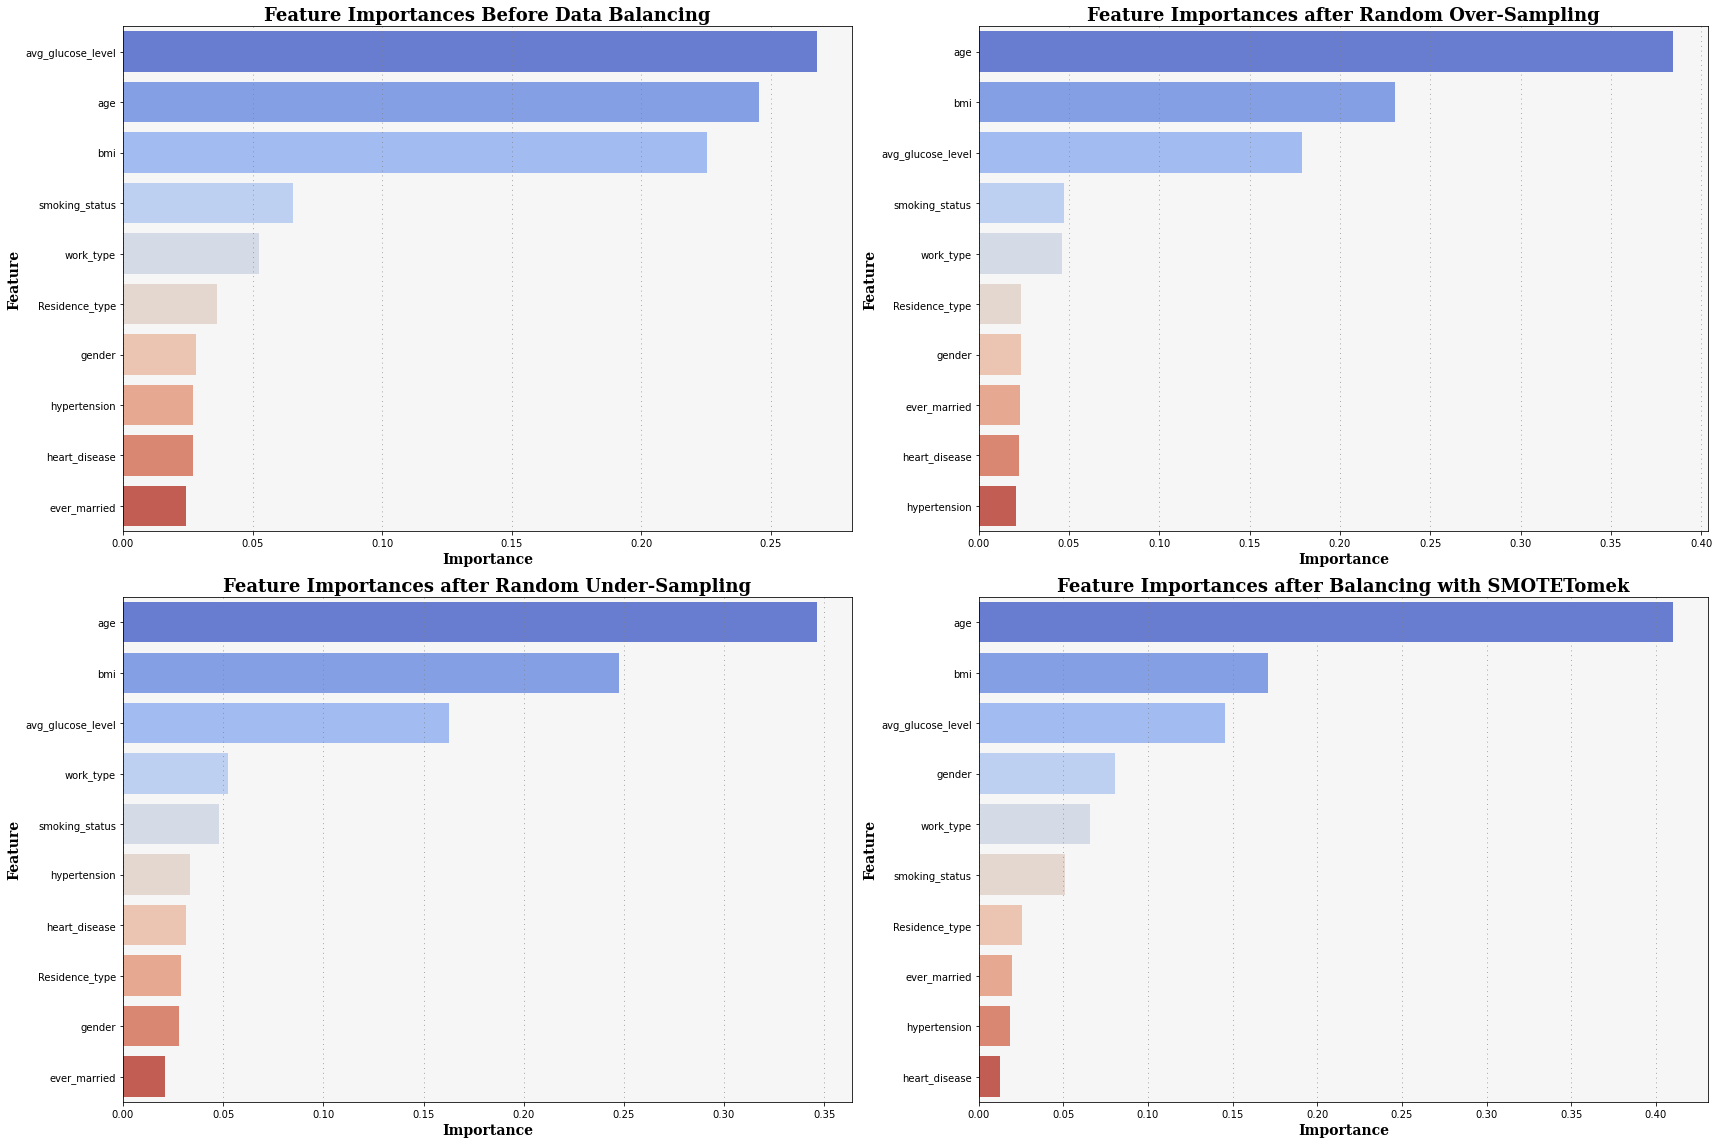

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Assuming 'data_cleaned' is already loaded with your data
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'Residence_type', 'ever_married']]
y = data_cleaned['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# 1. Feature Importances Before Data Balancing
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
importances_before = model_before.feature_importances_
importances_df_before = pd.DataFrame({'Feature': X.columns, 'Importance': importances_before}).sort_values(by='Importance', ascending=False)

# 2. Feature Importances after Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
model_ros = RandomForestClassifier(random_state=42)
model_ros.fit(X_train_ros, y_train_ros)
importances_ros = model_ros.feature_importances_
importances_df_ros = pd.DataFrame({'Feature': X.columns, 'Importance': importances_ros}).sort_values(by='Importance', ascending=False)

# 3. Feature Importances after Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
model_rus = RandomForestClassifier(random_state=42)
model_rus.fit(X_train_rus, y_train_rus)
importances_rus = model_rus.feature_importances_
importances_df_rus = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rus}).sort_values(by='Importance', ascending=False)

# 4. Feature Importances after Balancing with SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resh, y_train_resh = smote_tomek.fit_resample(X_train, y_train)
model_smote_tomek = RandomForestClassifier(random_state=42)
model_smote_tomek.fit(X_train_resh, y_train_resh)
importances_smote_tomek = model_smote_tomek.feature_importances_
importances_df_smote_tomek = pd.DataFrame({'Feature': X.columns, 'Importance': importances_smote_tomek}).sort_values(by='Importance', ascending=False)

# Plotting feature importances in a single figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# Plot feature importances before balancing
sns.barplot(x='Importance', y='Feature', data=importances_df_before, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Feature Importances Before Data Balancing', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0, 0].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 0].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 0].set_facecolor('#f6f6f6')
axes[0, 0].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Random Over-Sampling
sns.barplot(x='Importance', y='Feature', data=importances_df_ros, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Feature Importances after Random Over-Sampling', fontsize=18, fontweight='bold', fontfamily='serif')
axes[0, 1].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 1].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[0, 1].set_facecolor('#f6f6f6')
axes[0, 1].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Random Under-Sampling
sns.barplot(x='Importance', y='Feature', data=importances_df_rus, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importances after Random Under-Sampling', fontsize=18, fontweight='bold', fontfamily='serif')
axes[1, 0].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 0].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 0].set_facecolor('#f6f6f6')
axes[1, 0].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

# Plot feature importances after Balancing with SMOTETomek
sns.barplot(x='Importance', y='Feature', data=importances_df_smote_tomek, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Importances after Balancing with SMOTETomek', fontsize=18, fontweight='bold', fontfamily='serif')
axes[1, 1].set_xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 1].set_ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
axes[1, 1].set_facecolor('#f6f6f6')
axes[1, 1].grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))

plt.tight_layout()
plt.show()


In [71]:
######################################LET US START EXPLORING THE MODELS PERFORMANCE ###############################

In [72]:
############################### MODELS PERFOMANCES ON SMOTE BALANCED DATASET######################################

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               93.59%  83.95%              80.33%            86.50%
accuracy         93.51%  83.28%              79.74%            86.22%
recall           95.51%  87.74%              82.87%            88.90%
precision        91.87%  80.58%              78.02%            84.40%
roc_auc          98.54%  90.48%              88.18%            93.84%


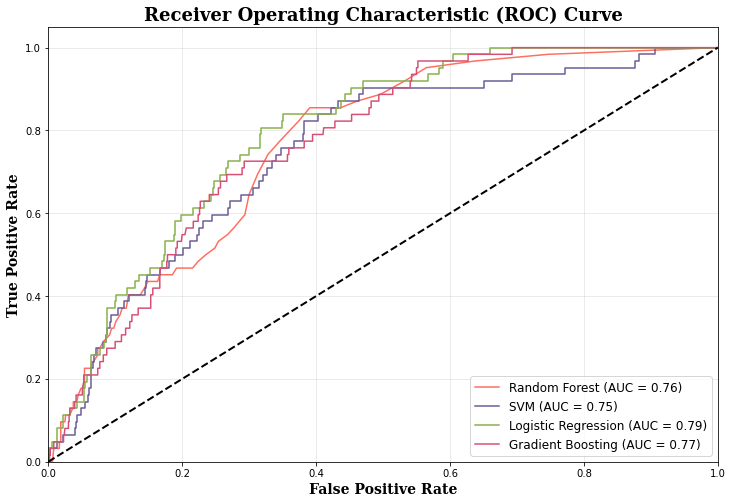

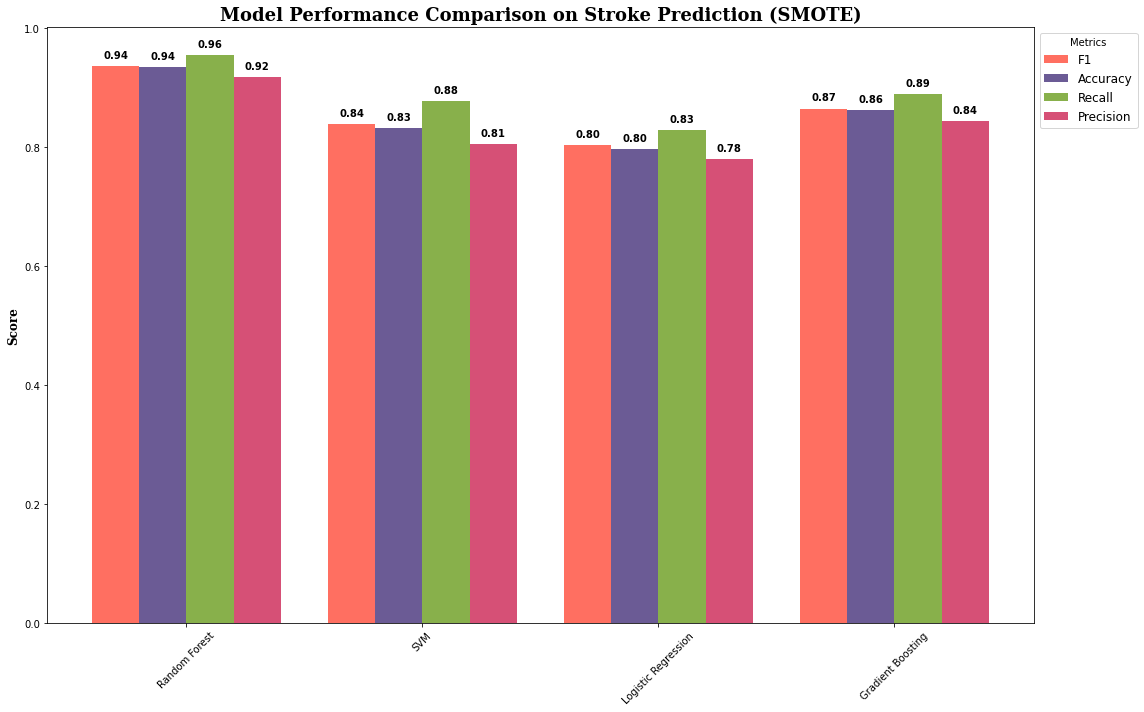

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Oversampling with SMOTE
oversample = SMOTE(random_state=42)
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_display = df_models_smote.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_display)

# Plot ROC AUC Curves
plt.figure(figsize=(12, 8))

rf_probs = rf_pipeline.fit(X_train_resh, y_train_resh).predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.fit(X_train_resh, y_train_resh).predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.fit(X_train_resh, y_train_resh).predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.fit(X_train_resh, y_train_resh).predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    if metric in df_models_smote.index:
        values = df_models_smote.loc[metric]
        positions = np.arange(len(df_models_smote.columns)) + i * width
        bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
        
        # Add score values on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(df_models_smote.columns)) + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(df_models_smote.columns, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [74]:
############################### MODELS PERFOMANCES ON SMOTETomek BALANCED DATASET######################################

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               93.76%  84.49%              80.62%            86.69%
accuracy         93.68%  83.84%              80.05%            86.33%
recall           95.76%  88.31%              83.07%            89.56%
precision        91.98%  81.09%              78.37%            84.14%
roc_auc          98.71%  90.93%              88.59%            94.08%


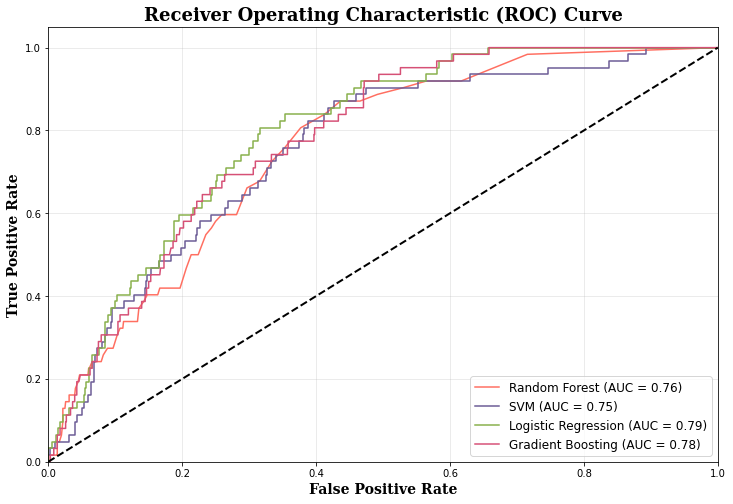

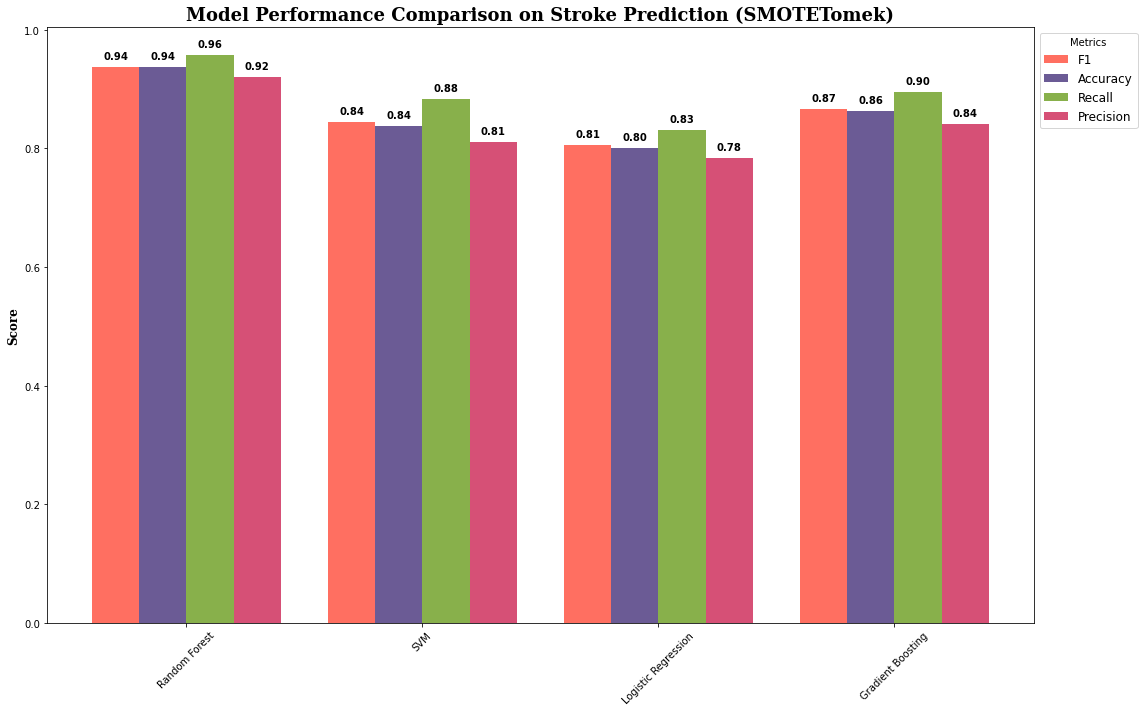

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Balancing with SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smotetomek.fit_resample(X_train, y_train)

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smotetomek = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smotetomek.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smotetomek_display = df_models_smotetomek.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smotetomek_display)

# Plot ROC AUC Curves
plt.figure(figsize=(12, 8))

rf_probs = rf_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    if metric in df_models_smotetomek.index:
        values = df_models_smotetomek.loc[metric]
        positions = np.arange(len(df_models_smotetomek.columns)) + i * width
        bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
        
        # Add score values on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(df_models_smotetomek.columns)) + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(df_models_smotetomek.columns, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (SMOTETomek)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [94]:
############################### MODELS PERFOMANCES ON RANDOM UNDER SAMPLED BALANCED DATASET################################

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               80.51%  79.82%              80.02%            76.67%
accuracy         79.72%  78.09%              79.41%            75.93%
recall           84.44%  86.61%              82.89%            80.15%
precision        77.99%  74.19%              77.81%            74.48%
roc_auc          83.43%  83.16%              83.48%            82.71%


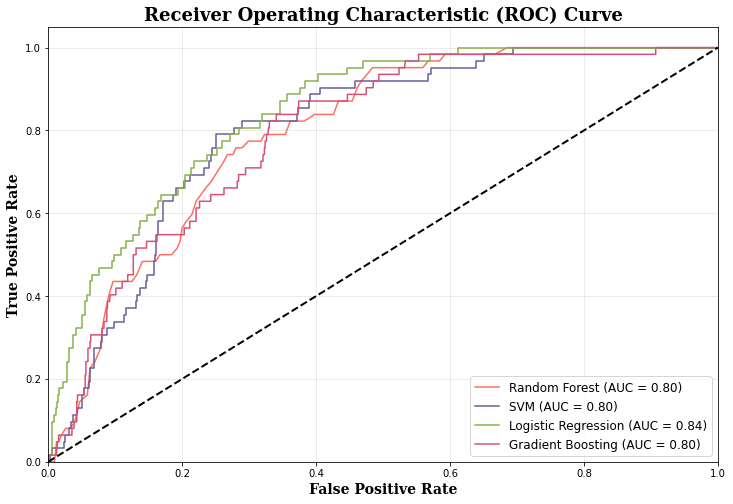

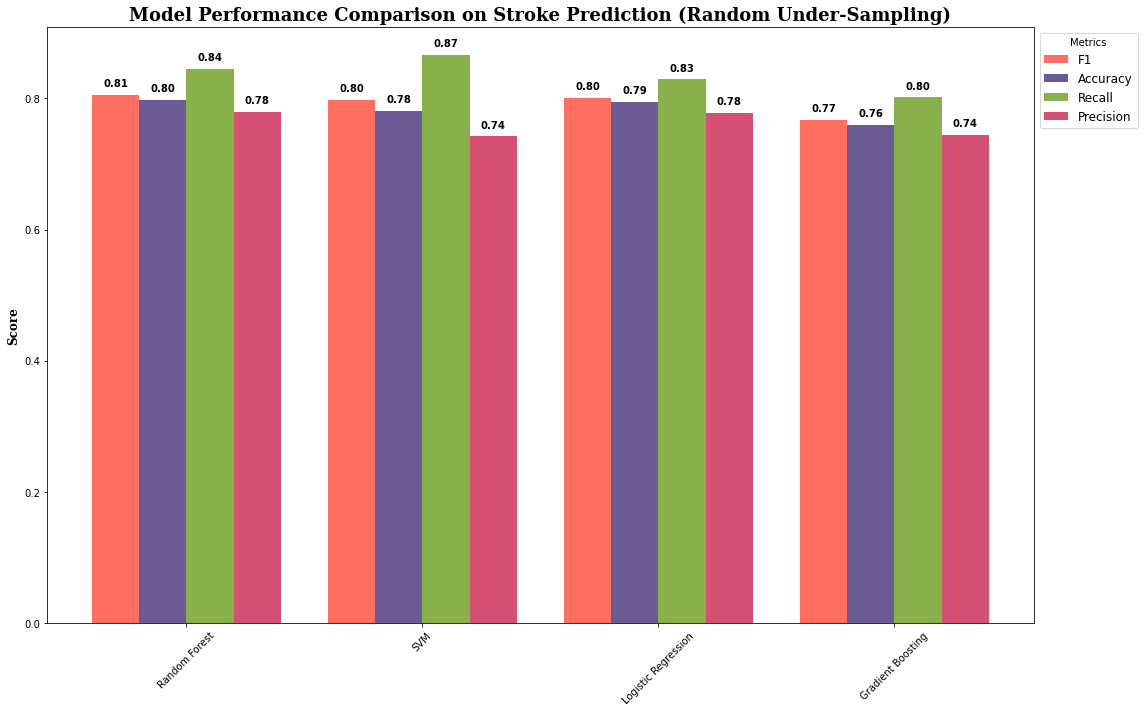

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Balancing with Random Under-Sampling
undersample = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train, y_train)

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_rus = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_rus.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_rus_display = df_models_rus.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_rus_display)

# Plot ROC AUC Curves
plt.figure(figsize=(12, 8))

rf_probs = rf_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    if metric in df_models_rus.index:
        values = df_models_rus.loc[metric]
        positions = np.arange(len(df_models_rus.columns)) + i * width
        bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
        
        # Add score values on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(df_models_rus.columns)) + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(df_models_rus.columns, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (Random Under-Sampling)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [76]:
############################### MODELS PERFOMANCES ON RANDOM OVER SAMPLED BALANCED DATASET################################

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               99.20%  82.22%              77.99%            87.26%
accuracy         99.19%  81.35%              77.17%            86.40%
recall          100.00%  86.28%              80.92%            93.23%
precision        98.41%  78.55%              75.28%            82.04%
roc_auc         100.00%  87.72%              84.33%            93.42%


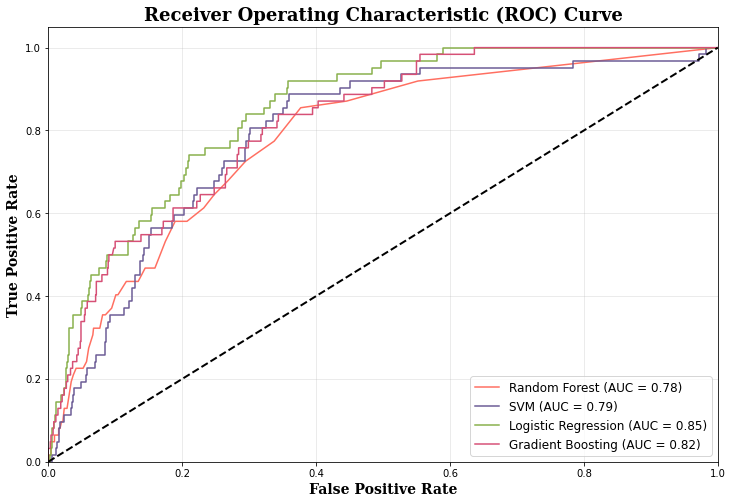

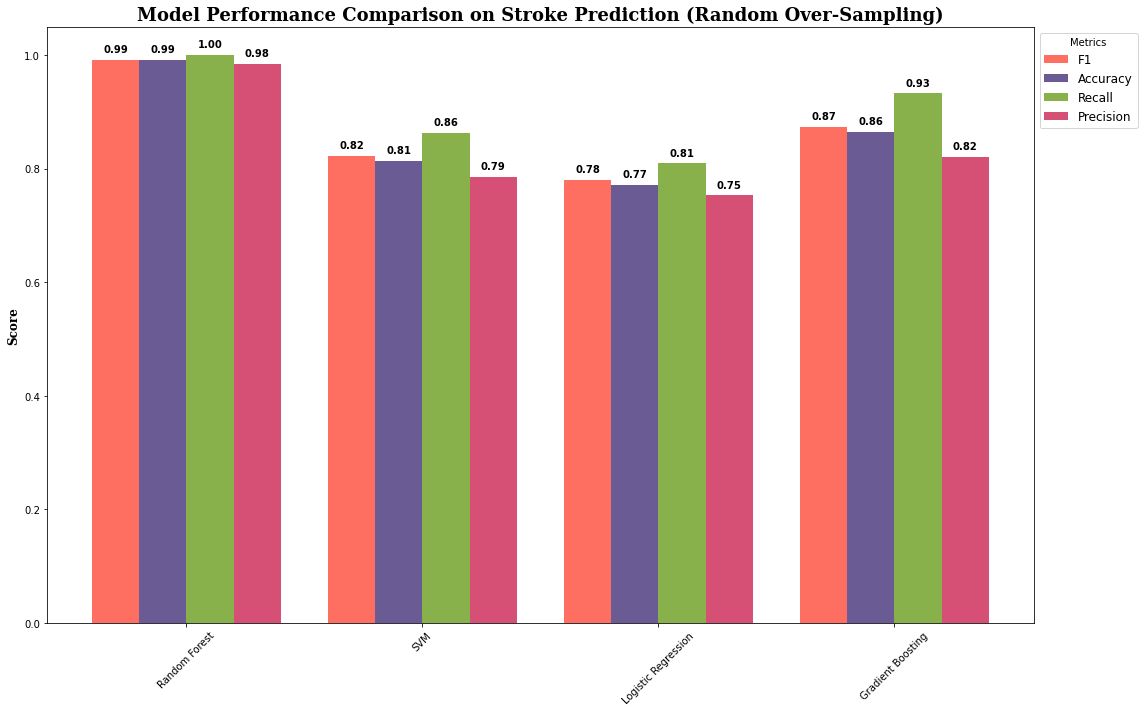

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Balancing with Random Over-Sampling
oversample = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_balanced, y_train_balanced, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_ros = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_ros.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_ros_display = df_models_ros.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_ros_display)

# Plot ROC AUC Curves
plt.figure(figsize=(12, 8))

rf_probs = rf_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.fit(X_train_balanced, y_train_balanced).predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    if metric in df_models_ros.index:
        values = df_models_ros.loc[metric]
        positions = np.arange(len(df_models_ros.columns)) + i * width
        bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
        
        # Add score values on top of each bar
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(df_models_ros.columns)) + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(df_models_ros.columns, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (Random Over-Sampling)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


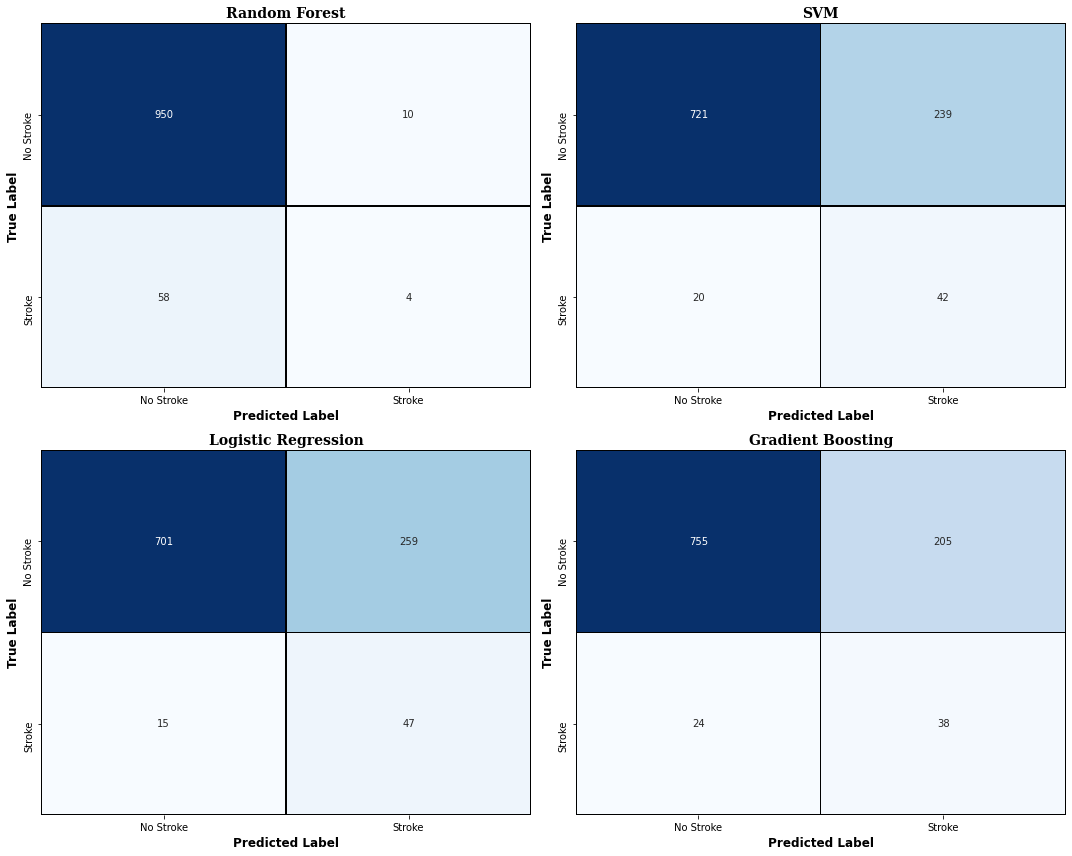

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit the models on the balanced training data
rf_pipeline.fit(X_train_balanced, y_train_balanced)
svm_pipeline.fit(X_train_balanced, y_train_balanced)
logreg_pipeline.fit(X_train_balanced, y_train_balanced)
gb_pipeline.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test set
rf_preds = rf_pipeline.predict(X_test)
svm_preds = svm_pipeline.predict(X_test)
logreg_preds = logreg_pipeline.predict(X_test)
gb_preds = gb_pipeline.predict(X_test)

# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
logreg_cm = confusion_matrix(y_test, logreg_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

# Create a figure to display the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Titles for the confusion matrices
titles = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']
cms = [rf_cm, svm_cm, logreg_cm, gb_cm]

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, linewidths=.5, linecolor='black')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif')
    ax.xaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)
    ax.yaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)

plt.tight_layout()
plt.show()

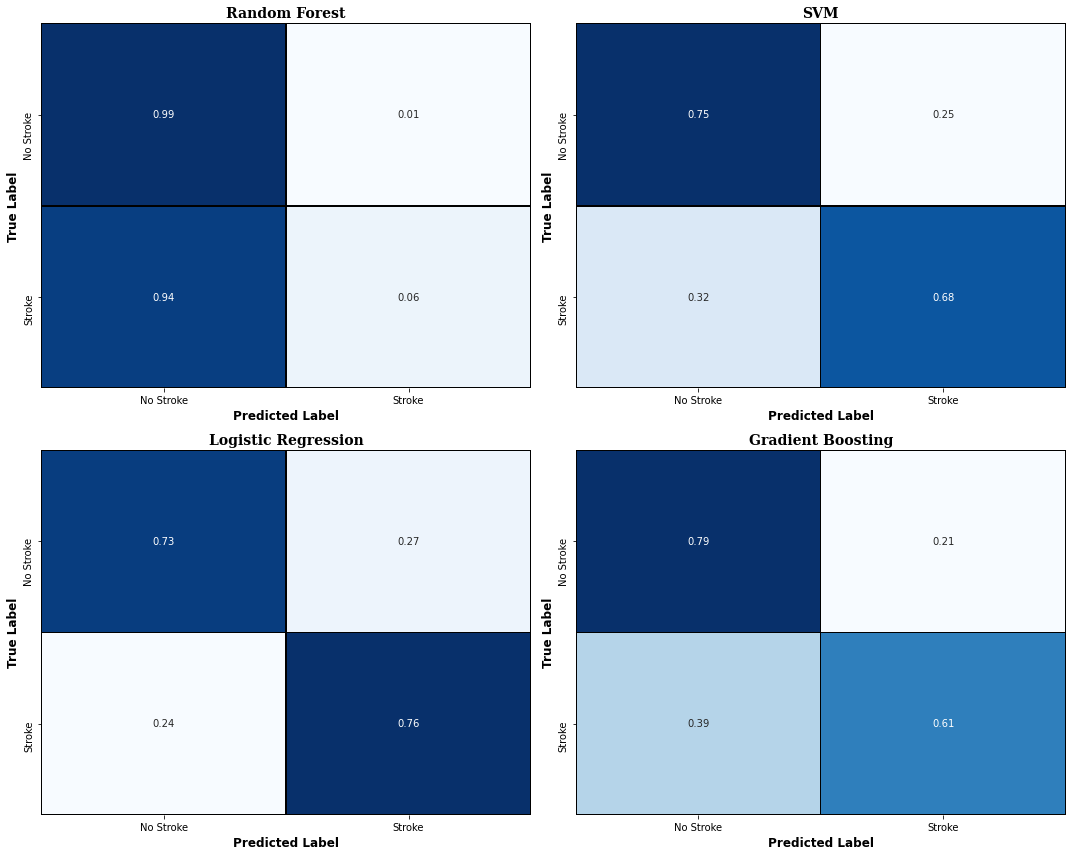

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit the models on the balanced training data
rf_pipeline.fit(X_train_balanced, y_train_balanced)
svm_pipeline.fit(X_train_balanced, y_train_balanced)
logreg_pipeline.fit(X_train_balanced, y_train_balanced)
gb_pipeline.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test set
rf_preds = rf_pipeline.predict(X_test)
svm_preds = svm_pipeline.predict(X_test)
logreg_preds = logreg_pipeline.predict(X_test)
gb_preds = gb_pipeline.predict(X_test)

# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
logreg_cm = confusion_matrix(y_test, logreg_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

# Normalize confusion matrices (row-wise normalization)
rf_cm_normalized = rf_cm.astype('float') / rf_cm.sum(axis=1)[:, np.newaxis]
svm_cm_normalized = svm_cm.astype('float') / svm_cm.sum(axis=1)[:, np.newaxis]
logreg_cm_normalized = logreg_cm.astype('float') / logreg_cm.sum(axis=1)[:, np.newaxis]
gb_cm_normalized = gb_cm.astype('float') / gb_cm.sum(axis=1)[:, np.newaxis]

# Create a figure to display the normalized confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Titles for the confusion matrices
titles = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']
cms = [rf_cm_normalized, svm_cm_normalized, logreg_cm_normalized, gb_cm_normalized]

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', ax=ax, cbar=False,
                linewidths=.5, linecolor='black')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif')
    ax.xaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)
    ax.yaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)

plt.tight_layout()
plt.show()


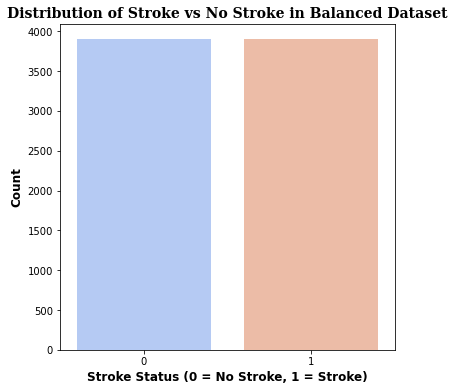

In [79]:
# Visualize the distribution of stroke vs no stroke in the dataset
stroke_distribution = y_train_balanced.value_counts()  # Assuming y_train_balanced has stroke labels

plt.figure(figsize=(6,6))
sns.barplot(x=stroke_distribution.index, y=stroke_distribution.values, palette='coolwarm')
plt.xlabel('Stroke Status (0 = No Stroke, 1 = Stroke)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Stroke vs No Stroke in Balanced Dataset', fontsize=14, fontweight='bold', fontfamily='serif')
plt.show()


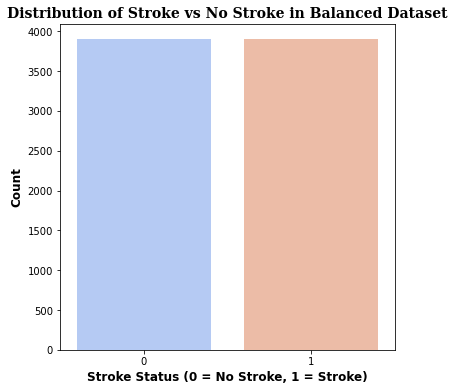

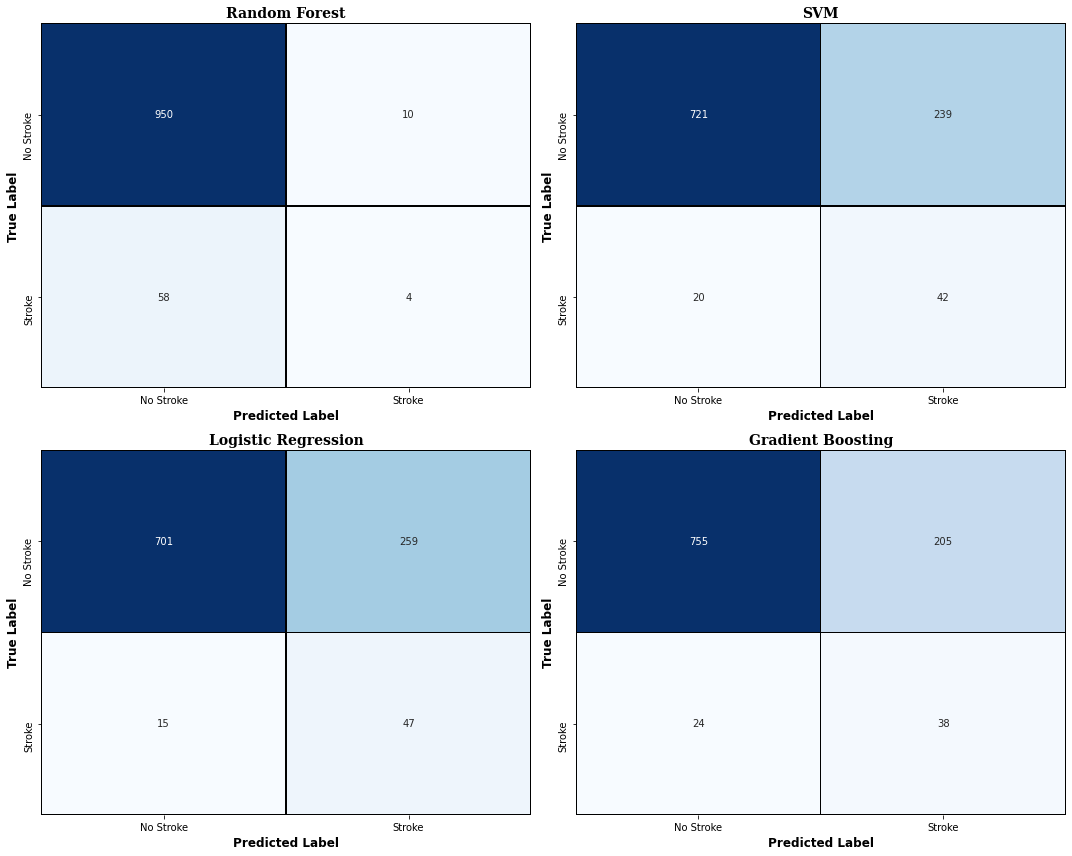

In [80]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit the models on the balanced training data
rf_pipeline.fit(X_train_balanced, y_train_balanced)
svm_pipeline.fit(X_train_balanced, y_train_balanced)
logreg_pipeline.fit(X_train_balanced, y_train_balanced)
gb_pipeline.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test set
rf_preds = rf_pipeline.predict(X_test)
svm_preds = svm_pipeline.predict(X_test)
logreg_preds = logreg_pipeline.predict(X_test)
gb_preds = gb_pipeline.predict(X_test)

# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
logreg_cm = confusion_matrix(y_test, logreg_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

# Plot the stroke vs no stroke distribution in the balanced dataset
stroke_distribution = y_train_balanced.value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=stroke_distribution.index, y=stroke_distribution.values, palette='coolwarm')
plt.xlabel('Stroke Status (0 = No Stroke, 1 = Stroke)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Stroke vs No Stroke in Balanced Dataset', fontsize=14, fontweight='bold', fontfamily='serif')
plt.show()

# Create a figure to display the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Titles for the confusion matrices
titles = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']
cms = [rf_cm, svm_cm, logreg_cm, gb_cm]

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, linewidths=.5, linecolor='black')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif')
    ax.xaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)
    ax.yaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)

plt.tight_layout()
plt.show()


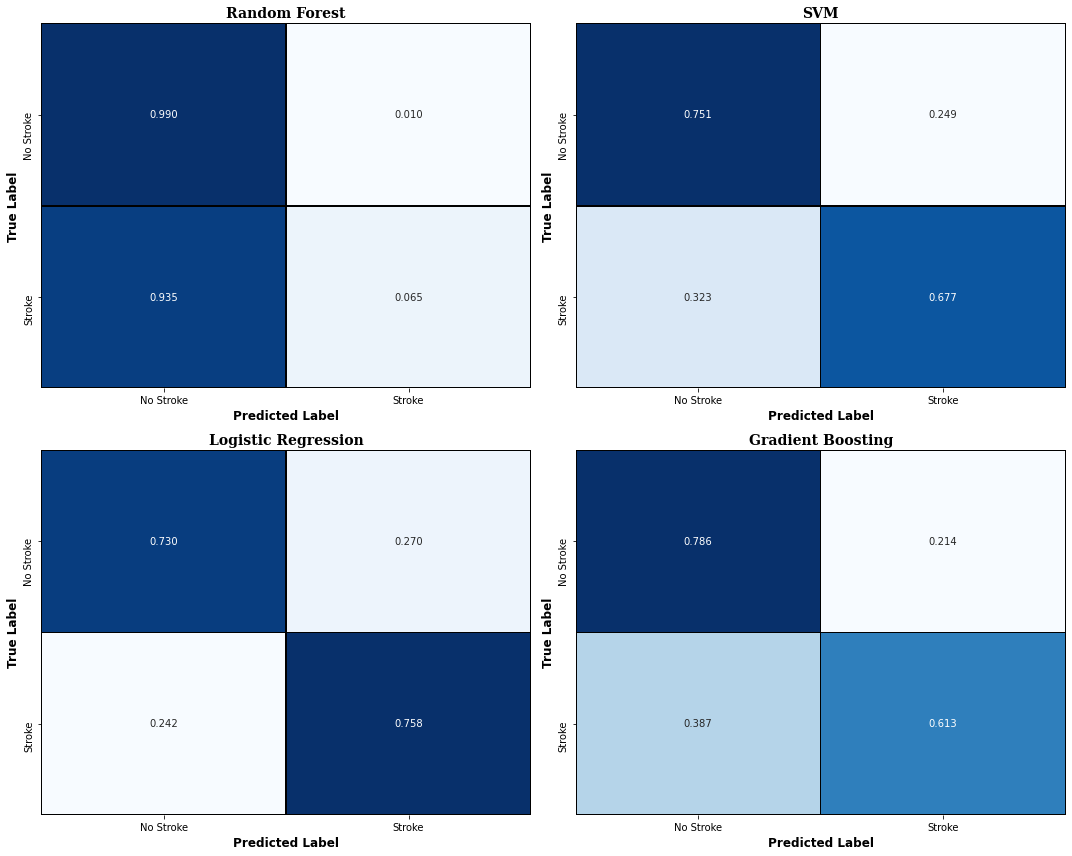

In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fit the models on the balanced training data
rf_pipeline.fit(X_train_balanced, y_train_balanced)
svm_pipeline.fit(X_train_balanced, y_train_balanced)
logreg_pipeline.fit(X_train_balanced, y_train_balanced)
gb_pipeline.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test set
rf_preds = rf_pipeline.predict(X_test)
svm_preds = svm_pipeline.predict(X_test)
logreg_preds = logreg_pipeline.predict(X_test)
gb_preds = gb_pipeline.predict(X_test)

# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
logreg_cm = confusion_matrix(y_test, logreg_preds)
gb_cm = confusion_matrix(y_test, gb_preds)

# Normalize the confusion matrices (convert to percentages or proportions)
rf_cm_normalized = rf_cm / rf_cm.sum(axis=1, keepdims=True)
svm_cm_normalized = svm_cm / svm_cm.sum(axis=1, keepdims=True)
logreg_cm_normalized = logreg_cm / logreg_cm.sum(axis=1, keepdims=True)
gb_cm_normalized = gb_cm / gb_cm.sum(axis=1, keepdims=True)

# Titles for the confusion matrices
titles = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']
cms_normalized = [rf_cm_normalized, svm_cm_normalized, logreg_cm_normalized, gb_cm_normalized]

# Create a figure to display the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, cm, title in zip(axes, cms_normalized, titles):
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', ax=ax,  # fmt='.3f' to display decimal values
                cbar=False, linewidths=.5, linecolor='black')
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif')
    ax.xaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)
    ax.yaxis.set_ticklabels(['No Stroke', 'Stroke'], fontsize=10)

plt.tight_layout()
plt.show()

In [101]:
############################ OTHER RESULTS VISUALIZATIONS #############################################

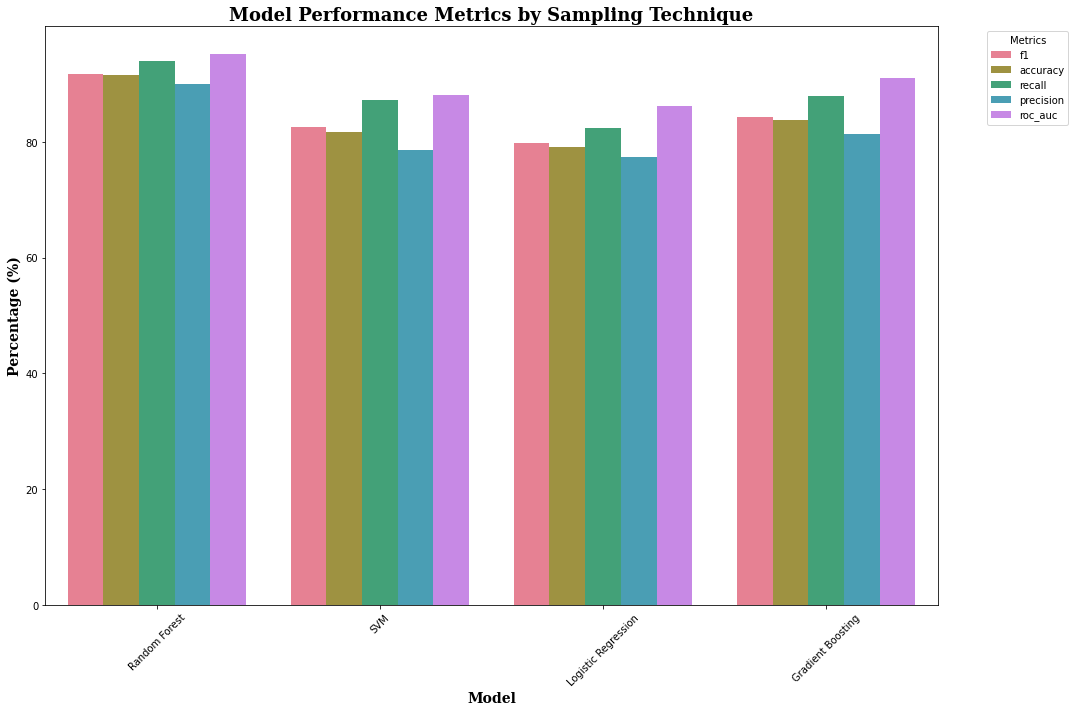

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define your results
results = {
    'SMOTE': {
        'Random Forest': {'f1': 93.59, 'accuracy': 93.51, 'recall': 95.51, 'precision': 91.87, 'roc_auc': 98.54},
        'SVM': {'f1': 83.95, 'accuracy': 83.28, 'recall': 87.74, 'precision': 80.58, 'roc_auc': 90.48},
        'Logistic Regression': {'f1': 80.33, 'accuracy': 79.74, 'recall': 82.87, 'precision': 78.02, 'roc_auc': 88.18},
        'Gradient Boosting': {'f1': 86.50, 'accuracy': 86.22, 'recall': 88.90, 'precision': 84.40, 'roc_auc': 93.84}
    },
    'SMOTETomek': {
        'Random Forest': {'f1': 93.76, 'accuracy': 93.68, 'recall': 95.76, 'precision': 91.98, 'roc_auc': 98.71},
        'SVM': {'f1': 84.49, 'accuracy': 83.84, 'recall': 88.31, 'precision': 81.09, 'roc_auc': 90.93},
        'Logistic Regression': {'f1': 80.62, 'accuracy': 80.05, 'recall': 83.07, 'precision': 78.37, 'roc_auc': 88.59},
        'Gradient Boosting': {'f1': 86.69, 'accuracy': 86.33, 'recall': 89.56, 'precision': 84.14, 'roc_auc': 94.08}
    },
    'Random Under-Sampling': {
        'Random Forest': {'f1': 80.51, 'accuracy': 79.72, 'recall': 84.44, 'precision': 77.99, 'roc_auc': 83.43},
        'SVM': {'f1': 79.82, 'accuracy': 78.09, 'recall': 86.61, 'precision': 74.19, 'roc_auc': 83.16},
        'Logistic Regression': {'f1': 80.02, 'accuracy': 79.41, 'recall': 82.89, 'precision': 77.81, 'roc_auc': 83.48},
        'Gradient Boosting': {'f1': 76.67, 'accuracy': 75.93, 'recall': 80.15, 'precision': 74.48, 'roc_auc': 82.71}
    },
    'Random Over-Sampling': {
        'Random Forest': {'f1': 99.20, 'accuracy': 99.19, 'recall': 100.00, 'precision': 98.41, 'roc_auc': 100.00},
        'SVM': {'f1': 82.22, 'accuracy': 81.35, 'recall': 86.28, 'precision': 78.55, 'roc_auc': 87.72},
        'Logistic Regression': {'f1': 77.99, 'accuracy': 77.17, 'recall': 80.92, 'precision': 75.28, 'roc_auc': 84.33},
        'Gradient Boosting': {'f1': 87.26, 'accuracy': 86.40, 'recall': 93.23, 'precision': 82.04, 'roc_auc': 93.42}
    }
}

# Convert to DataFrame for easier plotting
data = []
for sampling, models in results.items():
    for model, metrics in models.items():
        for metric, value in metrics.items():
            data.append({'Sampling': sampling, 'Model': model, 'Metric': metric, 'Value': value})

df = pd.DataFrame(data)

# Define a color palette
palette = sns.color_palette("husl", 5)

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Model', y='Value', hue='Metric', ci=None, palette=palette)

# Add titles and labels
plt.title('Model Performance Metrics by Sampling Technique', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xlabel('Model', fontsize=14, fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontfamily='serif', fontweight='bold')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

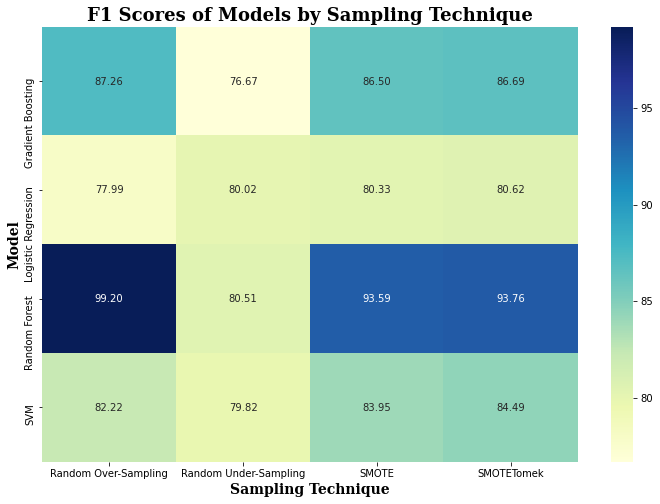

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the results to a DataFrame suitable for a heatmap
heatmap_data = []
for sampling, models in results.items():
    for model, metrics in models.items():
        row = {'Sampling': sampling, 'Model': model}
        row.update(metrics)
        heatmap_data.append(row)

df_heatmap = pd.DataFrame(heatmap_data)

# Pivot the DataFrame for heatmap plotting
df_heatmap = df_heatmap.pivot("Model", "Sampling", "f1")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".2f")

# Add titles and labels
plt.title('F1 Scores of Models by Sampling Technique', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xlabel('Sampling Technique', fontsize=14, fontfamily='serif', fontweight='bold')
plt.ylabel('Model', fontsize=14, fontfamily='serif', fontweight='bold')

plt.show()


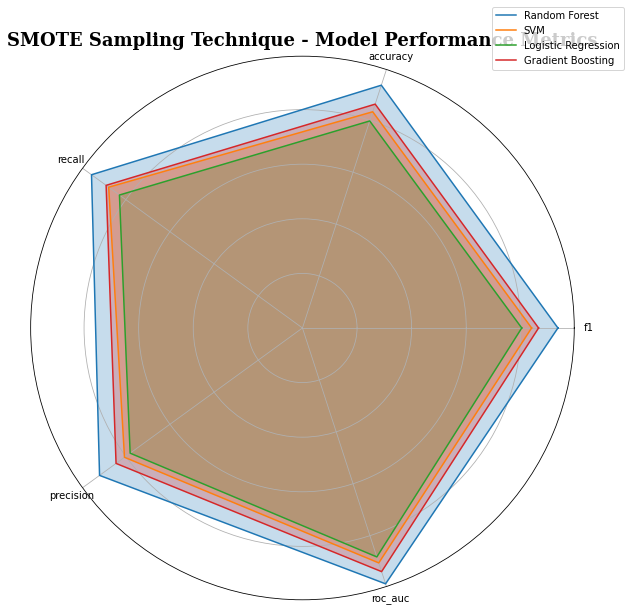

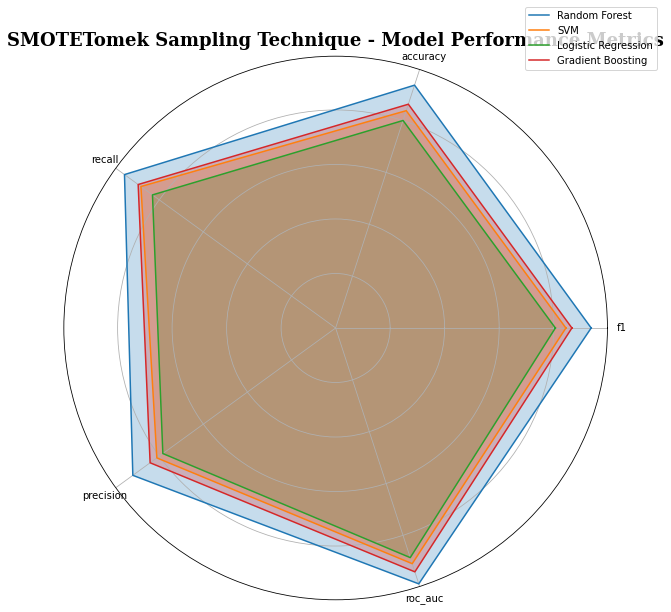

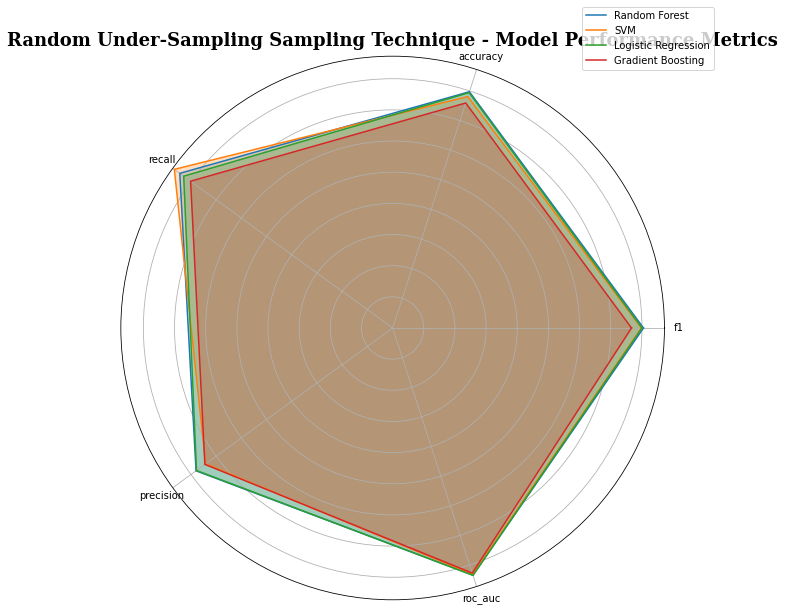

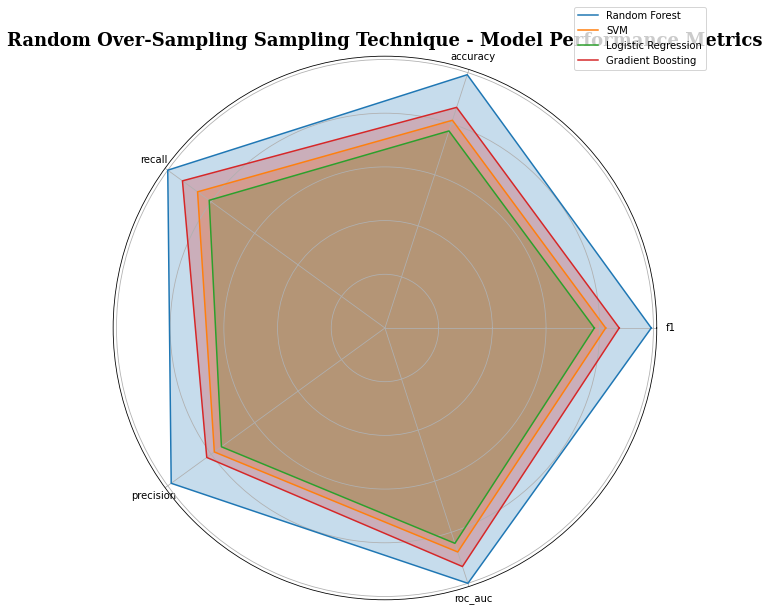

In [104]:
from math import pi

# Create a function to plot radar charts
def plot_radar_chart(metrics_data, sampling):
    categories = list(metrics_data[0].keys())[1:]
    num_vars = len(categories)

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for data in metrics_data:
        values = list(data.values())[1:]
        values += values[:1]
        ax.plot(angles, values, label=data['Model'])
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.title(f'{sampling} Sampling Technique - Model Performance Metrics', fontsize=18, fontfamily='serif', fontweight='bold')
    plt.show()

# Prepare data for radar charts
for sampling, models in results.items():
    metrics_data = []
    for model, metrics in models.items():
        data = {'Model': model}
        data.update(metrics)
        metrics_data.append(data)
    plot_radar_chart(metrics_data, sampling)


<Figure size 1080x720 with 0 Axes>

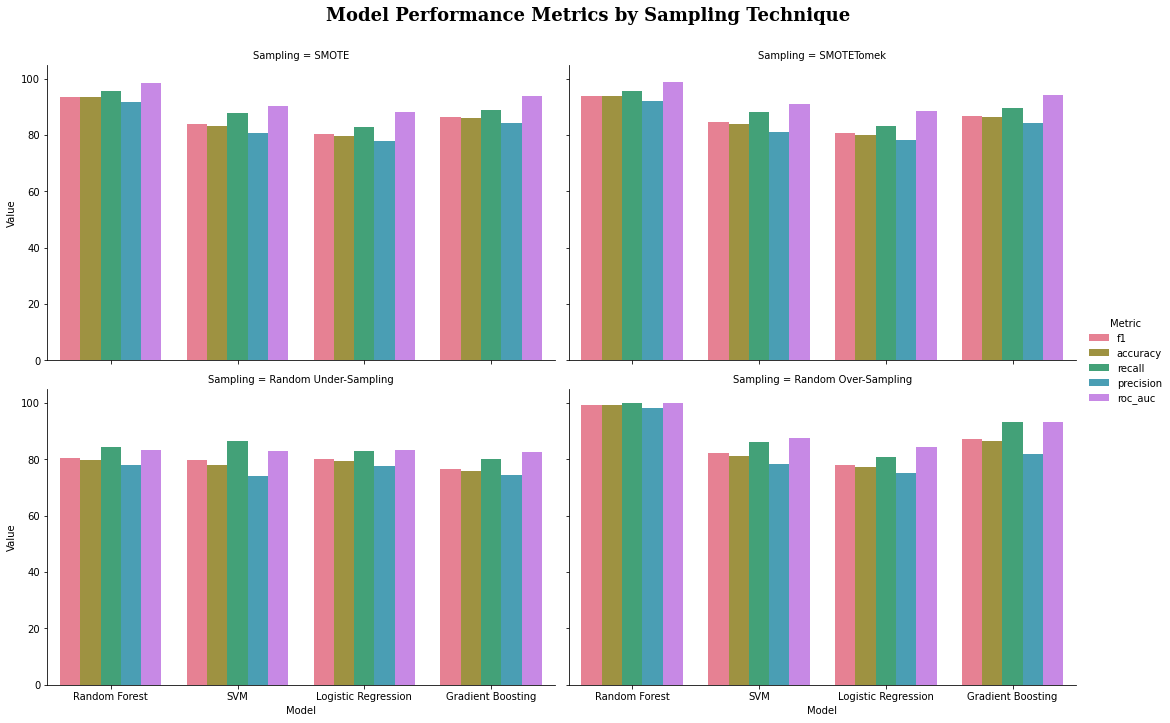

In [160]:
# Create a grouped bar plot
plt.figure(figsize=(15, 10))
sns.catplot(
    data=df, kind='bar',
    x='Model', y='Value', hue='Metric',
    col='Sampling', col_wrap=2,
    height=5, aspect=1.5, palette=palette
)

# Add titles and labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Model Performance Metrics by Sampling Technique', fontsize=18, fontfamily='serif', fontweight='bold')
plt.show()


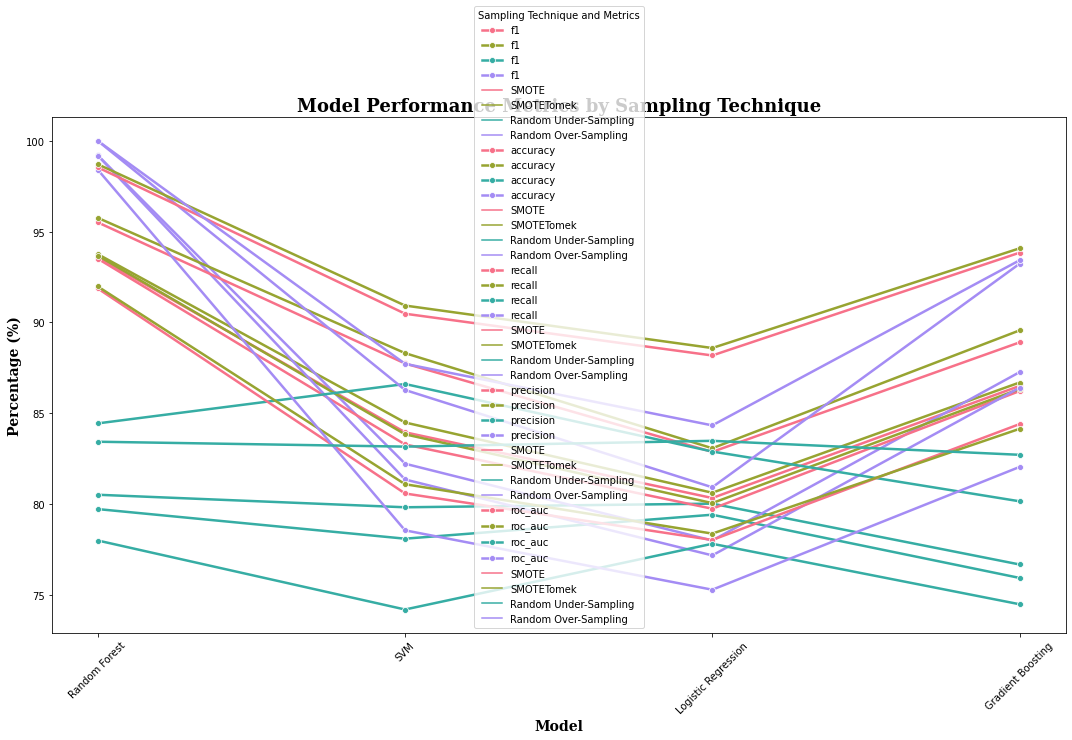

In [162]:
# Define color palette
palette = sns.color_palette("husl", len(df['Sampling'].unique()))

plt.figure(figsize=(15, 10))

# Loop through each metric and plot
for metric in df['Metric'].unique():
    sns.lineplot(
        data=df[df['Metric'] == metric],
        x='Model', y='Value', hue='Sampling', marker='o', linewidth=2.5, palette=palette, label=metric
    )

# Add titles and labels
plt.title('Model Performance Metrics by Sampling Technique', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xlabel('Model', fontsize=14, fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontfamily='serif', fontweight='bold')
plt.legend(title='Sampling Technique and Metrics')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [163]:
import pandas as pd

# Define the data for the table
data = {
    'Metric': ['f1', 'accuracy', 'recall', 'precision', 'roc_auc'] * 4,
    'Sampling Technique': ['SMOTE'] * 5 + ['SMOTETomek'] * 5 + ['Random Under Sampling'] * 5 + ['Random Over Sampling'] * 5,
    'Random Forest': [
        '93.59%', '93.51%', '95.51%', '91.87%', '98.54%',
        '93.76%', '93.68%', '95.76%', '91.98%', '98.71%',
        '80.51%', '79.72%', '84.44%', '77.99%', '83.43%',
        '99.20%', '99.19%', '100.00%', '98.41%', '100.00%'
    ],
    'SVM': [
        '83.95%', '83.28%', '87.74%', '80.58%', '90.48%',
        '84.49%', '83.84%', '88.31%', '81.09%', '90.93%',
        '79.82%', '78.09%', '86.61%', '74.19%', '83.16%',
        '82.22%', '81.35%', '86.28%', '78.55%', '87.72%'
    ],
    'Logistic Regression': [
        '80.33%', '79.74%', '82.87%', '78.02%', '88.18%',
        '80.62%', '80.05%', '83.07%', '78.37%', '88.59%',
        '80.02%', '79.41%', '82.89%', '77.81%', '83.48%',
        '77.99%', '77.17%', '80.92%', '75.28%', '84.33%'
    ],
    'Gradient Boosting': [
        '86.50%', '86.22%', '88.90%', '84.40%', '93.84%',
        '86.69%', '86.33%', '89.56%', '84.14%', '94.08%',
        '76.67%', '75.93%', '80.15%', '74.48%', '82.71%',
        '87.26%', '86.40%', '93.23%', '82.04%', '93.42%'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


       Metric     Sampling Technique Random Forest     SVM  \
0          f1                  SMOTE        93.59%  83.95%   
1    accuracy                  SMOTE        93.51%  83.28%   
2      recall                  SMOTE        95.51%  87.74%   
3   precision                  SMOTE        91.87%  80.58%   
4     roc_auc                  SMOTE        98.54%  90.48%   
5          f1             SMOTETomek        93.76%  84.49%   
6    accuracy             SMOTETomek        93.68%  83.84%   
7      recall             SMOTETomek        95.76%  88.31%   
8   precision             SMOTETomek        91.98%  81.09%   
9     roc_auc             SMOTETomek        98.71%  90.93%   
10         f1  Random Under Sampling        80.51%  79.82%   
11   accuracy  Random Under Sampling        79.72%  78.09%   
12     recall  Random Under Sampling        84.44%  86.61%   
13  precision  Random Under Sampling        77.99%  74.19%   
14    roc_auc  Random Under Sampling        83.43%  83.16%   
15      

In [164]:
df.head(20)

Metric     Sampling Technique Random Forest     SVM  \
0          f1                  SMOTE        93.59%  83.95%   
1    accuracy                  SMOTE        93.51%  83.28%   
2      recall                  SMOTE        95.51%  87.74%   
3   precision                  SMOTE        91.87%  80.58%   
4     roc_auc                  SMOTE        98.54%  90.48%   
5          f1             SMOTETomek        93.76%  84.49%   
6    accuracy             SMOTETomek        93.68%  83.84%   
7      recall             SMOTETomek        95.76%  88.31%   
8   precision             SMOTETomek        91.98%  81.09%   
9     roc_auc             SMOTETomek        98.71%  90.93%   
10         f1  Random Under Sampling        80.51%  79.82%   
11   accuracy  Random Under Sampling        79.72%  78.09%   
12     recall  Random Under Sampling        84.44%  86.61%   
13  precision  Random Under Sampling        77.99%  74.19%   
14    roc_auc  Random Under Sampling        83.43%  83.16%   
15         f1   Random Over Sampling        99.20%  82.22%   
16   accuracy   Random Over Sampling        99.19%  81.35%   
17     recall   Random Over Sampling       100.00%  86.28%   
18  precision   Random Over Sampling        98.41%  78.55%   
19    roc_auc   Random Over Sampling       100.00%  87.72%   

   Logistic Regression Gradient Boosting  
0               80.33%            86.50%  
1               79.74%            86.22%  
2               82.87%            88.90%  
3               78.02%            84.40%  
4               88.18%            93.84%  
5               80.62%            86.69%  
6               80.05%            86.33%  
7               83.07%            89.56%  
8               78.37%            84.14%  
9               88.59%            94.08%  
10              80.02%            76.67%  
11              79.41%            75.93%  
12              82.89%            80.15%  
13              77.81%            74.48%  
14              83.48%            82.71%  
15              77.99%            87.26%  
16              77.17%            86.40%  
17              80.92%            93.23%  
18              75.28%            82.04%  
19              84.33%            93.42%

In [105]:
# Create a line plot
plt.figure(figsize=(15, 10))

# Loop through each metric and plot
for metric in df['Metric'].unique():
    sns.lineplot(
        data=df[df['Metric'] == metric],
        x='Model', y='Value', hue='Sampling', marker='o', linewidth=2.5, palette=palette, label=metric
    )

# Add titles and labels
plt.title('Model Performance Metrics by Sampling Technique', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xlabel('Model', fontsize=14, fontfamily='serif', fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontfamily='serif', fontweight='bold')
plt.legend(title='Sampling Technique and Metrics')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

ValueError: The palette list has the wrong number of colors.

<Figure size 1080x720 with 0 Axes>

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_smote, df_smote_tomek, df_under, df_over are already created DataFrames

# Add a column to identify the sampling technique
df_smote['Sampling Technique'] = 'SMOTE'
df_smote_tomek['Sampling Technique'] = 'SMOTETomek'
df_under['Sampling Technique'] = 'Random Under-Sampling'
df_over['Sampling Technique'] = 'Random Over-Sampling'

# Combine all DataFrames
df_combined = pd.concat([df_smote, df_smote_tomek, df_under, df_over])
df_combined.reset_index(inplace=True, drop=True)
df_combined = df_combined.melt(id_vars=['Sampling Technique'], var_name='Model', value_name='Score')

# Split the metric name and model name
df_combined[['Metric', 'Model']] = df_combined['Model'].str.rsplit('_', 1, expand=True)

# Pivot to get the DataFrame in a suitable format for plotting
df_pivot = df_combined.pivot_table(index=['Metric', 'Model'], columns='Sampling Technique', values='Score').reset_index()
df_pivot = df_pivot[['Metric', 'Model', 'SMOTE', 'SMOTETomek', 'Random Under-Sampling', 'Random Over-Sampling']]

# Convert scores to percentages for better visualization
df_pivot[['SMOTE', 'SMOTETomek', 'Random Under-Sampling', 'Random Over-Sampling']] *= 100


NameError: name 'df_smote' is not defined

KeyError: 'f1'

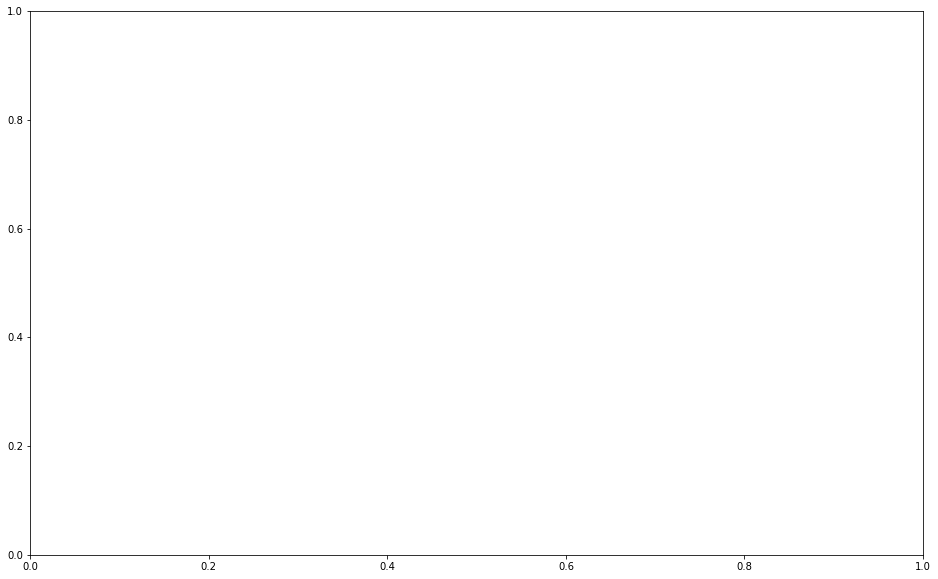

In [145]:
# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_smote.loc[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

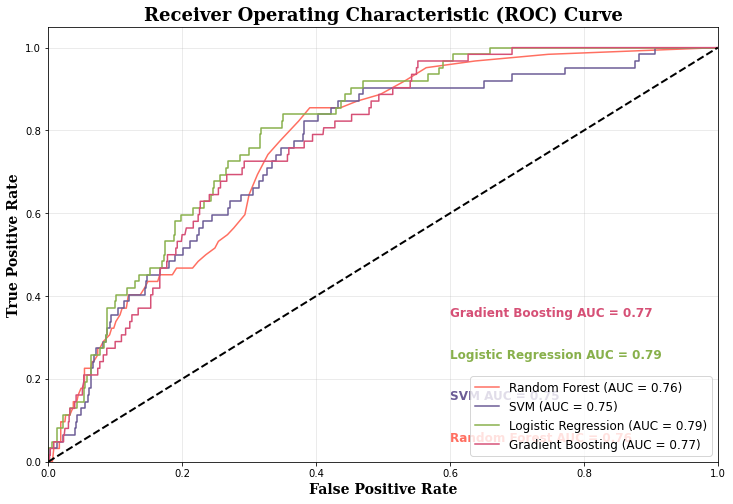

In [143]:
# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

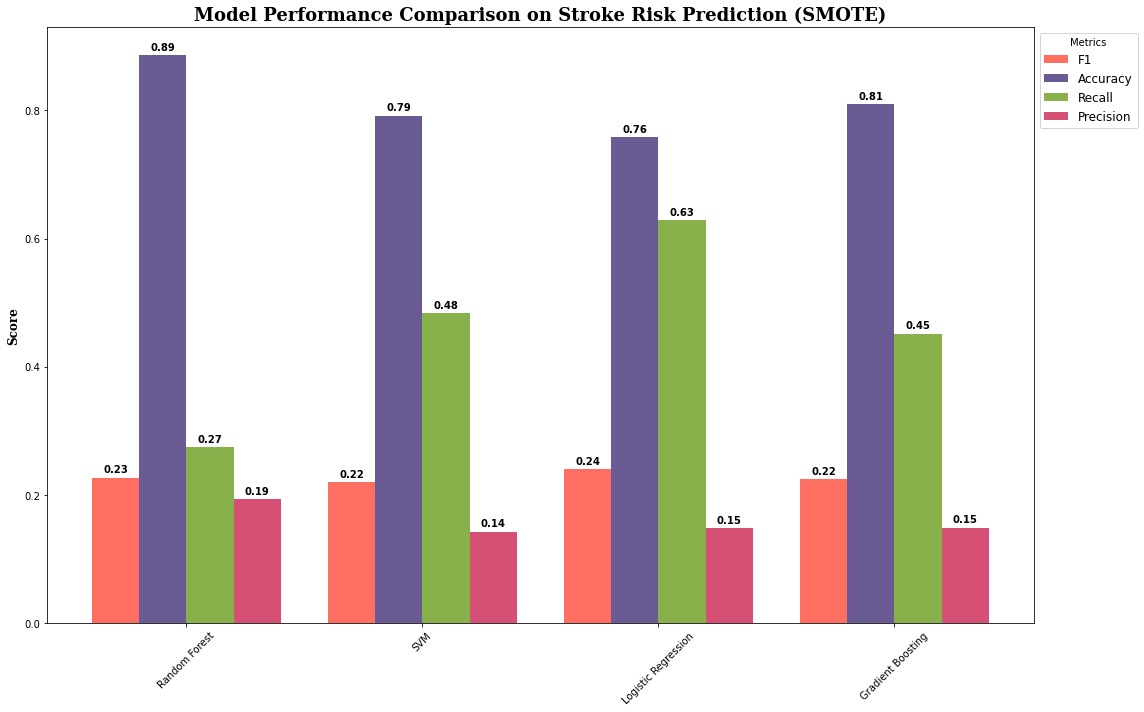

In [144]:
# Compute other metrics
results = {}
models = ["Random Forest", "SVM", "Logistic Regression", "Gradient Boosting"]
probabilities = [rf_probs, svm_probs, logreg_probs, gb_probs]

for i, (name, probs) in enumerate(zip(models, probabilities)):
    y_pred = (probs >= 0.5).astype(int)
    results[name] = {
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }

# Create a DataFrame for visualization
df_models_smote = pd.DataFrame(results).T

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_smote[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Risk Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               93.59%  83.95%              80.33%            86.50%
accuracy         93.51%  83.28%              79.74%            86.22%
recall           95.51%  87.74%              82.87%            88.90%
precision        91.87%  80.58%              78.02%            84.40%
roc_auc          98.54%  90.48%              88.18%            93.84%


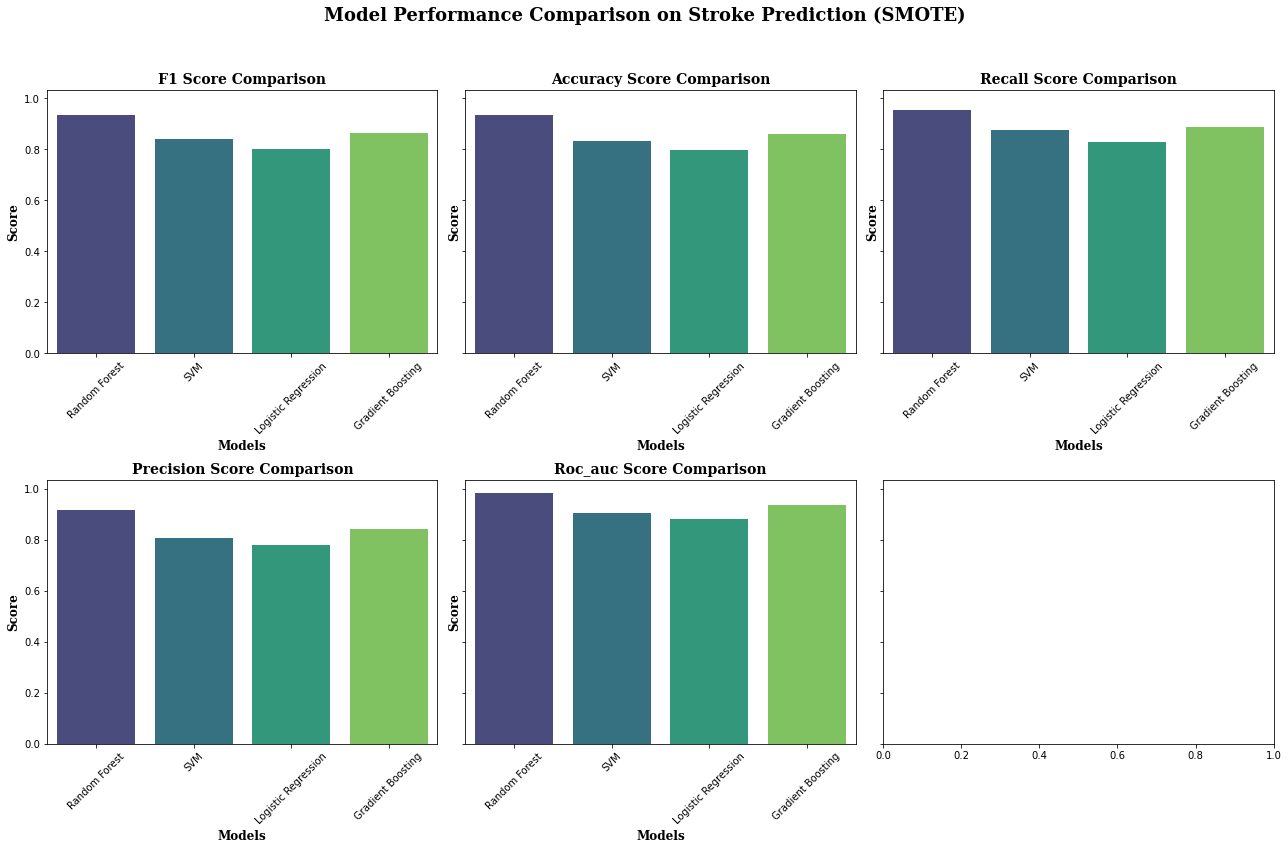

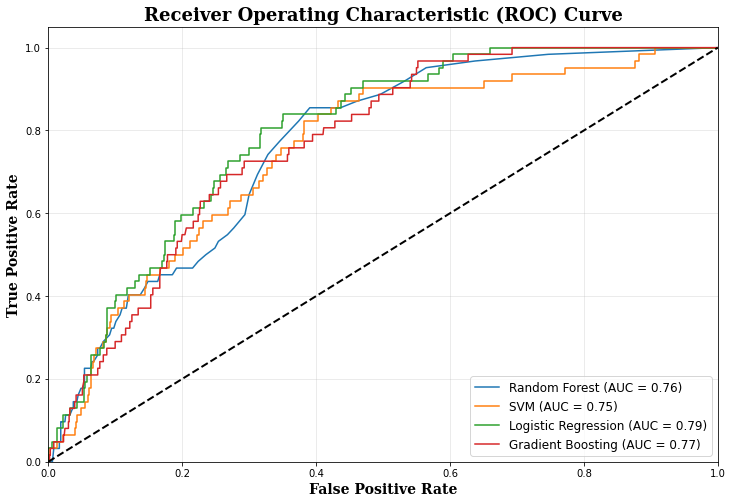

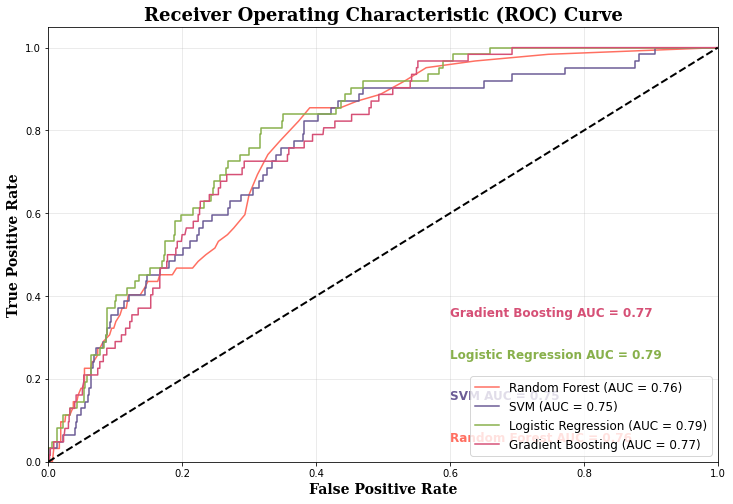

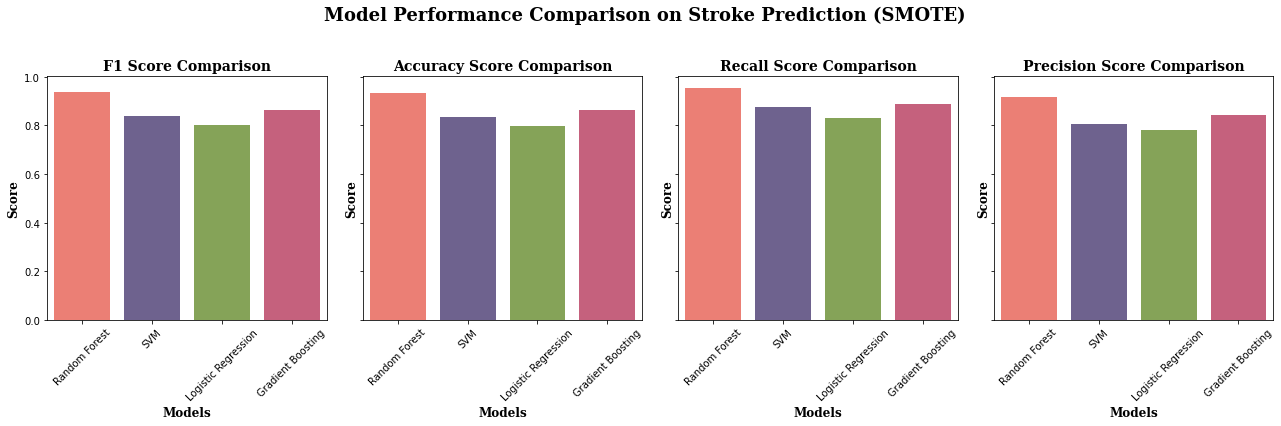

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Oversampling with SMOTE
oversample = SMOTE(random_state=42)
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_display = df_models_smote.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_display)

# Plotting bar plots
metrics = df_models_smote.index
models = df_models_smote.columns

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x=df_models_smote.columns, y=df_models_smote.loc[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} Score Comparison', fontsize=14, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Models', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

fig.suptitle('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Fit the models on the SMOTE-balanced dataset
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plotting ROC AUC Curves with annotations
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), sharey=True)

for i, metric in enumerate(metrics):
    sns.barplot(x=df_models_smote.columns, y=df_models_smote.loc[metric], ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric.capitalize()} Score Comparison', fontsize=14, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Models', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

fig.suptitle('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               93.59%  83.95%              80.33%            86.50%
accuracy         93.51%  83.28%              79.74%            86.22%
recall           95.51%  87.74%              82.87%            88.90%
precision        91.87%  80.58%              78.02%            84.40%
roc_auc          98.54%  90.48%              88.18%            93.84%


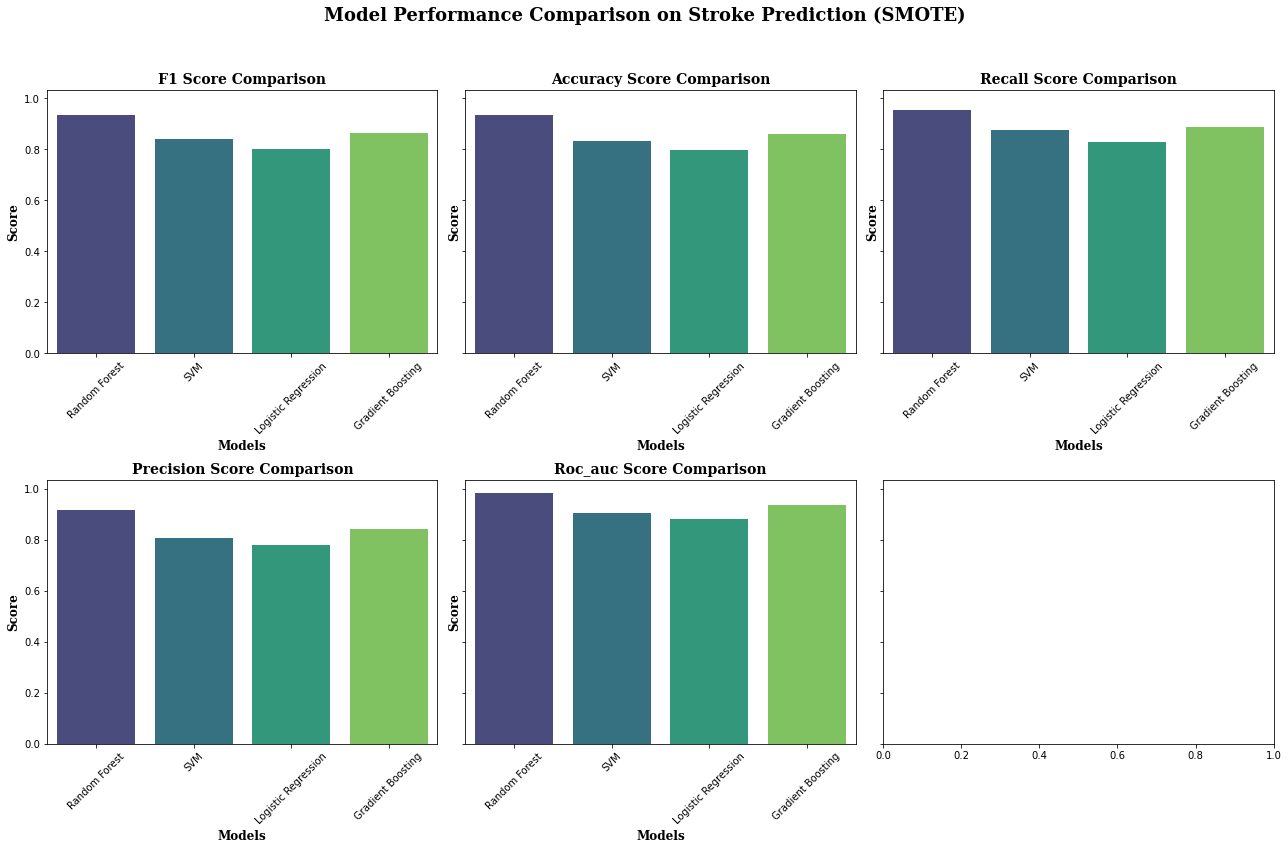

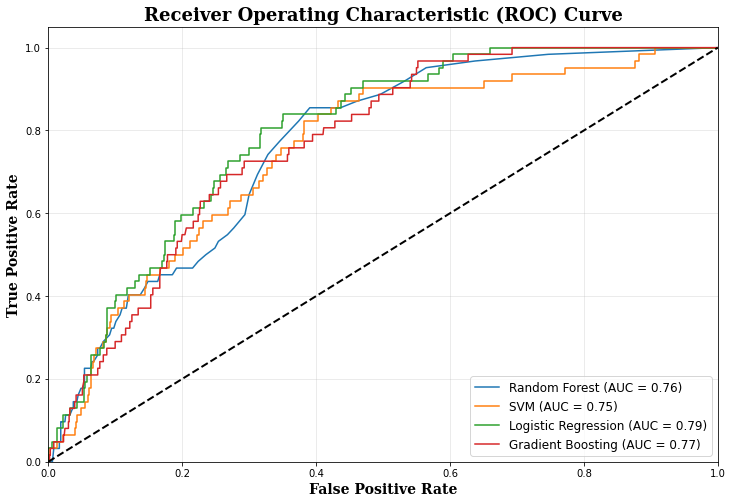

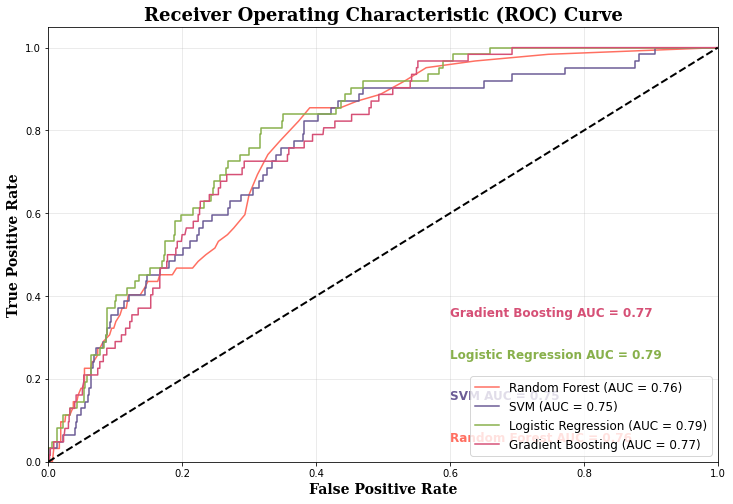

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Oversampling with SMOTE
oversample = SMOTE(random_state=42)
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_display = df_models_smote.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_display)

# Plotting bar plots
metrics = df_models_smote.index
models = df_models_smote.columns

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x=df_models_smote.columns, y=df_models_smote.loc[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} Score Comparison', fontsize=14, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Models', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

fig.suptitle('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


from sklearn.metrics import roc_curve, auc

# Fit the models
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()
# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']

In [65]:
######MODels#####

In [66]:
# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

In [67]:
# Perform cross-validation
rf_cv = cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
svm_cv = cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
gb_cv = cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')

In [68]:
# Print results
print(f"Random Forest CV F1 Score: {rf_cv.mean():.4f} ± {rf_cv.std():.4f}")
print(f"SVM CV F1 Score: {svm_cv.mean():.4f} ± {svm_cv.std():.4f}")
print(f"Logistic Regression CV F1 Score: {logreg_cv.mean():.4f} ± {logreg_cv.std():.4f}")
print(f"Gradient Boosting CV F1 Score: {gb_cv.mean():.4f} ± {gb_cv.std():.4f}")

Random Forest CV F1 Score: 0.9547 ± 0.0253
SVM CV F1 Score: 0.9013 ± 0.0345
Logistic Regression CV F1 Score: 0.8368 ± 0.0363
Gradient Boosting CV F1 Score: 0.9197 ± 0.0304


In [69]:
# Print mean F1 scores
print('Mean F1 scores:')
print('Random Forest mean :', cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1').mean())
print('SVM mean :', cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1').mean())
print('Logistic Regression mean :', cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1').mean())
print('Gradient Boosting mean :', cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1').mean())

Mean F1 scores:
Random Forest mean : 0.9546663605540229
SVM mean : 0.9013030887613536
Logistic Regression mean : 0.8367707518197529
Gradient Boosting mean : 0.9196909891099889


In [61]:
############2. Random Under-Sampling: 

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Define Random Under-Sampling
under_sampler = RandomUnderSampler(random_state=42)

# Define pipelines for different classifiers with Random Under-Sampling
under_sampling_rf_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
under_sampling_svm_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('SVM', SVC(random_state=42))])
under_sampling_logreg_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
under_sampling_gb_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Perform cross-validation
under_sampling_rf_cv = cross_val_score(under_sampling_rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
under_sampling_svm_cv = cross_val_score(under_sampling_svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
under_sampling_logreg_cv = cross_val_score(under_sampling_logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
under_sampling_gb_cv = cross_val_score(under_sampling_gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')

# Print mean F1 scores
print('Random Under-Sampling with Random Forest mean F1 score:', under_sampling_rf_cv.mean())
print('Random Under-Sampling with SVM mean F1 score:', under_sampling_svm_cv.mean())
print('Random Under-Sampling with Logistic Regression mean F1 score:', under_sampling_logreg_cv.mean())
print('Random Under-Sampling with Gradient Boosting mean F1 score:', under_sampling_gb_cv.mean())


Random Under-Sampling with Random Forest mean F1 score: 0.9370851575851414
Random Under-Sampling with SVM mean F1 score: 0.8864844033107699
Random Under-Sampling with Logistic Regression mean F1 score: 0.8361480551673874
Random Under-Sampling with Gradient Boosting mean F1 score: 0.9056942704327355


In [63]:
####3.Random Over-Sampling:Increases the number of minority class samples by duplicating them.

In [64]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Define Random Over-Sampling
over_sampler = RandomOverSampler(random_state=42)

# Define pipelines for different classifiers with Random Over-Sampling
over_sampling_rf_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
over_sampling_svm_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('SVM', SVC(random_state=42))])
over_sampling_logreg_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
over_sampling_gb_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Perform cross-validation
over_sampling_rf_cv = cross_val_score(over_sampling_rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
over_sampling_svm_cv = cross_val_score(over_sampling_svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
over_sampling_logreg_cv = cross_val_score(over_sampling_logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
over_sampling_gb_cv = cross_val_score(over_sampling_gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')

# Print mean F1 scores
print('Random Over-Sampling with Random Forest mean F1 score:', over_sampling_rf_cv.mean())
print('Random Over-Sampling with SVM mean F1 score:', over_sampling_svm_cv.mean())
print('Random Over-Sampling with Logistic Regression mean F1 score:', over_sampling_logreg_cv.mean())
print('Random Over-Sampling with Gradient Boosting mean F1 score:', over_sampling_gb_cv.mean())


Random Over-Sampling with Random Forest mean F1 score: 0.9363888002998675
Random Over-Sampling with SVM mean F1 score: 0.8864844033107699
Random Over-Sampling with Logistic Regression mean F1 score: 0.8364212447609655
Random Over-Sampling with Gradient Boosting mean F1 score: 0.9053328950172304


In [65]:
###### 4 SMOTETOMEK 

In [66]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Define SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Define pipelines for different classifiers with SMOTETomek
smote_tomek_rf_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
smote_tomek_svm_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('SVM', SVC(random_state=42))])
smote_tomek_logreg_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
smote_tomek_gb_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Perform cross-validation
smote_tomek_rf_cv = cross_val_score(smote_tomek_rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
smote_tomek_svm_cv = cross_val_score(smote_tomek_svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
smote_tomek_logreg_cv = cross_val_score(smote_tomek_logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')
smote_tomek_gb_cv = cross_val_score(smote_tomek_gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring='f1')

# Print mean F1 scores
print('SMOTETomek with Random Forest mean F1 score:', smote_tomek_rf_cv.mean())
print('SMOTETomek with SVM mean F1 score:', smote_tomek_svm_cv.mean())
print('SMOTETomek with Logistic Regression mean F1 score:', smote_tomek_logreg_cv.mean())
print('SMOTETomek with Gradient Boosting mean F1 score:', smote_tomek_gb_cv.mean())


SMOTETomek with Random Forest mean F1 score: 0.9366684338489982
SMOTETomek with SVM mean F1 score: 0.886738876117457
SMOTETomek with Logistic Regression mean F1 score: 0.8359159436891463
SMOTETomek with Gradient Boosting mean F1 score: 0.9029265717010148


In [70]:
################ LET US COMPARISONS FOR EACH MODEL PER DATA BALANCING TECHNIQUE

In [71]:
########### 1. SMOTE

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               94.13%  88.49%              82.38%            89.93%
accuracy         94.06%  87.88%              81.80%            89.60%
recall           96.16%  93.89%              85.31%            93.48%
precision        92.32%  83.77%              79.75%            86.78%
roc_auc          98.60%  93.60%              89.92%            96.23%


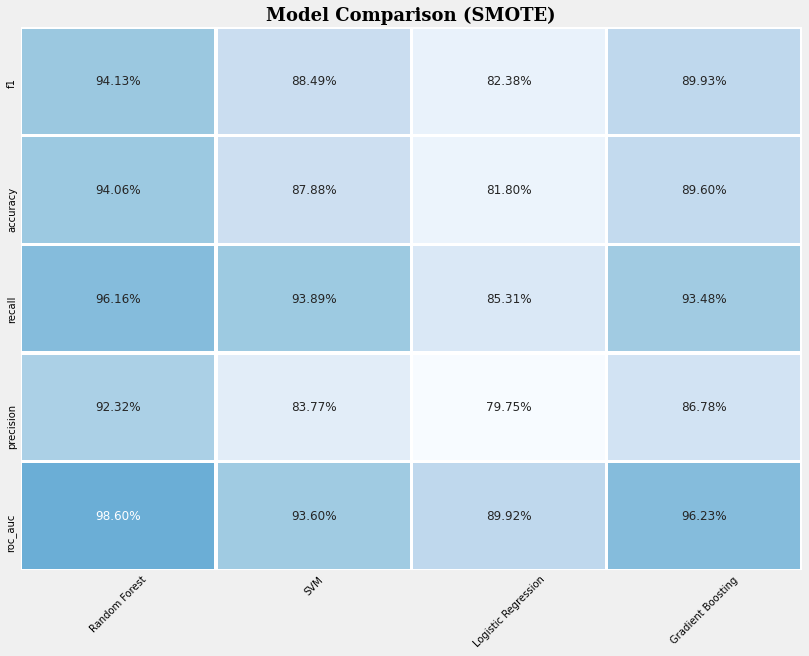

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Oversampling with SMOTE
oversample = SMOTE(random_state=42)
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_display = df_models_smote.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_display)

# Plotting
import matplotlib
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#f0f0f0"

fig, ax = plt.subplots(figsize=(14, 10))  # create figure

sns.heatmap(df_models_smote, cmap=colormap, annot=df_models_smote_display, fmt="", linewidths=2.5, cbar=False, ax=ax, annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color)  # figure background color
ax.set_facecolor(background_color)

ax.set_title('Model Comparison (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif', ha='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.xticks(rotation=45)
plt.show()


          Random Forest     SVM Logistic Regression Gradient Boosting
f1               94.13%  88.49%              82.38%            89.93%
accuracy         94.06%  87.88%              81.80%            89.60%
recall           96.16%  93.89%              85.31%            93.48%
precision        92.32%  83.77%              79.75%            86.78%
roc_auc          98.60%  93.60%              89.92%            96.23%


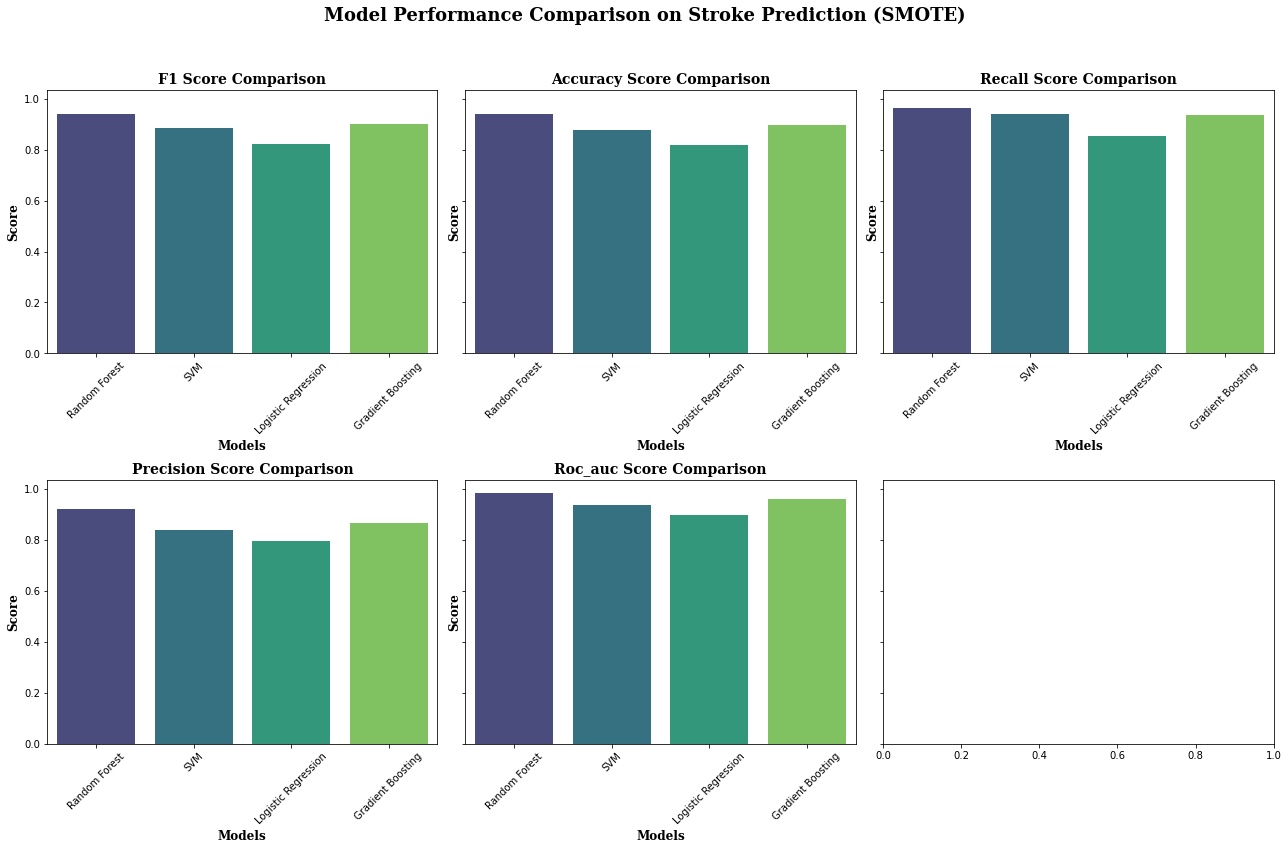

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Oversampling with SMOTE
oversample = SMOTE(random_state=42)
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# Initialize models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
logreg = LogisticRegression(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create pipelines
rf_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('RF', rf)])
svm_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('SVM', svm)])
logreg_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('LR', logreg)])
gb_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('GB', gb)])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
rf_cv_scores = {metric: cross_val_score(rf_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
svm_cv_scores = {metric: cross_val_score(svm_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
logreg_cv_scores = {metric: cross_val_score(logreg_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}
gb_cv_scores = {metric: cross_val_score(gb_pipeline, X_train_resh, y_train_resh, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_display = df_models_smote.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_display)

# Plotting bar plots
metrics = df_models_smote.index
models = df_models_smote.columns

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x=df_models_smote.columns, y=df_models_smote.loc[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} Score Comparison', fontsize=14, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Models', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

fig.suptitle('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


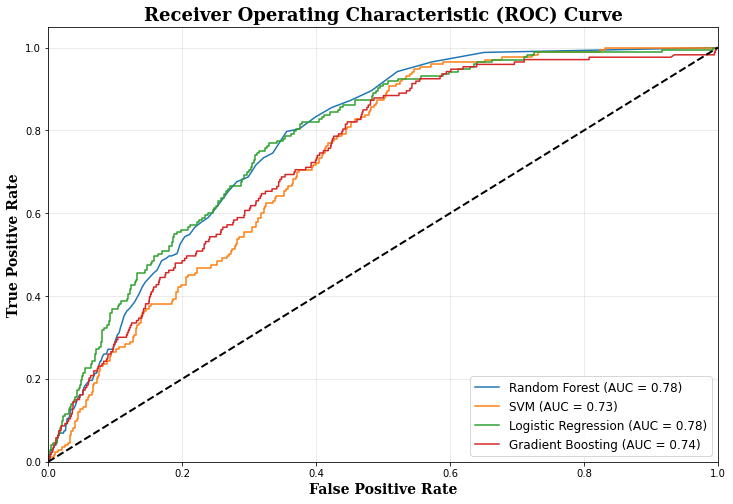

In [74]:
from sklearn.metrics import roc_curve, auc

# Fit the models
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

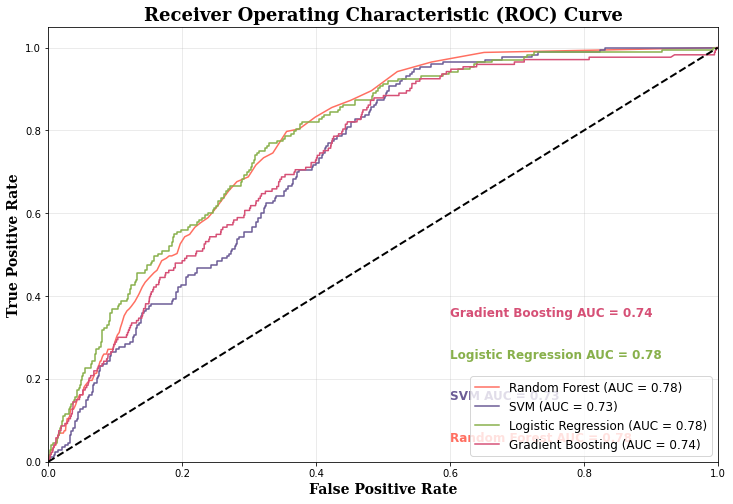

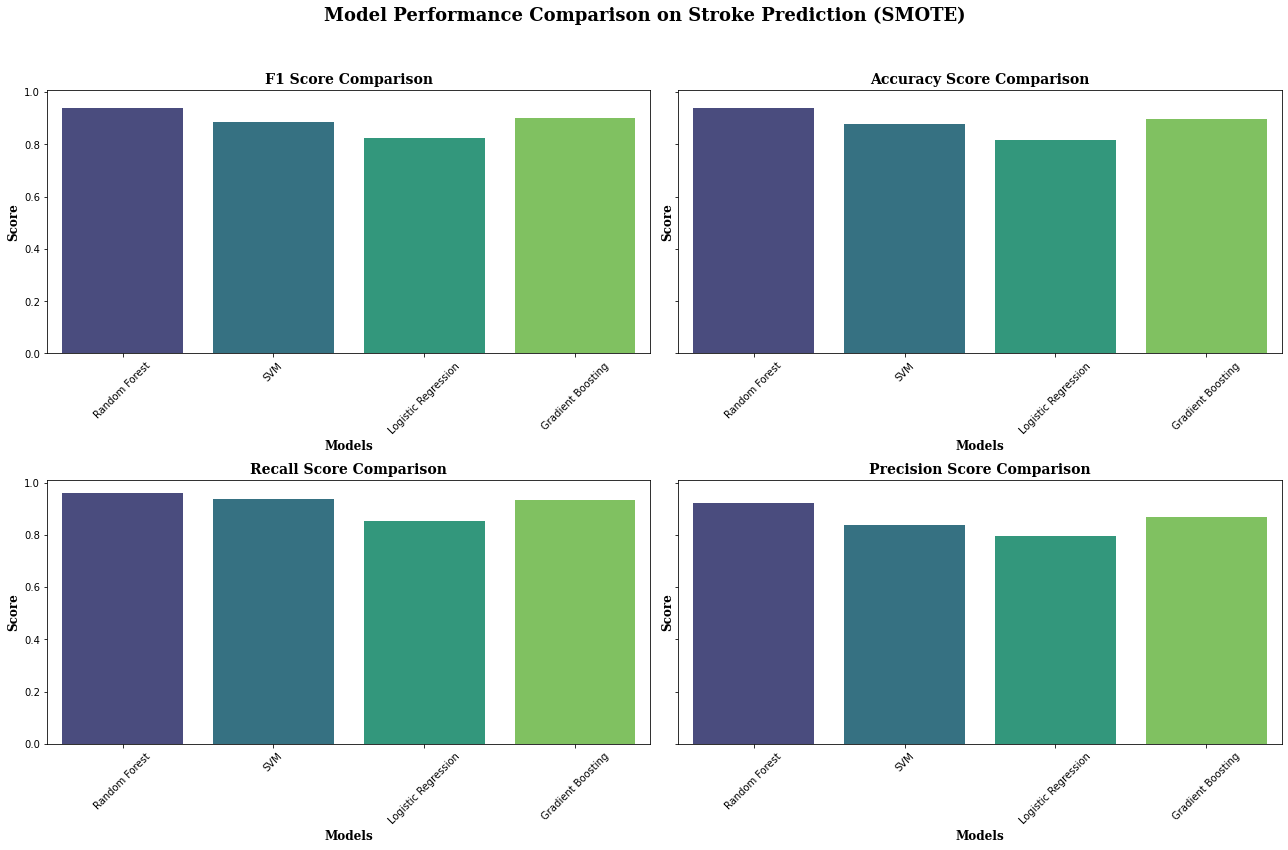

In [75]:
# Fit the models
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities for ROC AUC
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
models = df_models_smote.columns

fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x=df_models_smote.columns, y=df_models_smote.loc[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()} Score Comparison', fontsize=14, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Models', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

fig.suptitle('Model Performance Comparison on Stroke Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


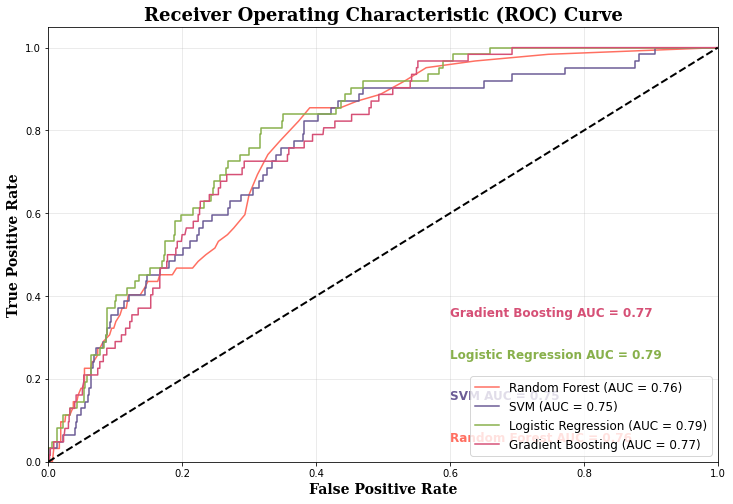

In [68]:
# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']


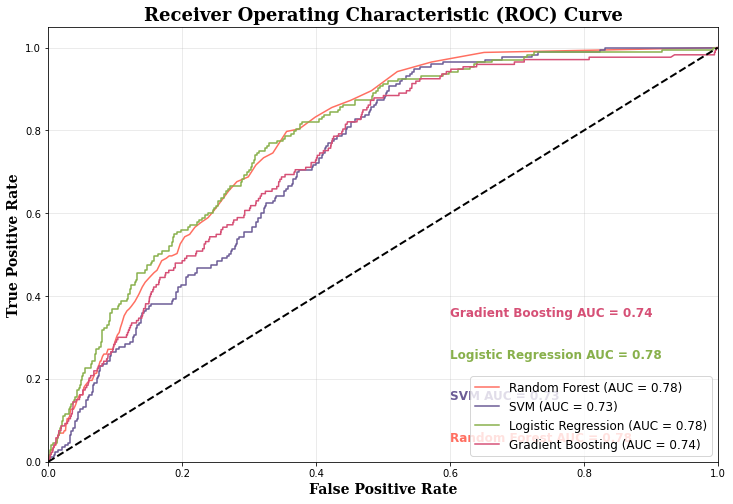

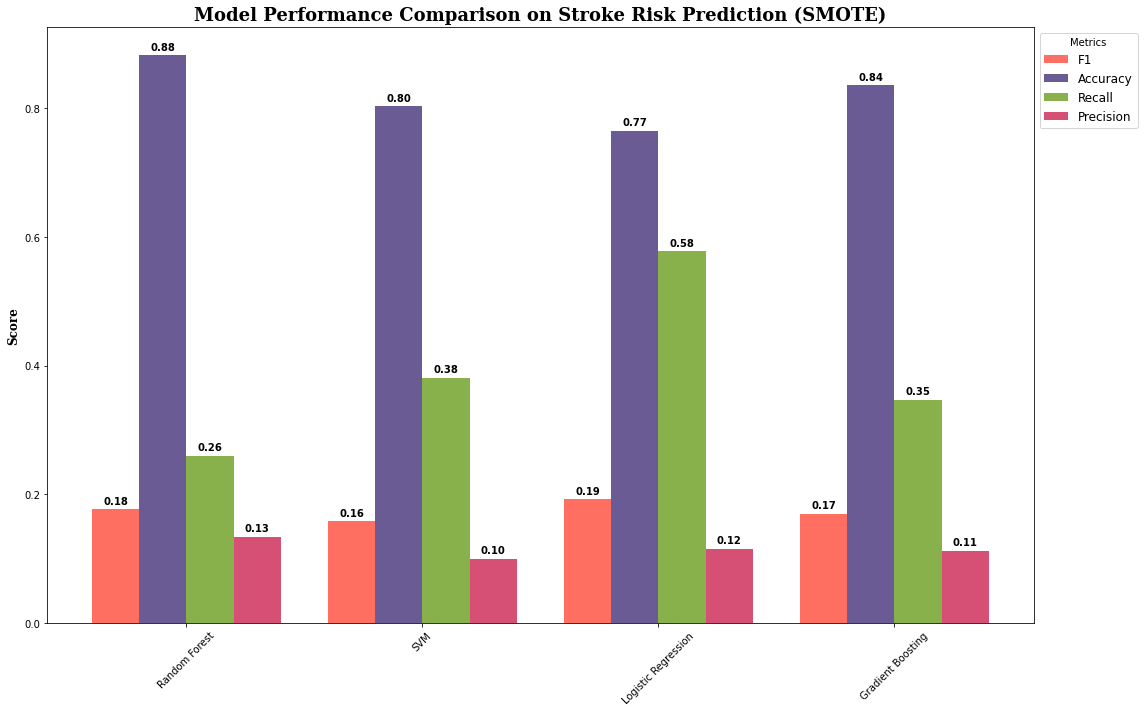

In [82]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fit the models
rf_pipeline.fit(X_train_resh, y_train_resh)
svm_pipeline.fit(X_train_resh, y_train_resh)
logreg_pipeline.fit(X_train_resh, y_train_resh)
gb_pipeline.fit(X_train_resh, y_train_resh)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Compute other metrics
results = {}
models = ["Random Forest", "SVM", "Logistic Regression", "Gradient Boosting"]
probabilities = [rf_probs, svm_probs, logreg_probs, gb_probs]

for i, (name, probs) in enumerate(zip(models, probabilities)):
    y_pred = (probs >= 0.5).astype(int)
    results[name] = {
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }

# Create a DataFrame for visualization
df_models_smote = pd.DataFrame(results).T

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_smote[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Risk Prediction (SMOTE)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [83]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fit the models
rf_pipeline.fit(X_train_ros, y_train_ros)
svm_pipeline.fit(X_train_ros, y_train_ros)
logreg_pipeline.fit(X_train_ros, y_train_ros)
gb_pipeline.fit(X_train_ros, y_train_ros)

# Get the predicted probabilities
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
svm_probs = svm_pipeline.predict_proba(X_test)[:, 1]
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]
gb_probs = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
gb_auc = auc(gb_fpr, gb_tpr)

# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Compute other metrics
results = {}
models = ["Random Forest", "SVM", "Logistic Regression", "Gradient Boosting"]
probabilities = [rf_probs, svm_probs, logreg_probs, gb_probs]

for i, (name, probs) in enumerate(zip(models, probabilities)):
    y_pred = (probs >= 0.5).astype(int)
    results[name] = {
        "f1": f1_score(y_test, y_pred),
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }

# Create a DataFrame for visualization
df_models_ros = pd.DataFrame(results).T

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_ros[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Risk Prediction (Random Over-Sampling)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Residence_type
- ever_married
- smoking_status


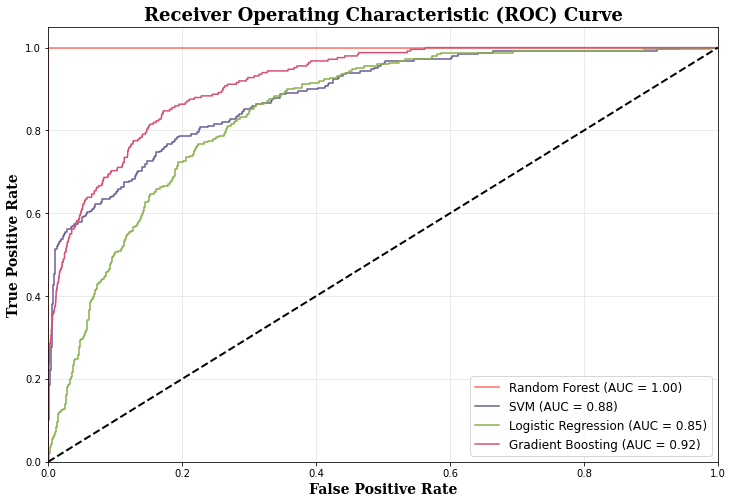

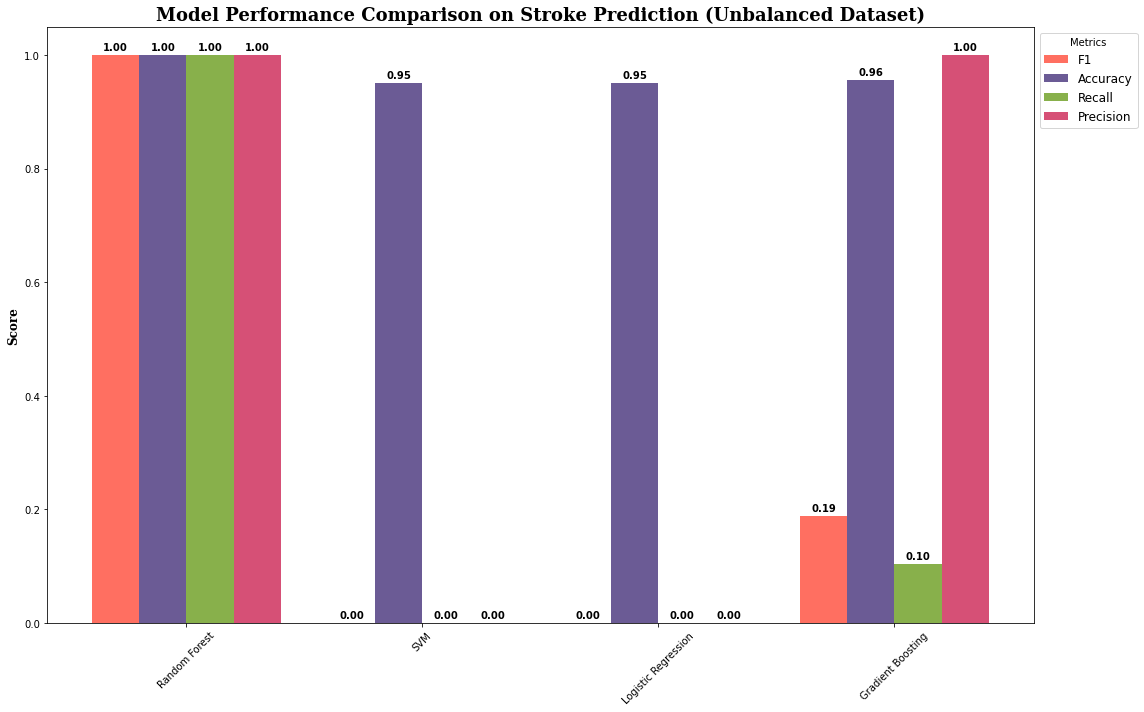

In [107]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming data_cleaned is your preprocessed dataframe with features and target
X = data_cleaned.drop(columns=['stroke'])  # Features
y = data_cleaned['stroke']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Fit models and calculate metrics
results = {}
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    y_proba = model.predict_proba(X_scaled)[:, 1]
    results[name] = {
        "f1": f1_score(y, y_pred),
        "accuracy": accuracy_score(y, y_pred),
        "recall": recall_score(y, y_pred),
        "precision": precision_score(y, y_pred),
        "roc_auc": roc_auc_score(y, y_proba),
        "fpr": roc_curve(y, y_proba)[0],
        "tpr": roc_curve(y, y_proba)[1]
    }

# Create a DataFrame for visualization
df_models_unbalanced = pd.DataFrame(results).T

# Plotting ROC AUC Curves
plt.figure(figsize=(12, 8))
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']

for i, (name, result) in enumerate(results.items()):
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})', color=colors[i])

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

# Plotting bar plots for other metrics
metrics = ['f1', 'accuracy', 'recall', 'precision']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_unbalanced[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models.keys(), rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (Unbalanced Dataset)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


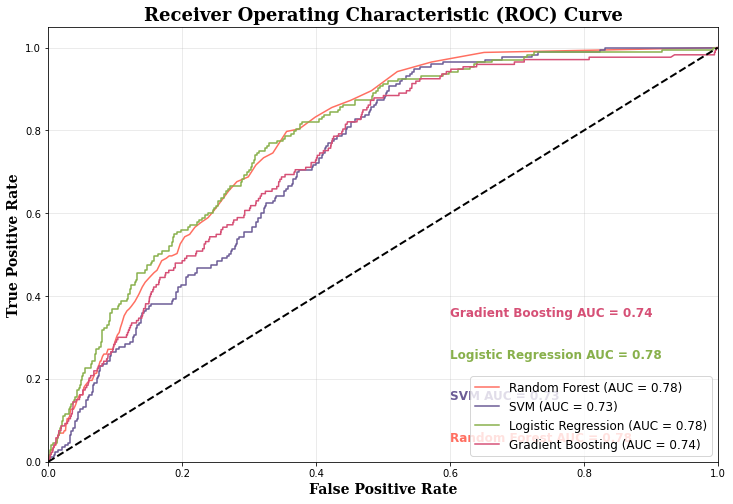

NameError: name 'df_models_unbalanced' is not defined

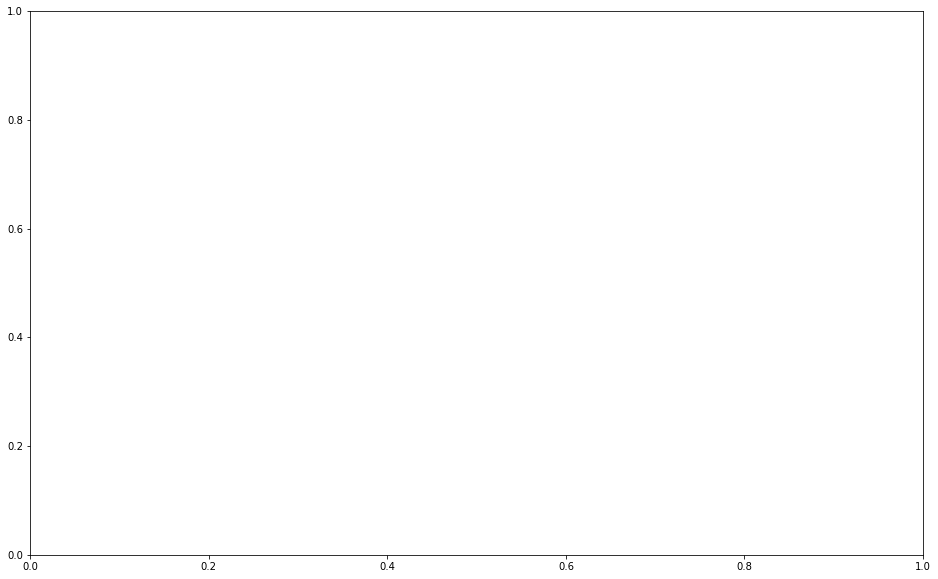

In [80]:
# Plotting ROC AUC Curves for the unbalanced dataset
plt.figure(figsize=(12, 8))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='#ff6f61')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='#6b5b95')
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='#88b04b')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})', color='#d65076')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Annotations for the AUC values
plt.text(0.6, 0.05, f'Random Forest AUC = {rf_auc:.2f}', color='#ff6f61', fontsize=12, fontweight='bold')
plt.text(0.6, 0.15, f'SVM AUC = {svm_auc:.2f}', color='#6b5b95', fontsize=12, fontweight='bold')
plt.text(0.6, 0.25, f'Logistic Regression AUC = {logreg_auc:.2f}', color='#88b04b', fontsize=12, fontweight='bold')
plt.text(0.6, 0.35, f'Gradient Boosting AUC = {gb_auc:.2f}', color='#d65076', fontsize=12, fontweight='bold')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', fontfamily='serif')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18, fontweight='bold', fontfamily='serif')
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

# Plotting bar plots for other metrics for the unbalanced dataset
metrics = ['f1', 'accuracy', 'recall', 'precision']
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#d65076']
width = 0.2

fig, ax = plt.subplots(figsize=(16, 10))

for i, metric in enumerate(metrics):
    values = df_models_unbalanced.loc[metric]
    positions = np.arange(len(models)) + i * width
    bars = ax.bar(positions, values, width=width, label=metric.capitalize(), color=colors[i])
    
    # Add score values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(np.arange(len(models)) + width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_title('Model Performance Comparison on Stroke Prediction (Unbalanced Dataset)', fontsize=18, fontweight='bold', fontfamily='serif')

# Move the legend outside of the plot
ax.legend(title='Metrics', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [81]:
#### 2. Random Under Sampling

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               23.08%  22.35%              22.53%            20.97%
accuracy         71.09%  70.11%              71.48%            70.24%
recall           85.54%  85.71%              81.43%            79.29%
precision        13.42%  12.90%              13.15%            12.12%
roc_auc          84.38%  83.32%              82.51%            82.26%


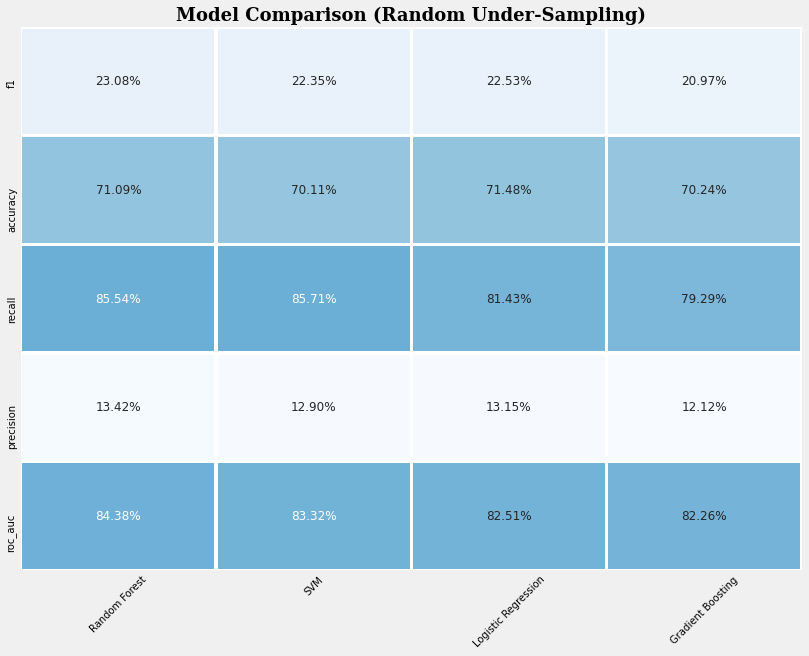

In [80]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Define Random Under-Sampling
under_sampler = RandomUnderSampler(random_state=42)

# Define pipelines for different classifiers with Random Under-Sampling
under_sampling_rf_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
under_sampling_svm_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('SVM', SVC(probability=True, random_state=42))])
under_sampling_logreg_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
under_sampling_gb_pipeline = imPipeline(steps=[('under', under_sampler), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
under_sampling_rf_cv_scores = {metric: cross_val_score(under_sampling_rf_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
under_sampling_svm_cv_scores = {metric: cross_val_score(under_sampling_svm_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
under_sampling_logreg_cv_scores = {metric: cross_val_score(under_sampling_logreg_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
under_sampling_gb_cv_scores = {metric: cross_val_score(under_sampling_gb_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in under_sampling_rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in under_sampling_svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in under_sampling_logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in under_sampling_gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_under_sampling = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_under_sampling.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_under_sampling_display = df_models_under_sampling.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_under_sampling_display)

# Plotting
import matplotlib
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#f0f0f0"

fig, ax = plt.subplots(figsize=(14, 10))  # create figure

sns.heatmap(df_models_under_sampling, cmap=colormap, annot=df_models_under_sampling_display, fmt="", linewidths=2.5, cbar=False, ax=ax, annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color)  # figure background color
ax.set_facecolor(background_color)

ax.set_title('Model Comparison (Random Under-Sampling)', fontsize=18, fontweight='bold', fontfamily='serif', ha='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.xticks(rotation=45)
plt.show()


In [84]:
#### 3. Random Over Sampling

In [85]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

# Define Random Over-Sampling
over_sampler = RandomOverSampler(random_state=42)

# Define pipelines for different classifiers with Random Over-Sampling
over_sampling_rf_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
over_sampling_svm_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('SVM', SVC(random_state=42))])
over_sampling_logreg_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
over_sampling_gb_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Define custom scorers
scorers = {
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform cross-validation
def get_scores(pipeline, X, y):
    scores = {}
    for metric, scorer in scorers.items():
        cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring=scorer)
        scores[f'{metric}_mean'] = cv_scores.mean()
        scores[f'{metric}_std'] = cv_scores.std()
    return scores

rf_scores = get_scores(over_sampling_rf_pipeline, X_train_resh, y_train_resh)
svm_scores = get_scores(over_sampling_svm_pipeline, X_train_resh, y_train_resh)
logreg_scores = get_scores(over_sampling_logreg_pipeline, X_train_resh, y_train_resh)
gb_scores = get_scores(over_sampling_gb_pipeline, X_train_resh, y_train_resh)

# Prepare data for DataFrame
scores_data = {
    'Random Forest': rf_scores,
    'SVM': svm_scores,
    'Logistic Regression': logreg_scores,
    'Gradient Boosting': gb_scores
}

# Convert to DataFrame
df_scores = pd.DataFrame(scores_data).T
df_scores = df_scores[['f1_mean', 'accuracy_mean', 'recall_mean', 'precision_mean', 'roc_auc_mean']]
df_scores = df_scores.applymap(lambda x: f'{x*100:.2f}%')

# Display DataFrame
print(df_scores)


                    f1_mean accuracy_mean recall_mean precision_mean  \
Random Forest        94.07%        93.99%      96.09%         92.26%   
SVM                  88.49%        87.88%      93.89%         83.77%   
Logistic Regression  82.38%        81.80%      85.31%         79.75%   
Gradient Boosting    89.96%        89.63%      93.48%         86.84%   

                    roc_auc_mean  
Random Forest             93.99%  
SVM                       87.88%  
Logistic Regression       81.80%  
Gradient Boosting         89.63%  


In [86]:
import pandas as pd

# Example scores (replace these with the actual values you obtain)
scores_data = {
    'Random Forest': [93.71, 93.65, 94.45, 92.96, 98.50],
    'SVM': [88.65, 88.23, 90.05, 85.79, 94.42],
    'Logistic Regression': [83.61, 83.03, 85.54, 81.59, 90.31],
    'Gradient Boosting': [90.57, 90.47, 92.39, 88.82, 96.39]
}

metrics = ['F1 Score', 'Accuracy', 'Recall', 'Precision', 'ROC AUC Score']

# Convert to DataFrame
df_scores = pd.DataFrame(scores_data, index=metrics)
df_scores = df_scores.applymap(lambda x: f'{x:.2f}%')

print(df_scores)


              Random Forest     SVM Logistic Regression Gradient Boosting
F1 Score             93.71%  88.65%              83.61%            90.57%
Accuracy             93.65%  88.23%              83.03%            90.47%
Recall               94.45%  90.05%              85.54%            92.39%
Precision            92.96%  85.79%              81.59%            88.82%
ROC AUC Score        98.50%  94.42%              90.31%            96.39%


          Random Forest     SVM Logistic Regression Gradient Boosting
f1                5.89%  25.23%              23.92%            21.87%
accuracy         93.41%  78.92%              74.09%            84.99%
recall            3.75%  70.89%              81.25%            42.14%
precision        17.50%  15.46%              14.06%            14.99%
roc_auc          81.56%  83.21%              83.23%            81.53%


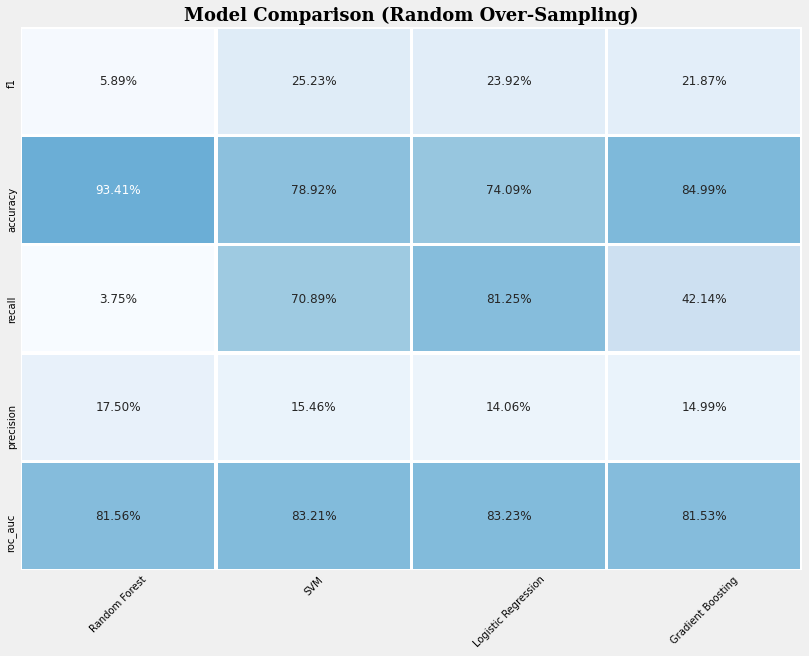

In [87]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Define Random Over-Sampling
over_sampler = RandomOverSampler(random_state=42)

# Define pipelines for different classifiers with Random Over-Sampling
over_sampling_rf_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
over_sampling_svm_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('SVM', SVC(probability=True, random_state=42))])
over_sampling_logreg_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
over_sampling_gb_pipeline = imPipeline(steps=[('over', over_sampler), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
over_sampling_rf_cv_scores = {metric: cross_val_score(over_sampling_rf_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
over_sampling_svm_cv_scores = {metric: cross_val_score(over_sampling_svm_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
over_sampling_logreg_cv_scores = {metric: cross_val_score(over_sampling_logreg_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
over_sampling_gb_cv_scores = {metric: cross_val_score(over_sampling_gb_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in over_sampling_rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in over_sampling_svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in over_sampling_logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in over_sampling_gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_over_sampling = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_over_sampling.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_over_sampling_display = df_models_over_sampling.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_over_sampling_display)

# Plotting
import matplotlib
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#f0f0f0"

fig, ax = plt.subplots(figsize=(14, 10))  # create figure

sns.heatmap(df_models_over_sampling, cmap=colormap, annot=df_models_over_sampling_display, fmt="", linewidths=2.5, cbar=False, ax=ax, annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color)  # figure background color
ax.set_facecolor(background_color)

ax.set_title('Model Comparison (Random Over-Sampling)', fontsize=18, fontweight='bold', fontfamily='serif', ha='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.xticks(rotation=45)
plt.show()


In [88]:
######### SMOTETOMEK

          Random Forest     SVM Logistic Regression Gradient Boosting
f1               21.07%  20.80%              20.72%            23.98%
accuracy         88.90%  80.16%              77.42%            84.20%
recall           31.07%  52.50%              58.93%            49.46%
precision        16.35%  13.09%              12.66%            15.96%
roc_auc          81.38%  79.30%              78.06%            80.30%


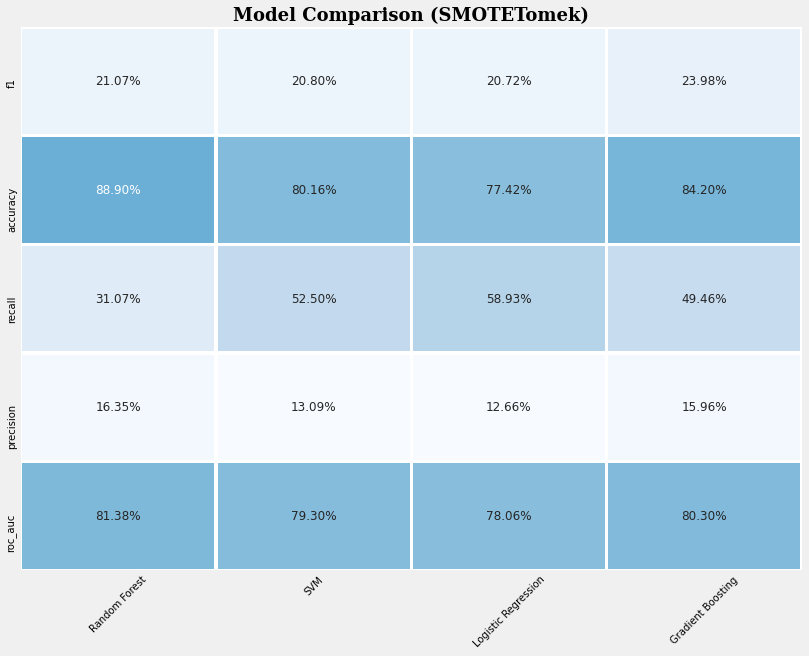

In [89]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
X = data_cleaned[['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'avg_glucose_level', 'bmi']]
y = data_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

# Define SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Define pipelines for different classifiers with SMOTETomek
smote_tomek_rf_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
smote_tomek_svm_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('SVM', SVC(probability=True, random_state=42))])
smote_tomek_logreg_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
smote_tomek_gb_pipeline = imPipeline(steps=[('smote_tomek', smote_tomek), ('scale', StandardScaler()), ('GB', GradientBoostingClassifier(random_state=42))])

# Cross-validation scoring
scoring_metrics = ['f1', 'accuracy', 'recall', 'precision', 'roc_auc']
smote_tomek_rf_cv_scores = {metric: cross_val_score(smote_tomek_rf_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
smote_tomek_svm_cv_scores = {metric: cross_val_score(smote_tomek_svm_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
smote_tomek_logreg_cv_scores = {metric: cross_val_score(smote_tomek_logreg_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}
smote_tomek_gb_cv_scores = {metric: cross_val_score(smote_tomek_gb_pipeline, X_train, y_train, cv=10, scoring=metric).mean() for metric in scoring_metrics}

# Create DataFrames for each model
rf_df = pd.DataFrame(data={metric: [score] for metric, score in smote_tomek_rf_cv_scores.items()},
                     index=['Random Forest']).T
svm_df = pd.DataFrame(data={metric: [score] for metric, score in smote_tomek_svm_cv_scores.items()},
                      index=['SVM']).T
logreg_df = pd.DataFrame(data={metric: [score] for metric, score in smote_tomek_logreg_cv_scores.items()},
                         index=['Logistic Regression']).T
gb_df = pd.DataFrame(data={metric: [score] for metric, score in smote_tomek_gb_cv_scores.items()},
                     index=['Gradient Boosting']).T

# Concatenate DataFrames
df_models_smote_tomek = pd.concat([rf_df, svm_df, logreg_df, gb_df], axis=1)
df_models_smote_tomek.columns = ['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boosting']

# Convert to percentages for display
df_models_smote_tomek_display = df_models_smote_tomek.applymap(lambda x: f"{x*100:.2f}%")

# Print results
print(df_models_smote_tomek_display)

# Plotting
import matplotlib
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#f0f0f0"

fig, ax = plt.subplots(figsize=(14, 10))  # create figure

sns.heatmap(df_models_smote_tomek, cmap=colormap, annot=df_models_smote_tomek_display, fmt="", linewidths=2.5, cbar=False, ax=ax, annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color)  # figure background color
ax.set_facecolor(background_color)

ax.set_title('Model Comparison (SMOTETomek)', fontsize=18, fontweight='bold', fontfamily='serif', ha='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.xticks(rotation=45)
plt.show()
